In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [61]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Train:', train.shape, ', Test:', test.shape)

Train: (1460, 81) , Test: (1459, 80)


# MISSING VALUE TREATMENT AND ENCODING

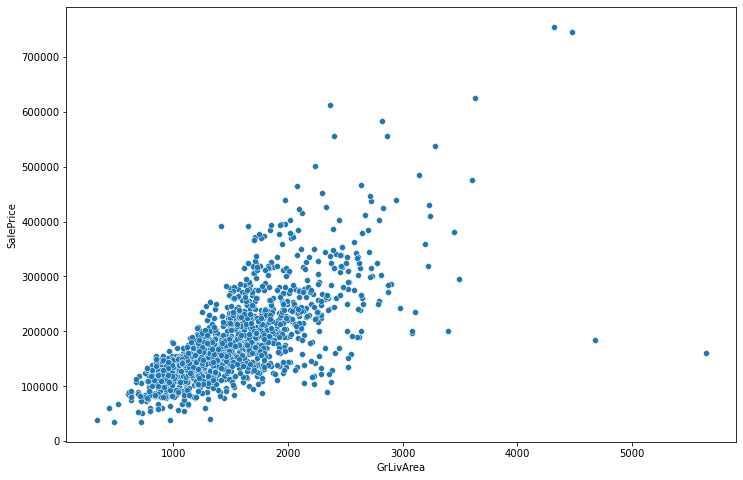

In [62]:
# Removal of outliers. 

plt.rcParams['figure.figsize'] = [12, 8]

sns.scatterplot(data=train, x=train.GrLivArea, y=train.SalePrice)
plt.show()

There are a few houses that are very large that have been sold for a small price. 
Besides, there are very few examples in the region beyond x>4000

In [63]:
train = train[train.GrLivArea <= 4000]
train.shape

(1456, 81)

This resulted in a data loss of 4 instances.

In [64]:
def treat_null(X):

    X.loc[:, 'Alley'] = X.loc[:, 'Alley'].fillna('None')

    X.loc[:, 'BedroomAbvGr'] = X.loc[:, 'BedroomAbvGr'].fillna(0)

    X.loc[:, 'BsmtQual'] = X.loc[: 'BsmtQual'].fillna('No')
    
    X.loc[:, 'BsmtCond'] = X.loc[:, 'BsmtCond'].fillna('No')
    
    X.loc[:, 'BsmtExposure'] = X.loc[:, 'BsmtExposure'].fillna('No')
    
    X.loc[:, 'BsmtFinType1'] = X.loc[:, 'BsmtFinType1'].fillna('No')
    
    X.loc[:, 'BsmtFinType2'] = X.loc[:, 'BsmtFinType2'].fillna('No')
    
    X.loc[:, 'BsmtFullBath'] = X.loc[:, 'BsmtFullBath'].fillna('No')
    
    X.loc[:, 'BsmtHalfBath'] = X.loc[:, 'BsmtHalfBath'].fillna('No')
    
    X.loc[:, 'BsmtUnfSF'] = X.loc[:, 'BsmtUnfSF'].fillna('No')
    
    X.loc[:, 'CentralAir'] = X.loc[:, 'CentralAir'].fillna('No')
    
    X.loc[:, "Condition1"] = X.loc[:, "Condition1"].fillna("Norm")
    
    X.loc[:, "Condition2"] = X.loc[:, "Condition2"].fillna("Norm")

    X.loc[:, 'Electrical'] = X.loc[:, 'Electrical'].fillna('SBrkr')
    X.loc[:, "EnclosedPorch"] = X.loc[:, "EnclosedPorch"].fillna(0)

    X.loc[:, "ExterCond"] = X.loc[:, "ExterCond"].fillna("TA")
    X.loc[:, "ExterQual"] = X.loc[:, "ExterQual"].fillna("TA")

    X.loc[:, "Fence"] = X.loc[:, "Fence"].fillna("No")

    X.loc[:, "FireplaceQu"] = X.loc[:, "FireplaceQu"].fillna("No")
    
    X.loc[:, "Fireplaces"] = X.loc[:, "Fireplaces"].fillna(0)

    X.loc[:, "Functional"] = X.loc[:, "Functional"].fillna("Typ")
    
    X.loc[:, "GarageType"] = X.loc[:, "GarageType"].fillna("No")
    
    X.loc[:, "GarageFinish"] = X.loc[:, "GarageFinish"].fillna("No")
    
    X.loc[:, "GarageQual"] = X.loc[:, "GarageQual"].fillna("No")

    X.loc[:, "GarageCond"] = X.loc[:, "GarageCond"].fillna("No")

    X.loc[:, "GarageArea"] = X.loc[:, "GarageArea"].fillna(0)

    X.loc[:, "GarageCars"] = X.loc[:, "GarageCars"].fillna(0)

    X.loc[:, "HalfBath"] = X.loc[:, "HalfBath"].fillna(0)

    X.loc[:, "HeatingQC"] = X.loc[:, "HeatingQC"].fillna("TA")

    X.loc[:, "KitchenAbvGr"] = X.loc[:, "KitchenAbvGr"].fillna(0)
   
    X.loc[:, "KitchenQual"] = X.loc[:, "KitchenQual"].fillna("TA")

    X.loc[:, "LotFrontage"] = X.loc[:, "LotFrontage"].fillna(0)

    X.loc[:, "LotShape"] = X.loc[:, "LotShape"].fillna("Reg")

    X.loc[:, "MasVnrType"] = X.loc[:, "MasVnrType"].fillna("None")
    
    X.loc[:, "MasVnrArea"] = X.loc[:, "MasVnrArea"].fillna(0)
    
    X.loc[:, "MiscFeature"] = X.loc[:, "MiscFeature"].fillna("No")

    X.loc[:, "MiscVal"] = X.loc[:, "MiscVal"].fillna(0)

    X.loc[:, "OpenPorchSF"] = X.loc[:, "OpenPorchSF"].fillna(0)

    X.loc[:, "PavedDrive"] = X.loc[:, "PavedDrive"].fillna("N")

    X.loc[:, "PoolQC"] = X.loc[:, "PoolQC"].fillna("No")
    
    X.loc[:, "PoolArea"] = X.loc[:, "PoolArea"].fillna(0)

    X.loc[:, "SaleCondition"] = X.loc[:, "SaleCondition"].fillna("Normal")

    X.loc[:, "ScreenPorch"] = X.loc[:, "ScreenPorch"].fillna(0)

    X.loc[:, "TotRmsAbvGrd"] = X.loc[:, "TotRmsAbvGrd"].fillna(0)

    X.loc[:, "Utilities"] = X.loc[:, "Utilities"].fillna("AllPub")

    X.loc[:, "WoodDeckSF"] = X.loc[:, "WoodDeckSF"].fillna(0)
    
    

In [65]:
treat_null(train)

In [68]:
train.columns[train.isna().any()]

Index(['GarageYrBlt'], dtype='object')

             GarageYrBlt  SalePrice
GarageYrBlt      1.00000    0.49923
SalePrice        0.49923    1.00000


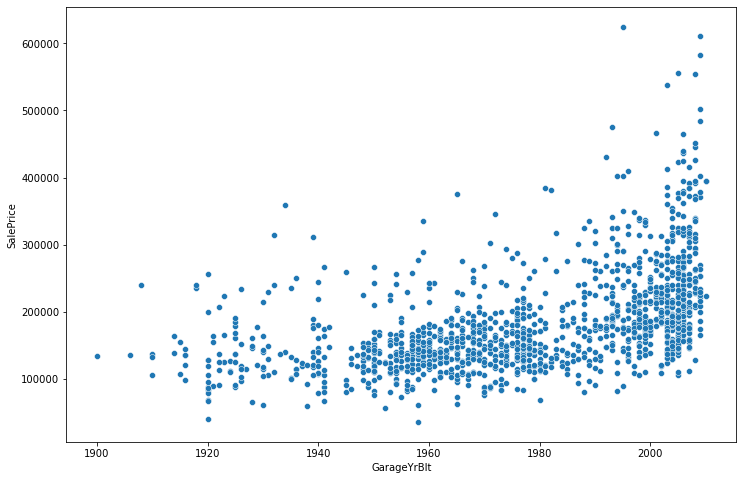

In [78]:
print(train[['GarageYrBlt', 'SalePrice']].corr())
sns.scatterplot(x=train_num['GarageYrBlt'], y=train_num['SalePrice'])
plt.show()

As there is a moderate correlation between the GarageYrBlt and SalePrice, we should impute the missing values with context. The best way to do this would be to use a KNNimputer.

In [73]:
train_num = train.select_dtypes(np.number)

In [74]:
# Treating missing values for GarageYrBlt

#This column probably has missing values wherever the response to 'GarageType' = 'No'.
#We can replace this value with 0, or any other completely unrelated value.

# We can try to replace these missing values with a KNN imputer or such 

from sklearn.impute import KNNImputer

knn_impute = KNNImputer()

train_num_imputed = knn_impute.fit_transform(train_num)

In [76]:
train_num_imputed = pd.DataFrame(train_num_imputed, columns=train_num.columns, index=train_num.index)
train_num_imputed.isna().sum().sum()

0

In [82]:
train.loc[:, 'GarageYrBlt'] = train_num_imputed['GarageYrBlt']

In [83]:
print(train[['GarageYrBlt', 'SalePrice']].corr())

             GarageYrBlt  SalePrice
GarageYrBlt     1.000000   0.525127
SalePrice       0.525127   1.000000


Imputing the missing values in GarageYrBlt retains the correlation present between GarageYrBlt and SalePrice to a fair extent.

In [84]:
# replacing numeric features that are actually really categories

def replace_numeric_with_cat(X):
    X = X.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })
    return X
    
train = replace_numeric_with_cat(train)  

In [85]:
# ordinally encoding categories

def ordinal_encode(X):
    X = X.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )
    
    return X

train = ordinal_encode(train)

In [86]:
# Dropping the Id column from train

train.drop('Id', axis=1, inplace=True)

In [87]:
train_num = train.select_dtypes(np.number)
train_num

,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,YrSold,SalePrice
0,65.0,8450,2,4,4,3,7,5,2003,2003,196.0,4,3,4,3,0,6,706,1,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,2003.0,2,548,3,3,2,0,61,0,0,0,0,0,0,2008,208500
1,80.0,9600,2,4,4,3,6,8,1976,1976,0.0,3,3,4,3,3,5,978,1,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,1976.0,2,460,3,3,2,298,0,0,0,0,0,0,0,2007,181500
2,68.0,11250,2,3,4,3,7,5,2001,2002,162.0,4,3,4,3,1,6,486,1,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,2001.0,2,608,3,3,2,0,42,0,0,0,0,0,0,2008,223500
3,60.0,9550,2,3,4,3,7,5,1915,1970,0.0,3,3,3,4,0,5,216,1,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,4,1998.0,3,642,3,3,2,0,35,272,0,0,0,0,0,2006,140000
4,84.0,14260,2,3,4,3,8,5,2000,2000,350.0,4,3,4,3,2,6,655,1,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,3,2000.0,3,836,3,3,2,192,84,0,0,0,0,0,0,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,2,4,4,3,6,5,1999,2000,0.0,3,3,4,3,0,1,0,1,0,953,953,5,953,694,0,1647,0,0,2,1,3,1,3,7,8,1,3,1999.0,2,460,3,3,2,0,40,0,0,0,0,0,0,2007,175000
1456,85.0,13175,2,4,4,3,6,6,1978,1988,119.0,3,3,4,3,0,5,790,3,163,589,1542,3,2073,0,0,2073,1,0,2,0,3,1,3,7,7,2,3,1978.0,2,500,3,3,2,349,0,0,0,0,0,0,0,2010,210000
1457,66.0,9042,2,4,4,3,7,9,1941,2006,0.0,5,4,3,4,0,6,275,1,0,877,1152,5,1188,1152,0,2340,0,0,2,0,4,1,4,9,8,2,4,1941.0,1,252,3,3,2,0,60,0,0,0,0,0,2500,2010,266500
1458,68.0,9717,2,4,4,3,5,6,1950,1996,0.0,3,3,3,3,1,6,49,3,1029,0,1078,4,1078,0,0,1078,1,0,1,0,2,1,4,5,8,0,0,1950.0,1,240,3,3,2,366,0,112,0,0,0,0,0,2010,142125


Checking for columns that are actually categorical and choosing to including the ordinal categories in numeric

     'Street' - replace 2 with 1, and 1 with 0, switch to categoric

In [88]:
train_num.loc[:, 'Street'] = train_num['Street'].replace({2: 1, 1: 0})

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [89]:
train_num['Street'].value_counts()

1    1450
0       6
Name: Street, dtype: int64

We will drop this column from numeric and add it to categoric

In [90]:
train_cat = train.select_dtypes('object')
train_cat

# these will need one hot encoding.

,MSSubClass,MSZoning,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,GarageFinish,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,SC60,RL,None,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,RFn,No,No,Feb,WD,Normal
1,SC20,RL,None,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,SBrkr,Attchd,RFn,No,No,May,WD,Normal
2,SC60,RL,None,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,RFn,No,No,Sep,WD,Normal
3,SC70,RL,None,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,Y,SBrkr,Detchd,Unf,No,No,Feb,WD,Abnorml
4,SC60,RL,None,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,RFn,No,No,Dec,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,SC60,RL,None,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,SBrkr,Attchd,RFn,No,No,Aug,WD,Normal
1456,SC20,RL,None,Lvl,Inside,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,CBlock,GasA,Y,SBrkr,Attchd,Unf,MnPrv,No,Feb,WD,Normal
1457,SC70,RL,None,Lvl,Inside,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Stone,GasA,Y,SBrkr,Attchd,RFn,GdPrv,Shed,May,WD,Normal
1458,SC20,RL,None,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,FuseA,Attchd,Unf,No,No,Apr,WD,Normal


In [91]:
train_cat.describe()

,MSSubClass,MSZoning,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,GarageFinish,Fence,MiscFeature,MoSold,SaleType,SaleCondition
count,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456
unique,15,5,3,4,5,25,9,8,5,8,6,7,15,16,4,6,6,2,5,7,4,5,5,12,9,6
top,SC20,RL,None,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,SBrkr,Attchd,Unf,No,No,Jun,WD,Normal
freq,536,1147,1365,1309,1051,225,1258,1442,1216,726,1140,1432,515,504,871,643,1424,1361,1331,867,605,1176,1402,253,1265,1197


In [92]:
train_cat = pd.get_dummies(train_cat, drop_first=True)
train_cat

,MSSubClass_SC160,MSSubClass_SC180,MSSubClass_SC190,MSSubClass_SC20,MSSubClass_SC30,MSSubClass_SC40,MSSubClass_SC45,MSSubClass_SC50,MSSubClass_SC60,MSSubClass_SC70,MSSubClass_SC75,MSSubClass_SC80,MSSubClass_SC85,MSSubClass_SC90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_2,Alley_None,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,MiscFeature_No,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [93]:
train_cat = pd.concat([train_cat, train_num['Street']], axis=1)
train_num.drop('Street', axis=1, inplace=True)

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [95]:
train_full = pd.concat([train_num, train_cat], axis=1)
train_full.head(5)

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,YrSold,SalePrice,MSSubClass_SC160,MSSubClass_SC180,MSSubClass_SC190,MSSubClass_SC20,MSSubClass_SC30,MSSubClass_SC40,MSSubClass_SC45,MSSubClass_SC50,MSSubClass_SC60,MSSubClass_SC70,MSSubClass_SC75,MSSubClass_SC80,MSSubClass_SC85,MSSubClass_SC90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_2,Alley_None,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,MiscFeature_No,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Street
0,65.0,8450,4,4,3,7,5,2003,2003,196.0,4,3,4,3,0,6,706,1,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,2003.0,2,548,3,3,2,0,61,0,0,0,0,0,0,2008,208500,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,

# Exploring the effect of outlier treatment on model performance

LotFrontage


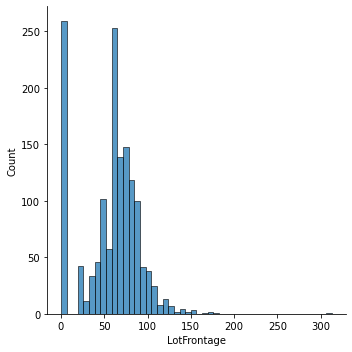

LotArea


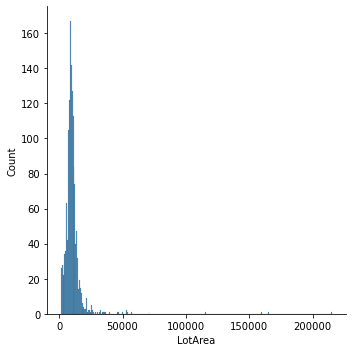

LotShape


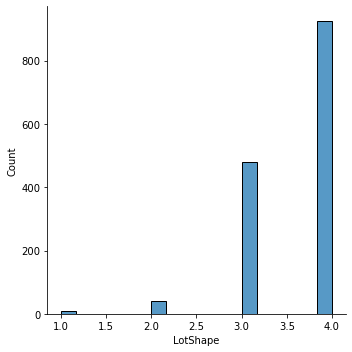

Utilities


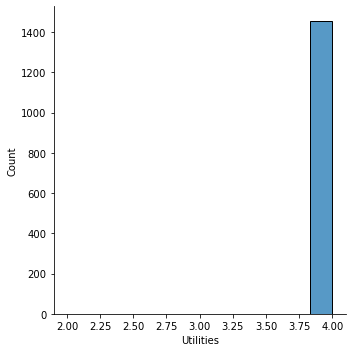

LandSlope


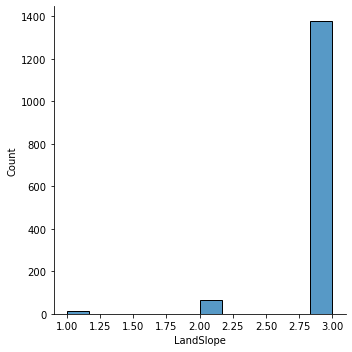

OverallQual


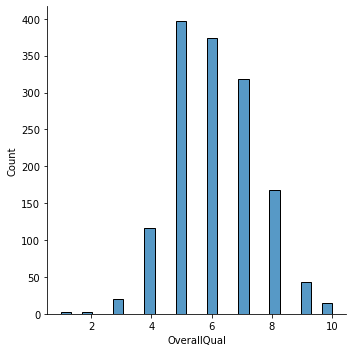

OverallCond


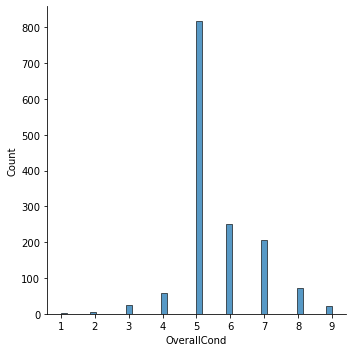

YearBuilt


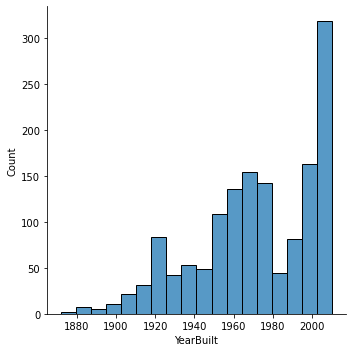

YearRemodAdd


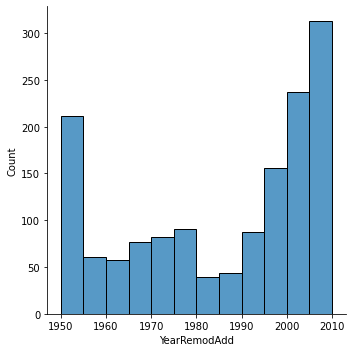

MasVnrArea


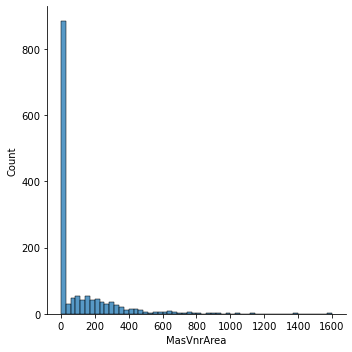

ExterQual


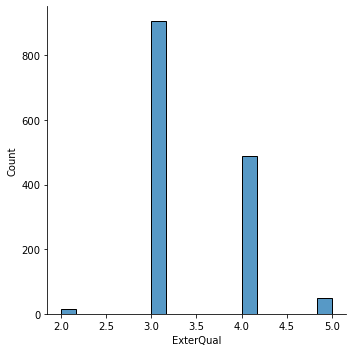

ExterCond


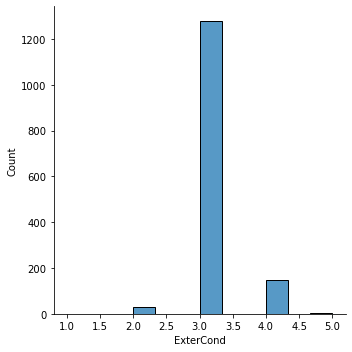

BsmtQual


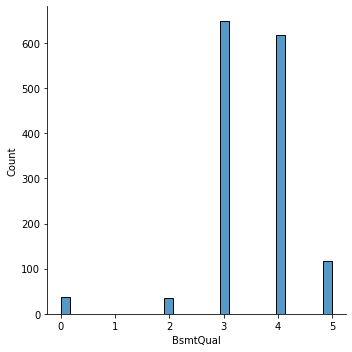

BsmtCond


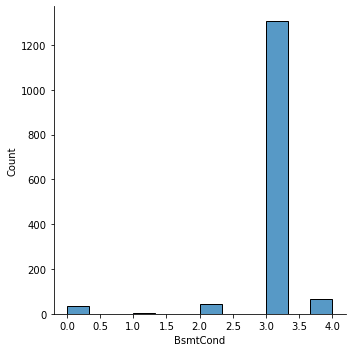

BsmtExposure


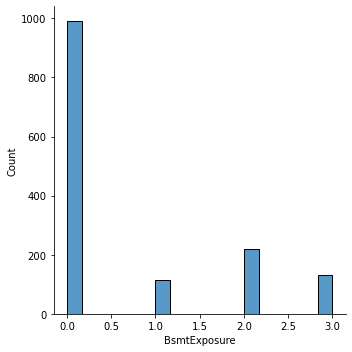

BsmtFinType1


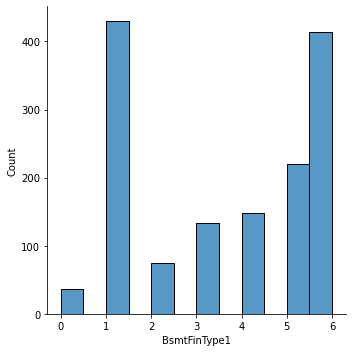

BsmtFinSF1


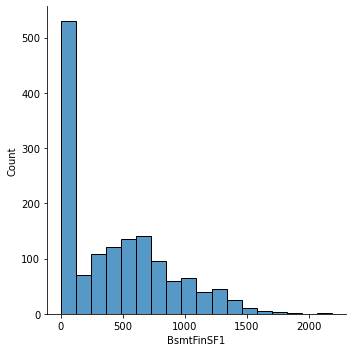

BsmtFinType2


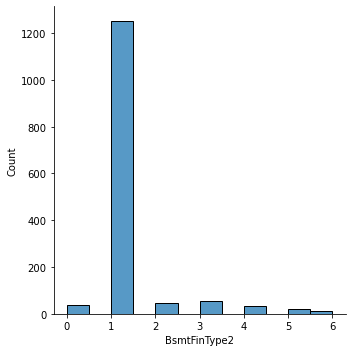

BsmtFinSF2


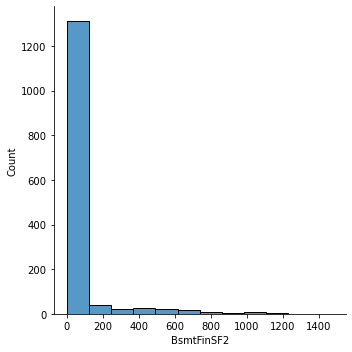

BsmtUnfSF


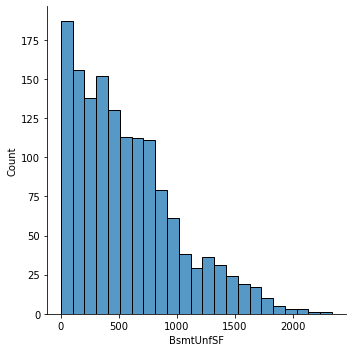

TotalBsmtSF


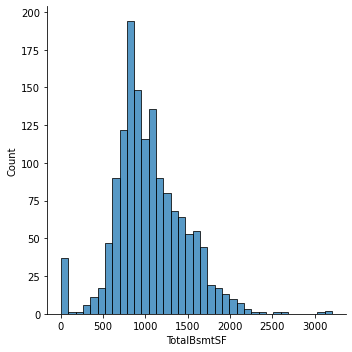

HeatingQC


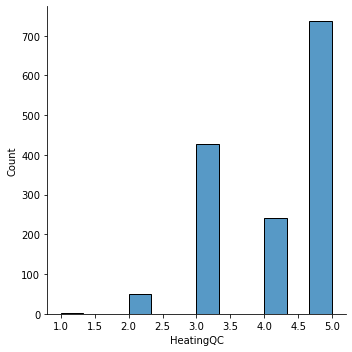

1stFlrSF


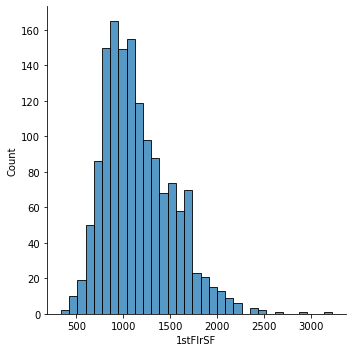

2ndFlrSF


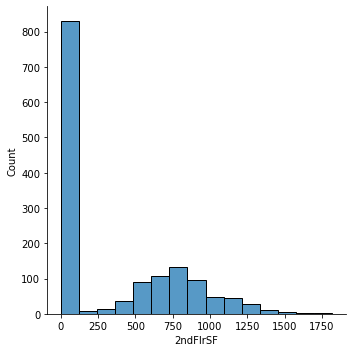

LowQualFinSF


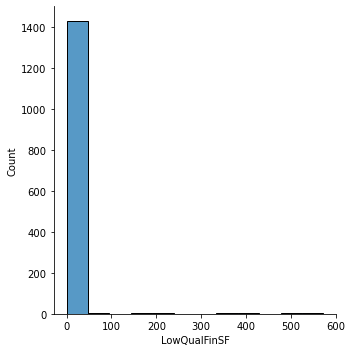

GrLivArea


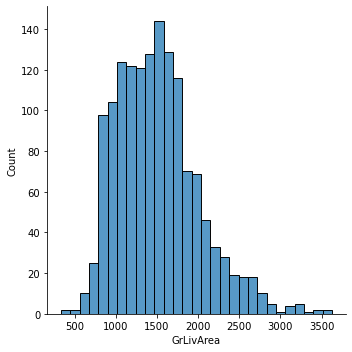

BsmtFullBath


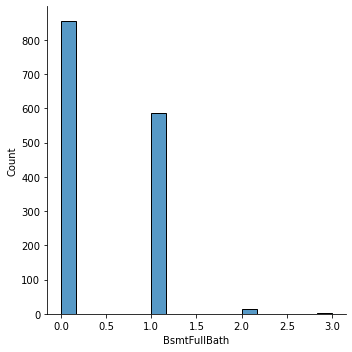

BsmtHalfBath


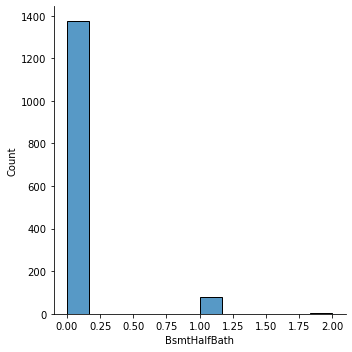

FullBath


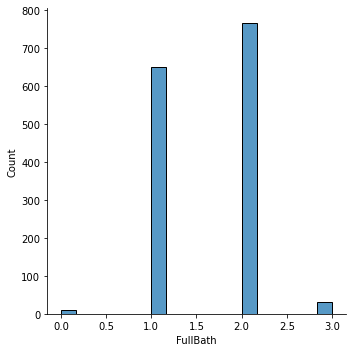

HalfBath


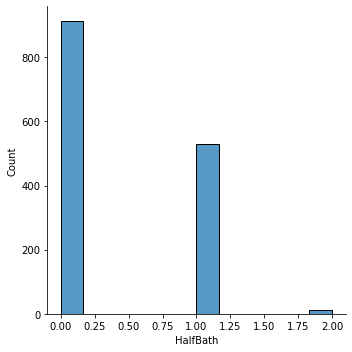

BedroomAbvGr


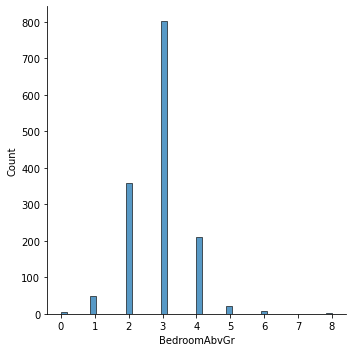

KitchenAbvGr


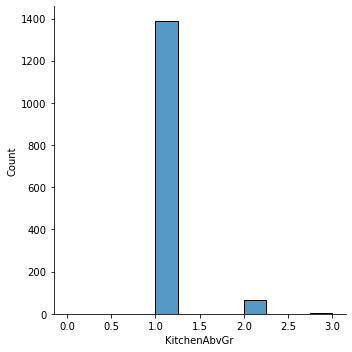

KitchenQual


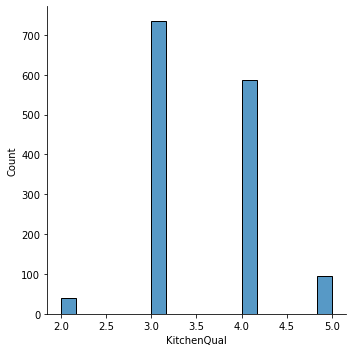

TotRmsAbvGrd


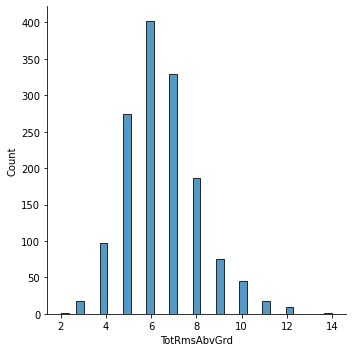

Functional


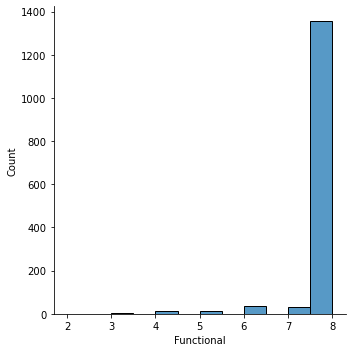

Fireplaces


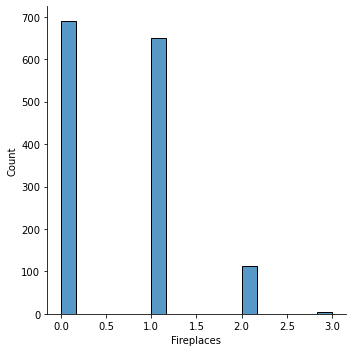

FireplaceQu


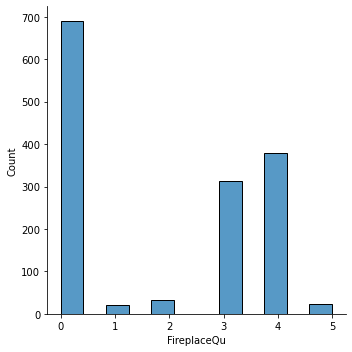

GarageYrBlt


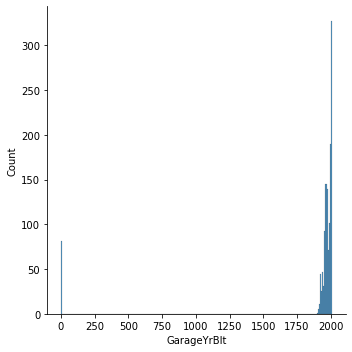

GarageCars


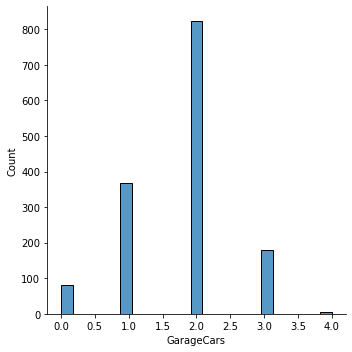

GarageArea


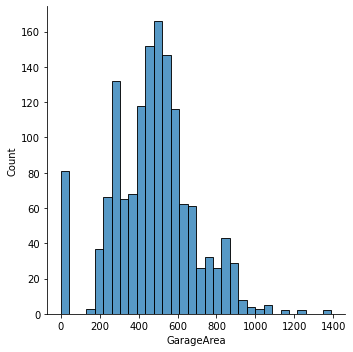

GarageQual


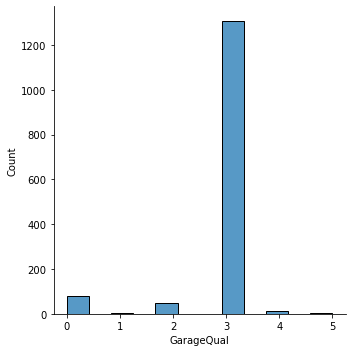

GarageCond


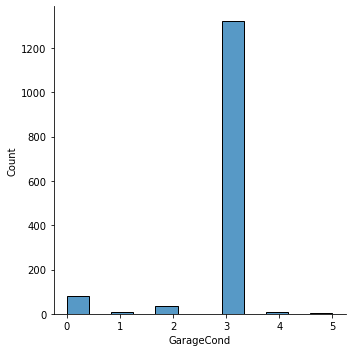

PavedDrive


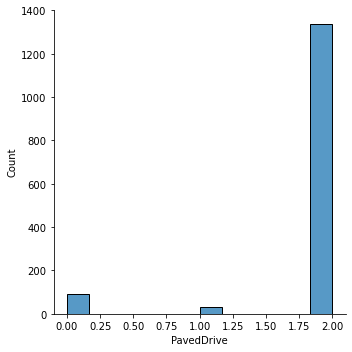

WoodDeckSF


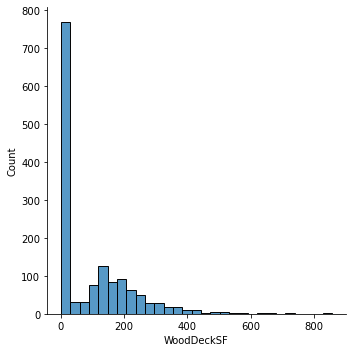

OpenPorchSF


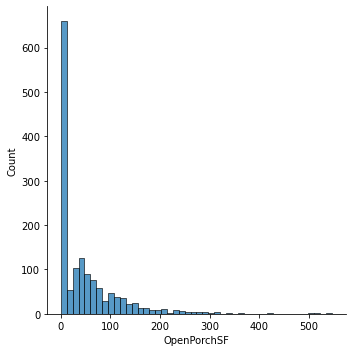

EnclosedPorch


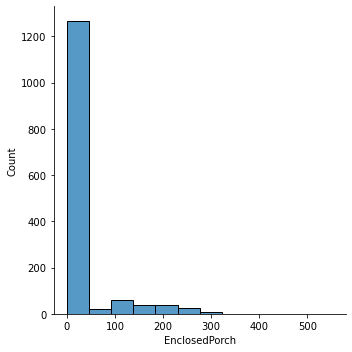

3SsnPorch


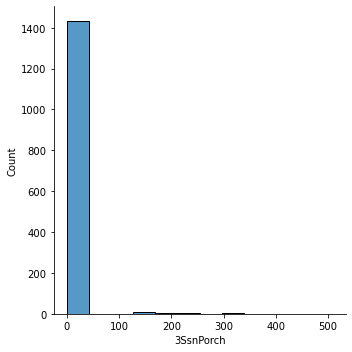

ScreenPorch


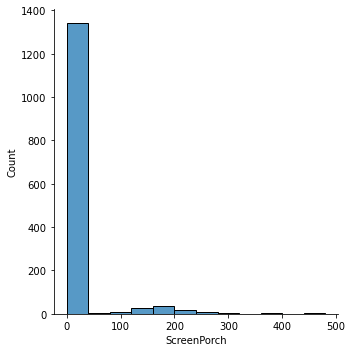

PoolArea


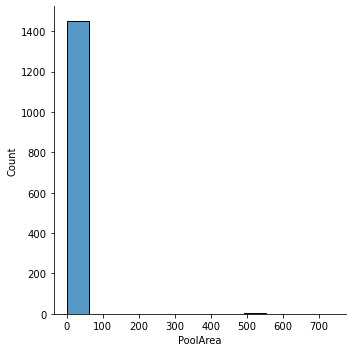

PoolQC


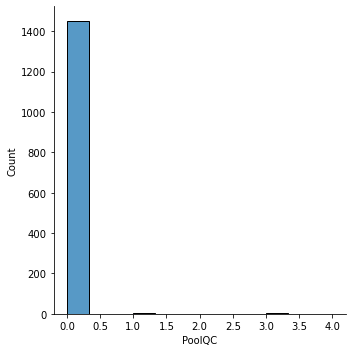

MiscVal


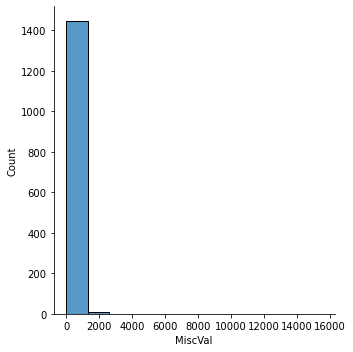

YrSold


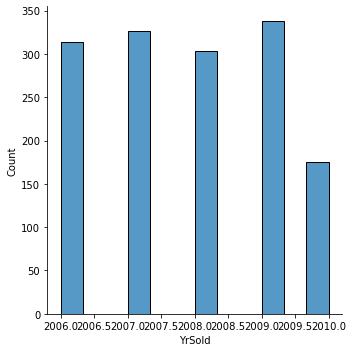

SalePrice


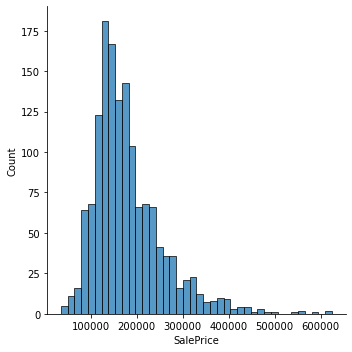

In [38]:
for col in train_num.columns:
    sns.displot(x=train_num[col])
    print(col)
    plt.show()

LotFrontage


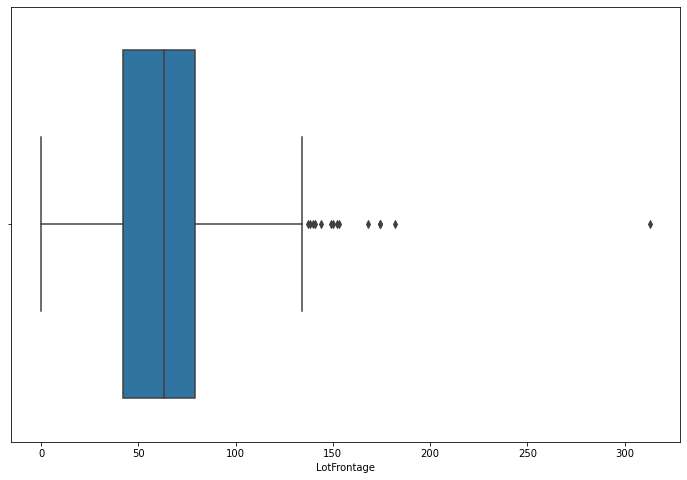

LotArea


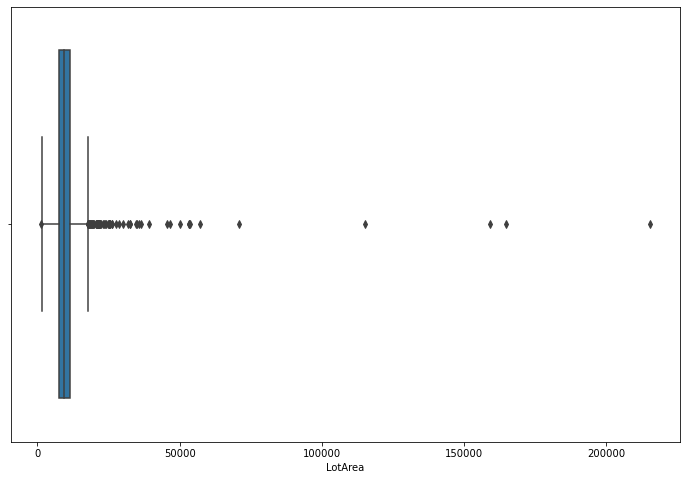

LotShape


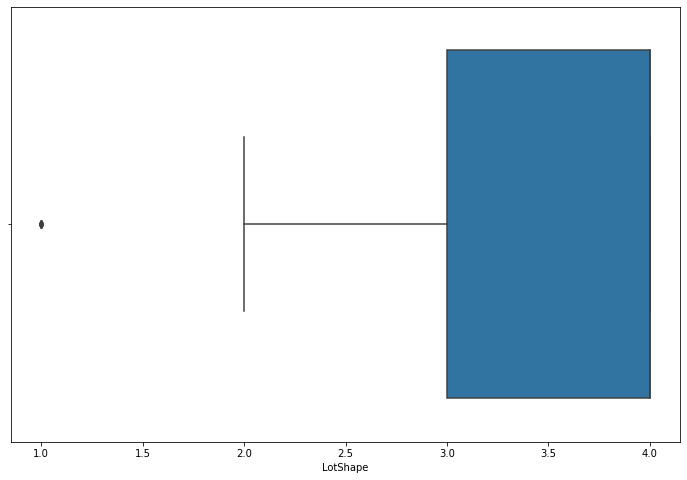

Utilities


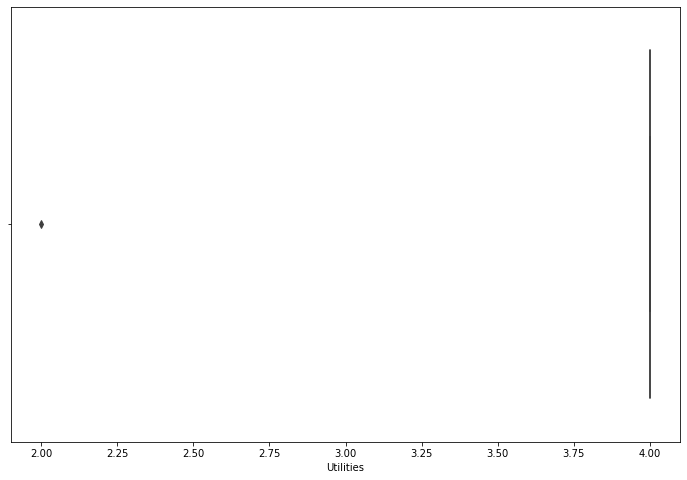

LandSlope


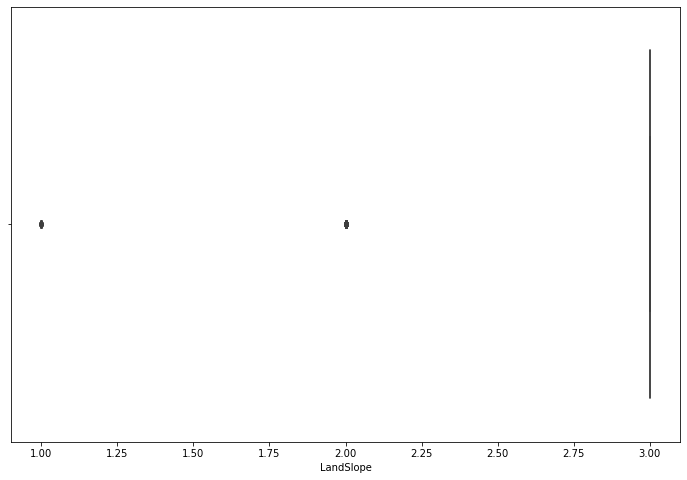

OverallQual


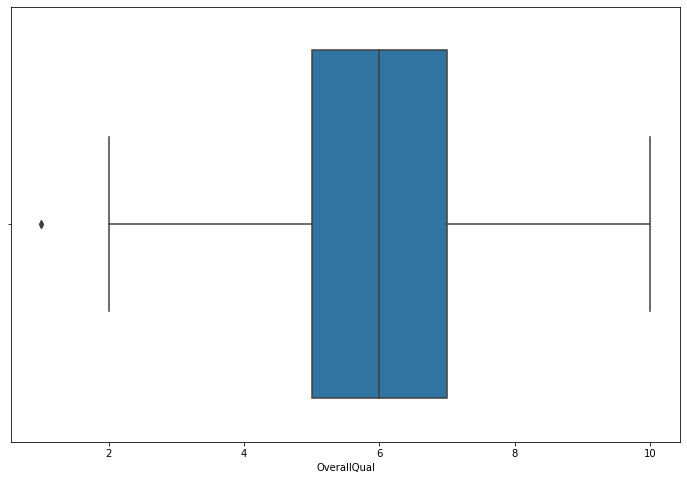

OverallCond


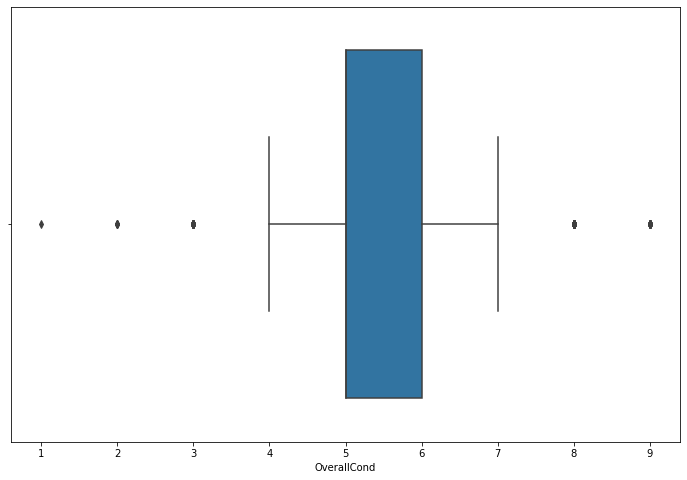

YearBuilt


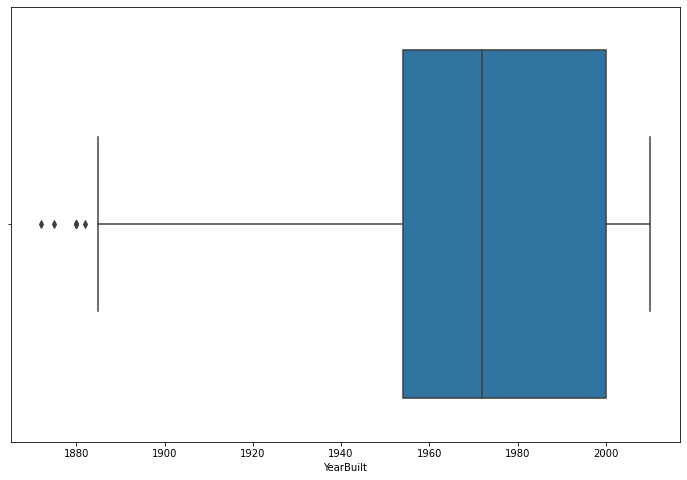

YearRemodAdd


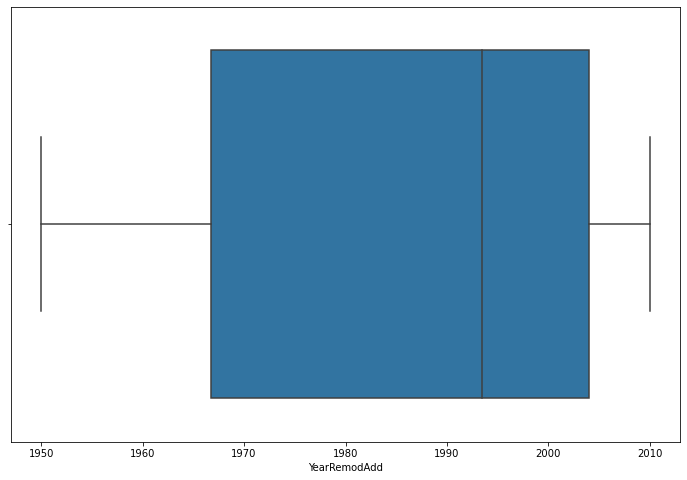

MasVnrArea


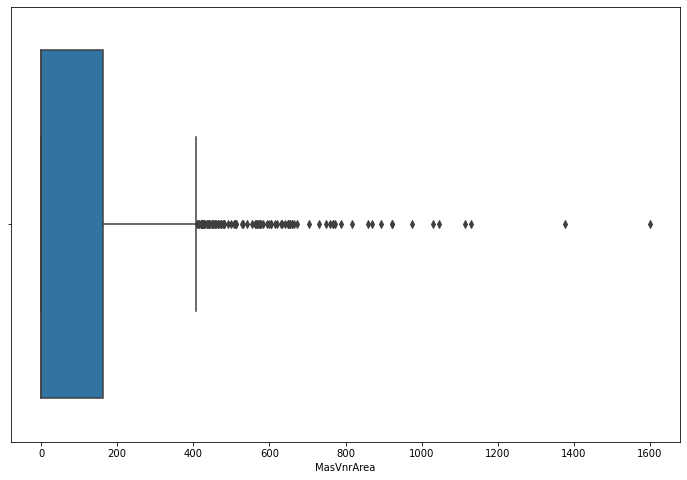

ExterQual


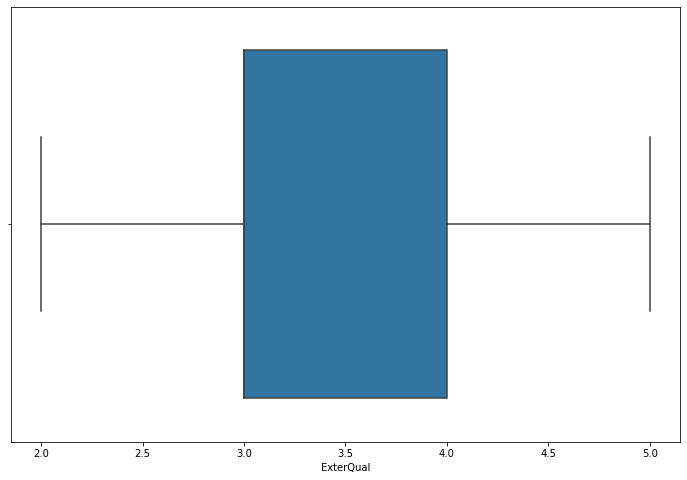

ExterCond


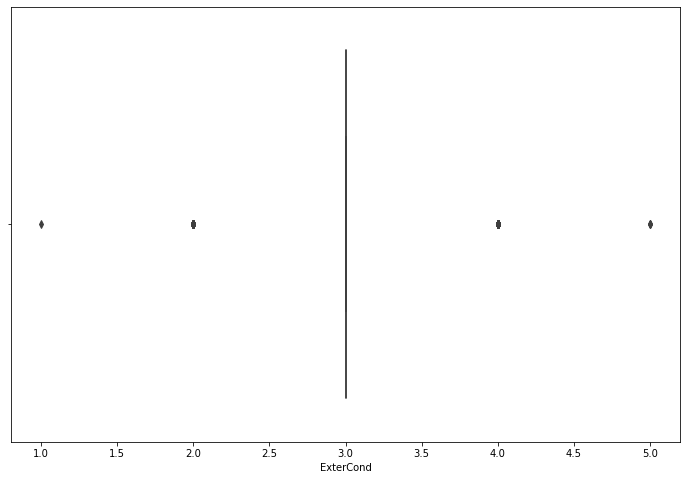

BsmtQual


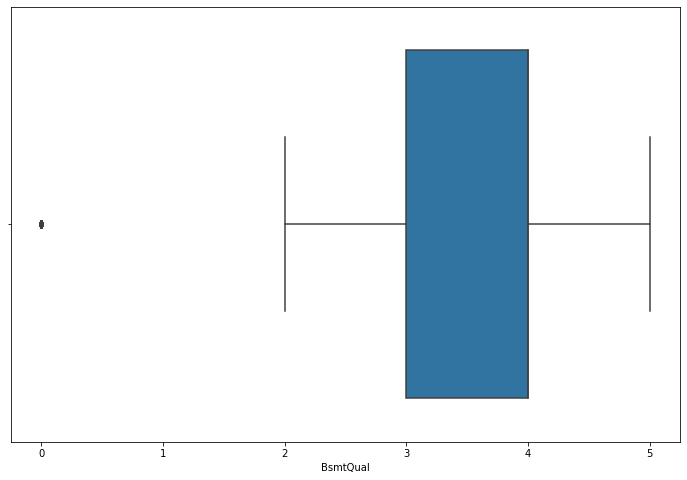

BsmtCond


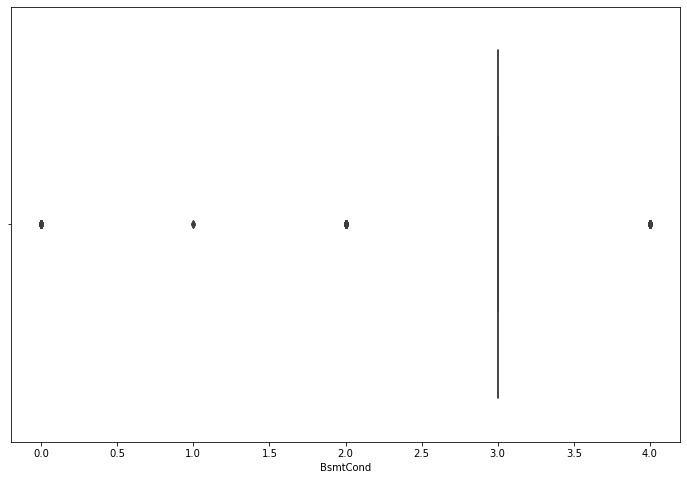

BsmtExposure


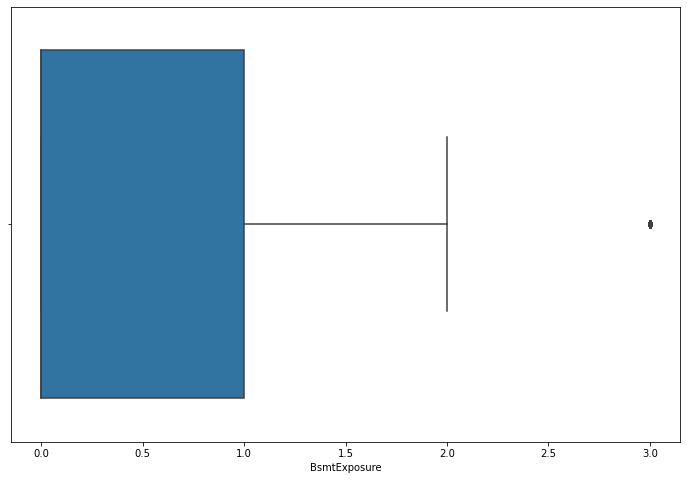

BsmtFinType1


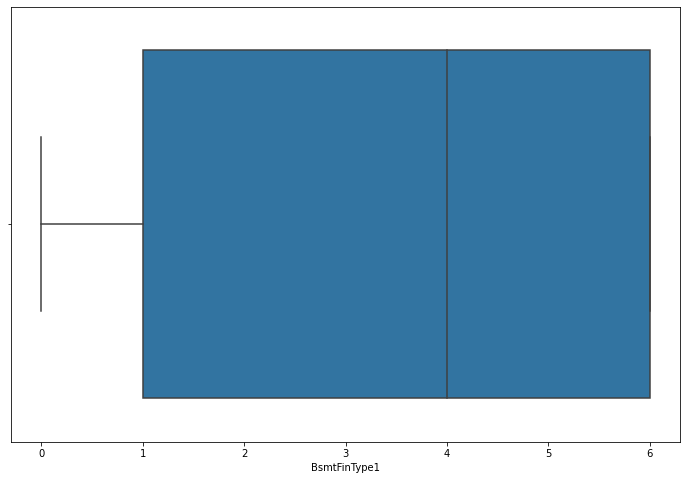

BsmtFinSF1


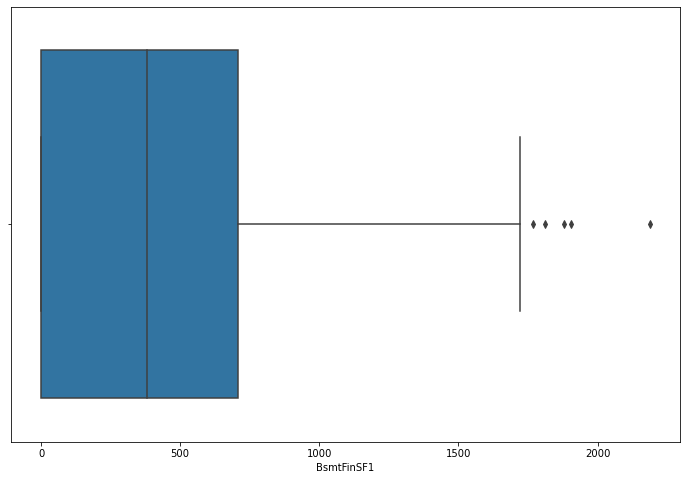

BsmtFinType2


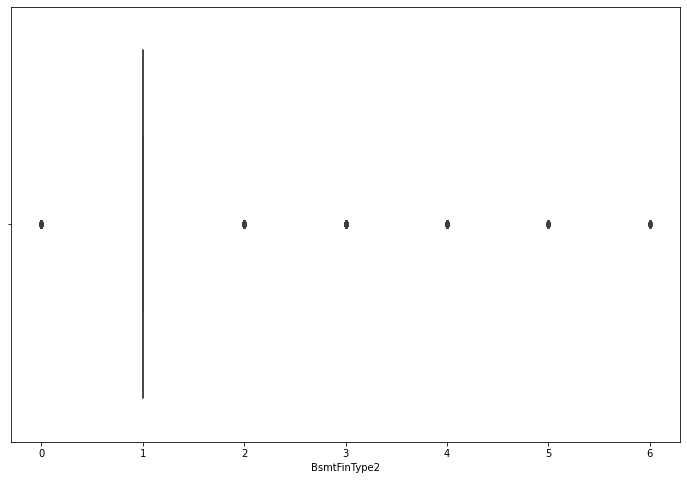

BsmtFinSF2


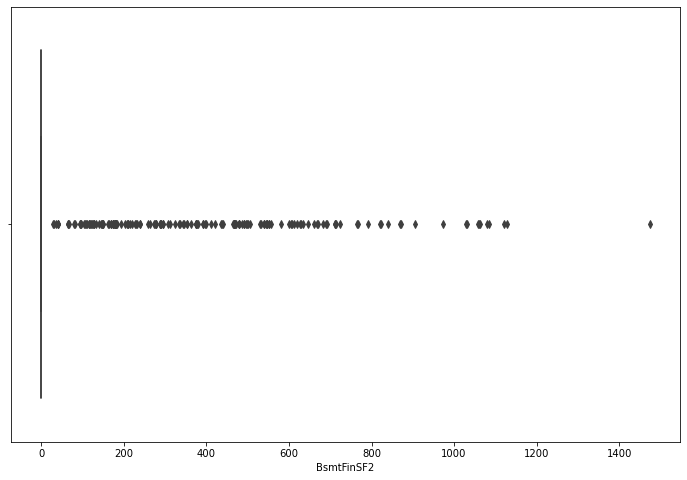

BsmtUnfSF


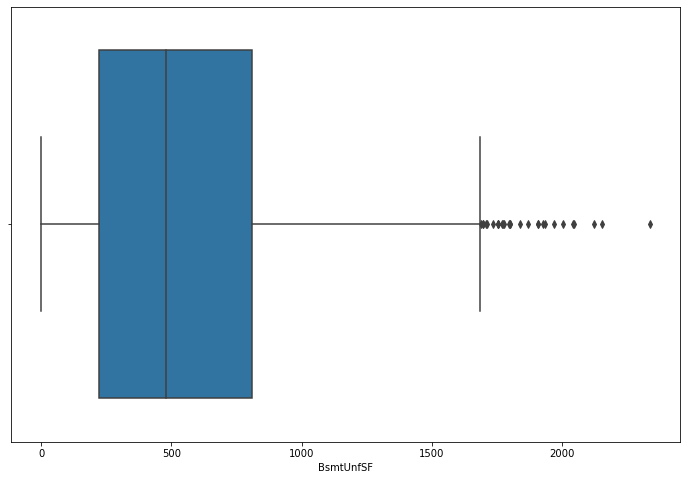

TotalBsmtSF


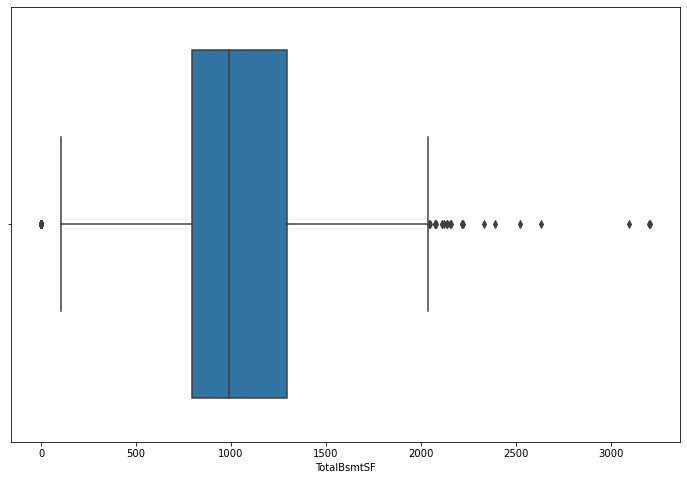

HeatingQC


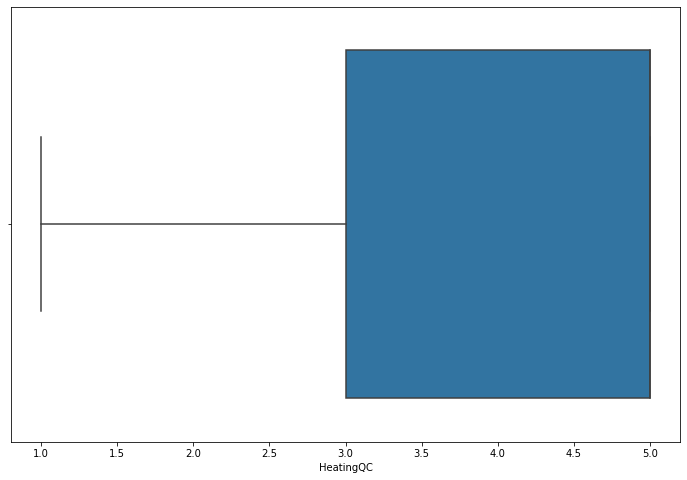

1stFlrSF


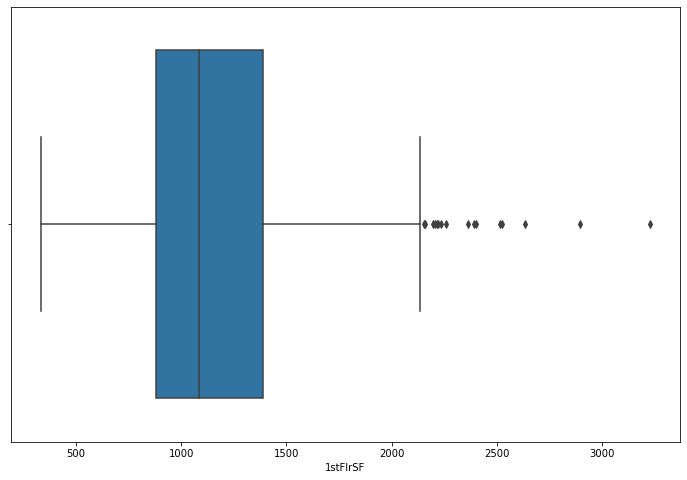

2ndFlrSF


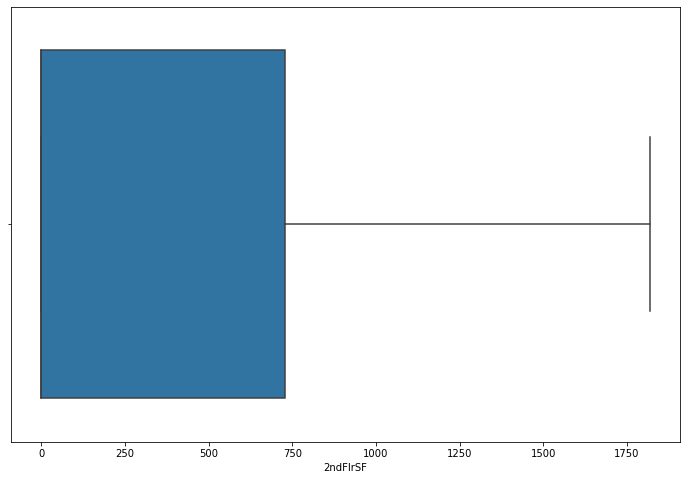

LowQualFinSF


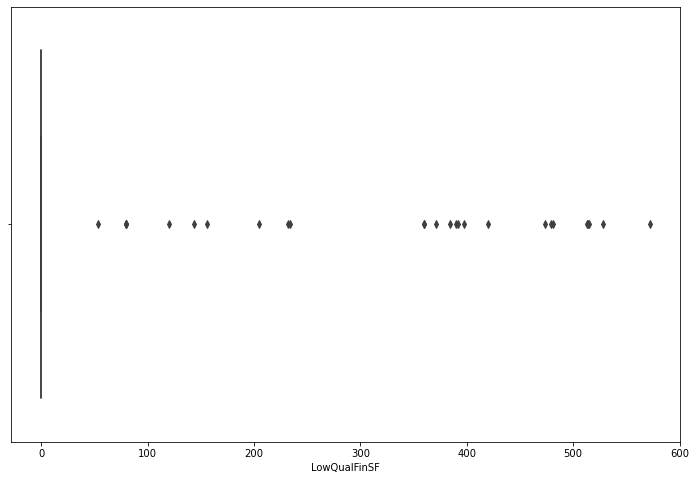

GrLivArea


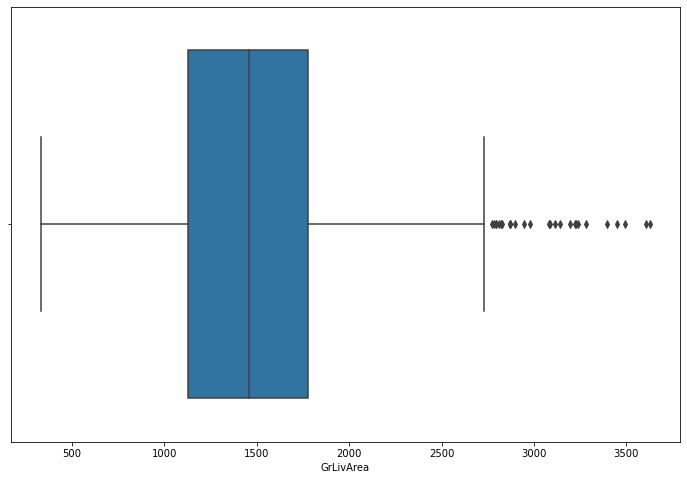

BsmtFullBath


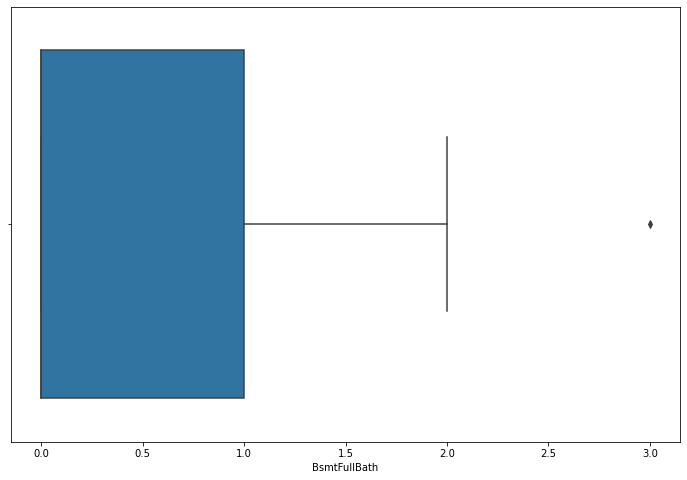

BsmtHalfBath


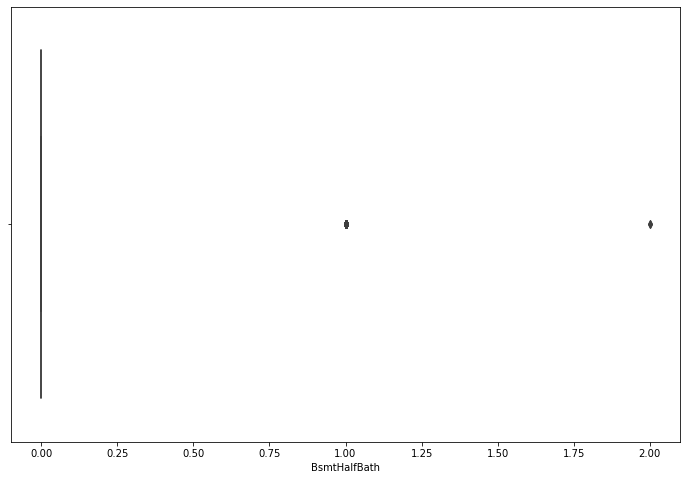

FullBath


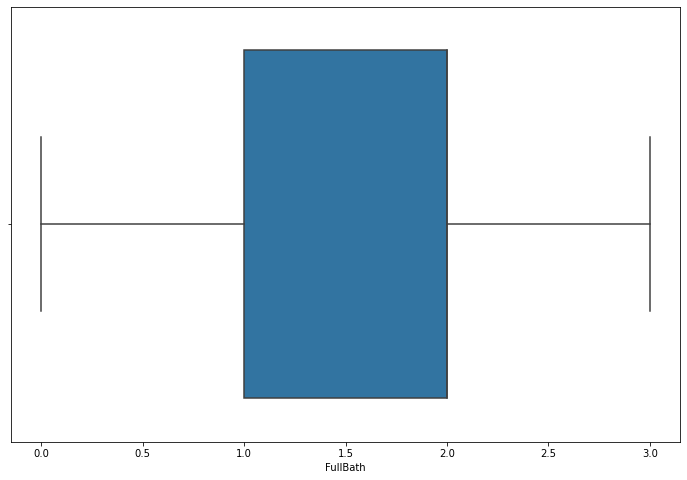

HalfBath


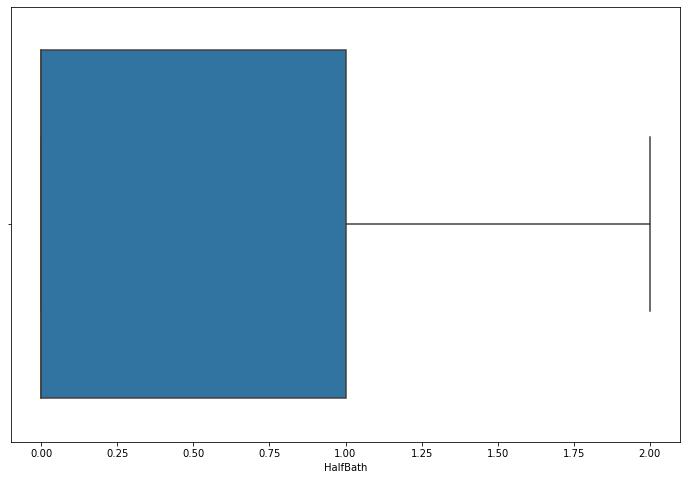

BedroomAbvGr


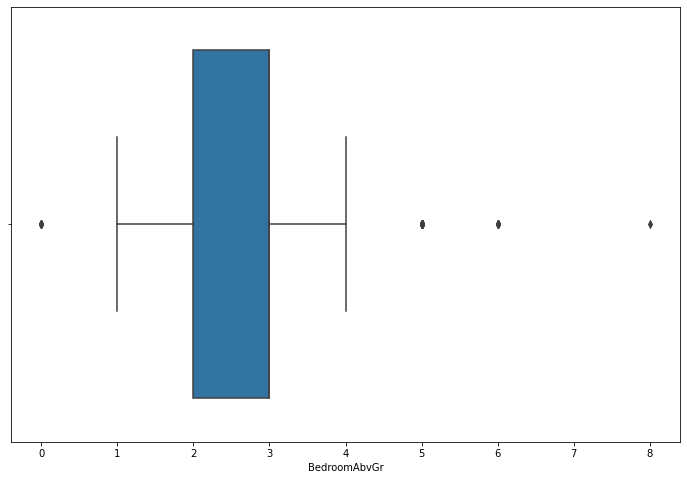

KitchenAbvGr


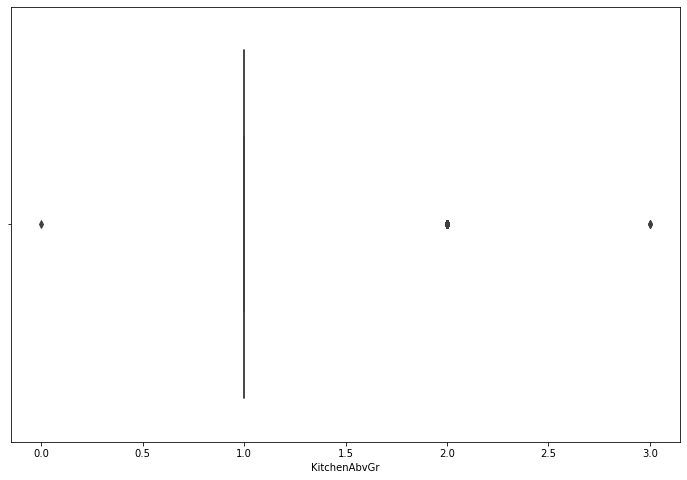

KitchenQual


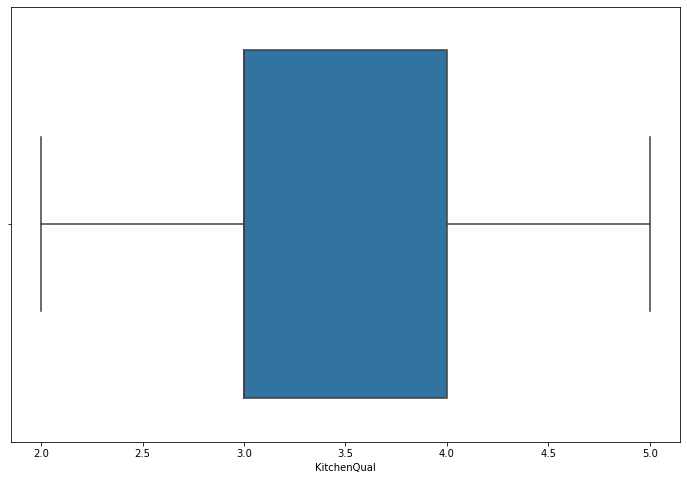

TotRmsAbvGrd


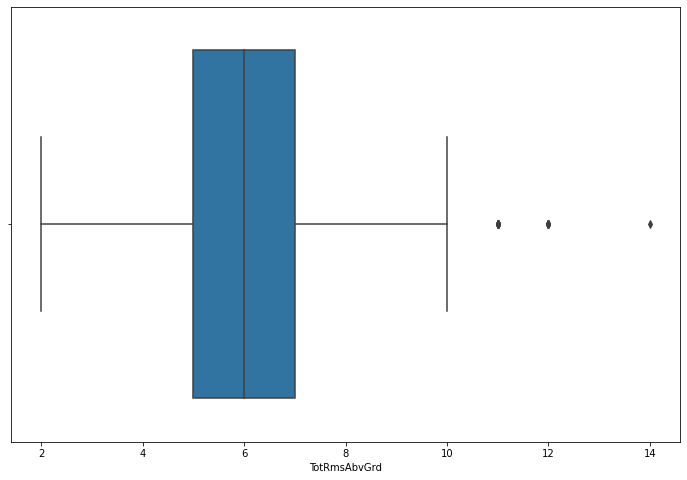

Functional


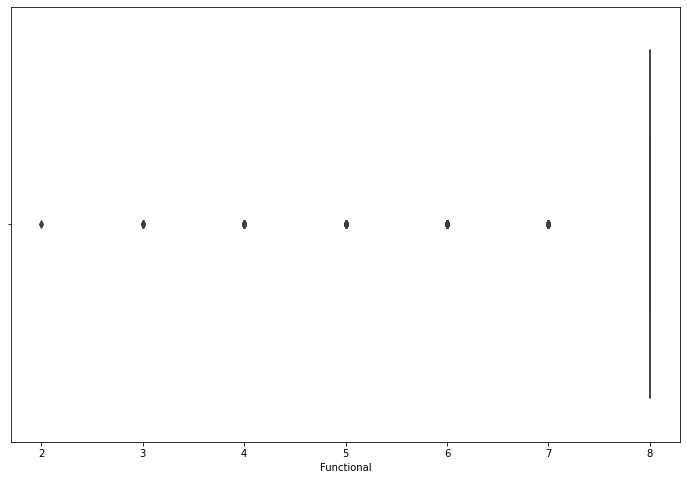

Fireplaces


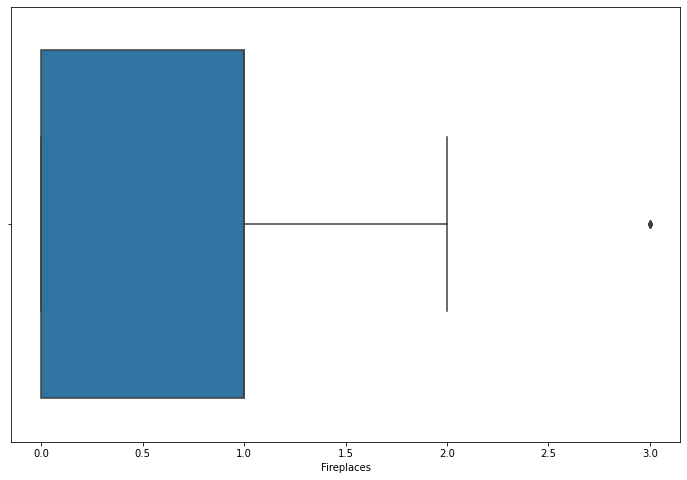

FireplaceQu


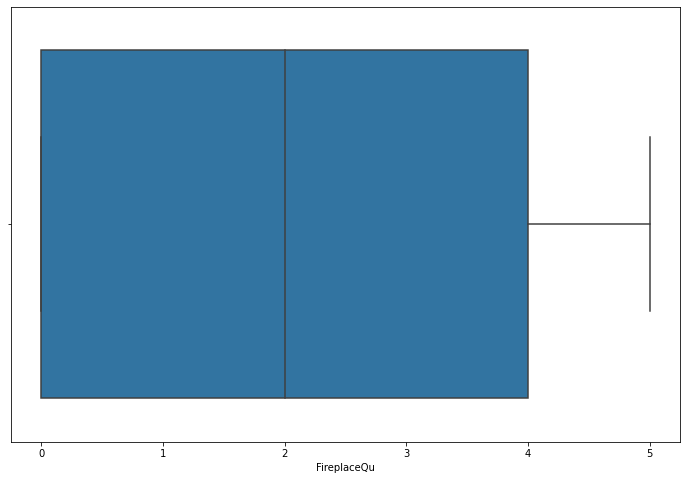

GarageYrBlt


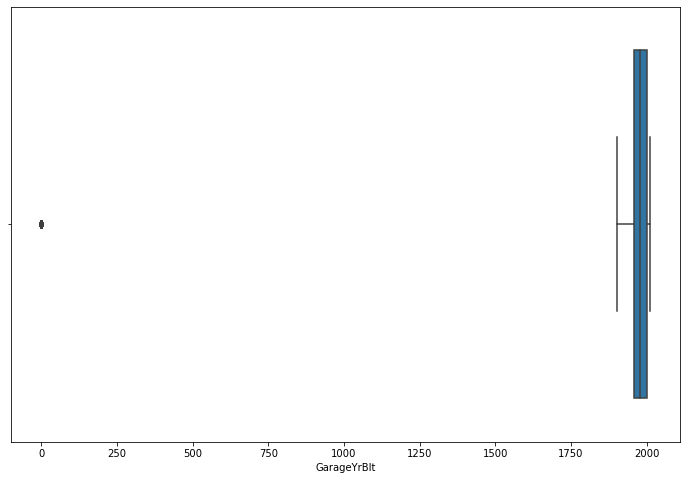

GarageCars


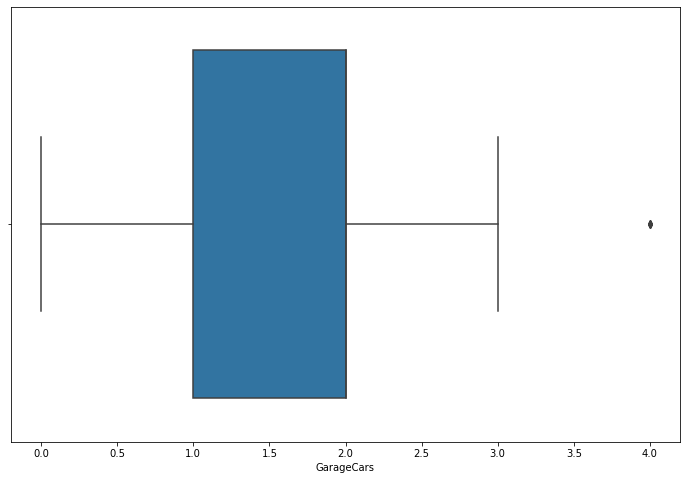

GarageArea


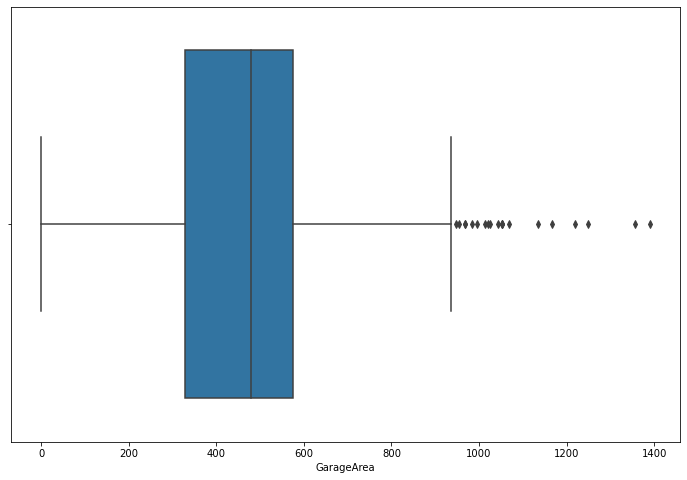

GarageQual


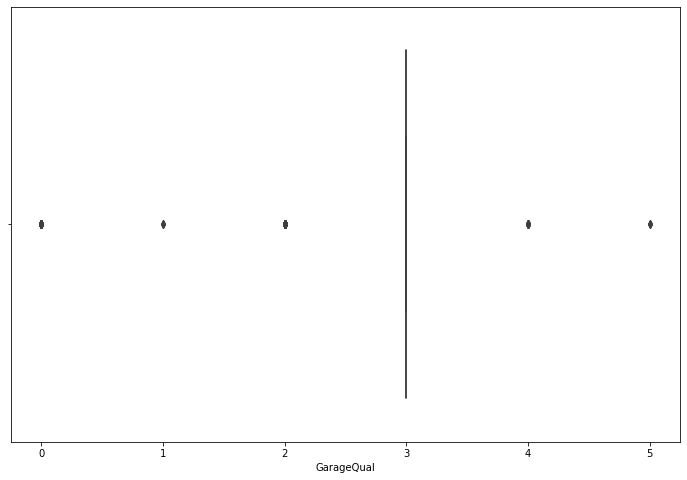

GarageCond


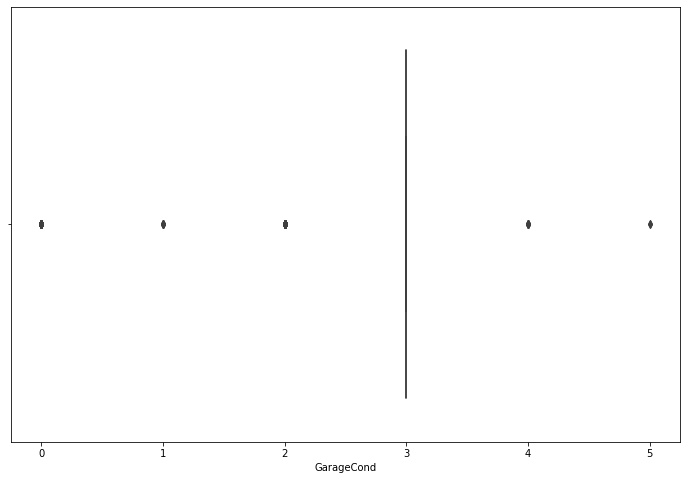

PavedDrive


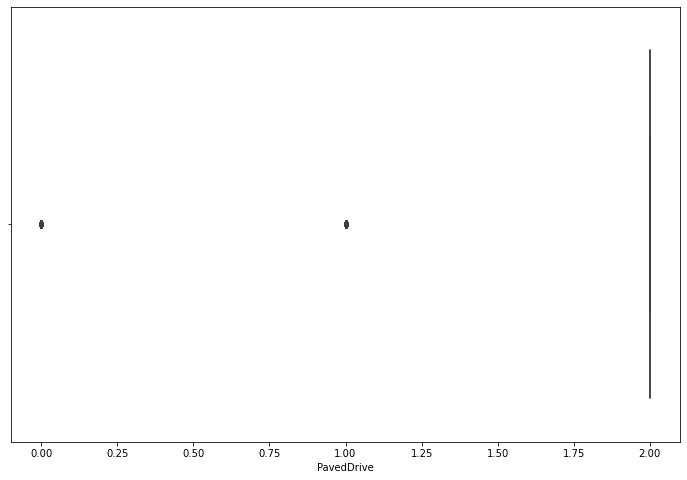

WoodDeckSF


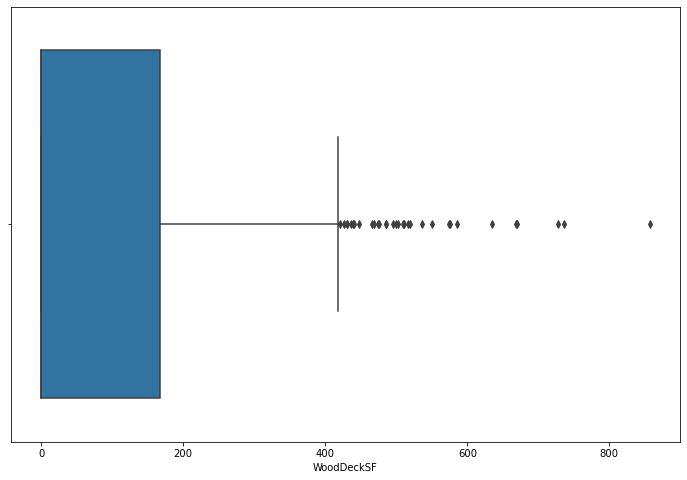

OpenPorchSF


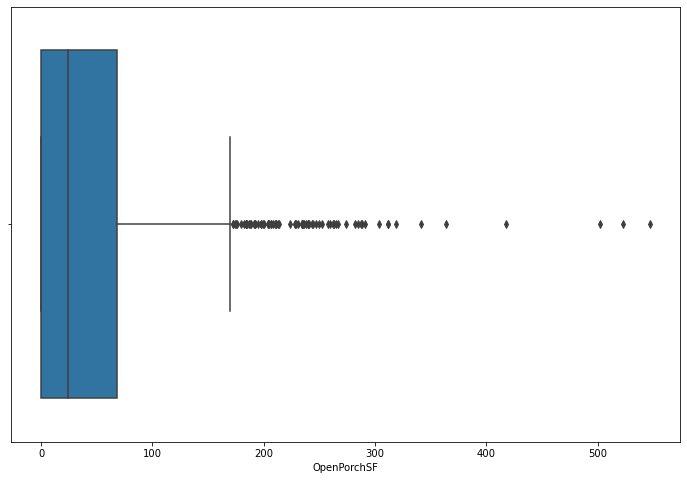

EnclosedPorch


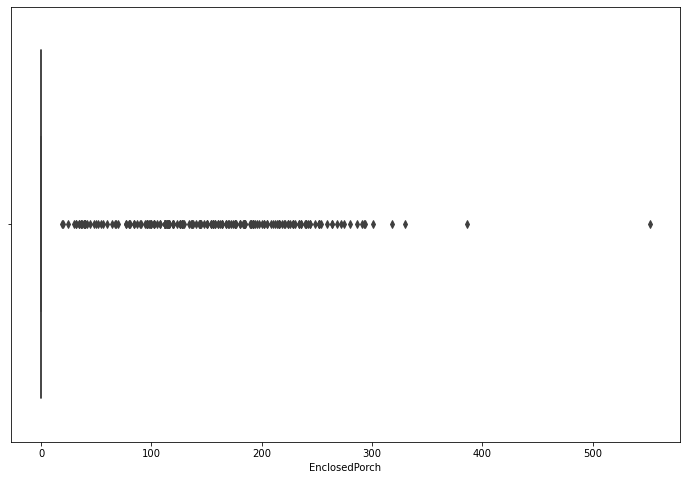

3SsnPorch


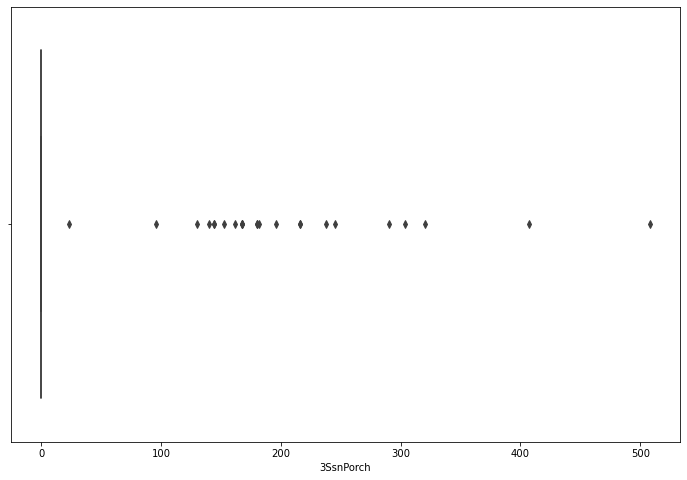

ScreenPorch


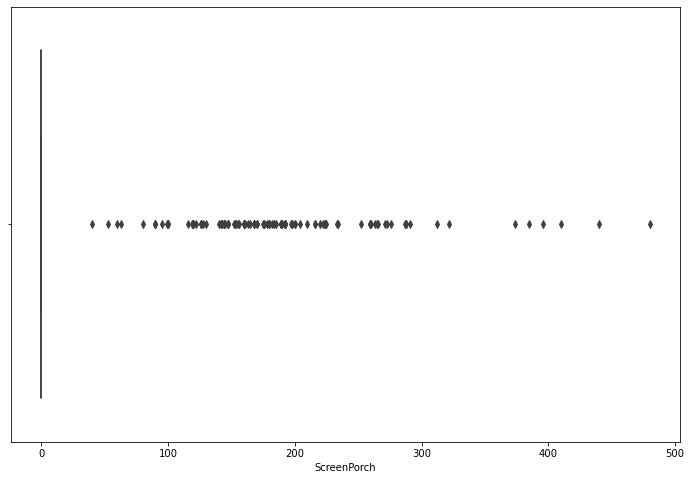

PoolArea


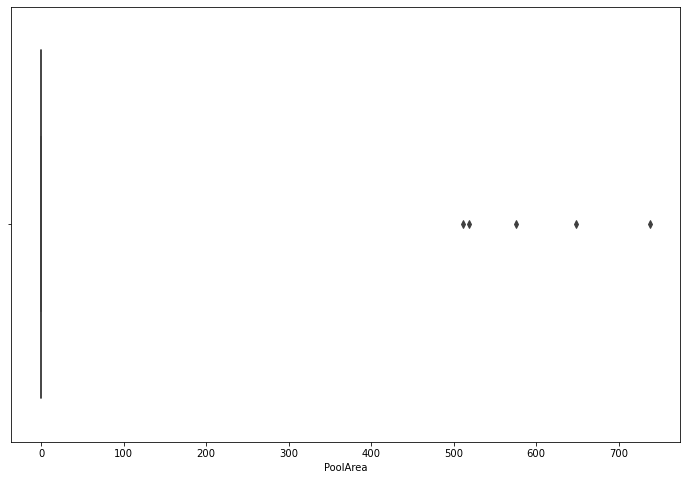

PoolQC


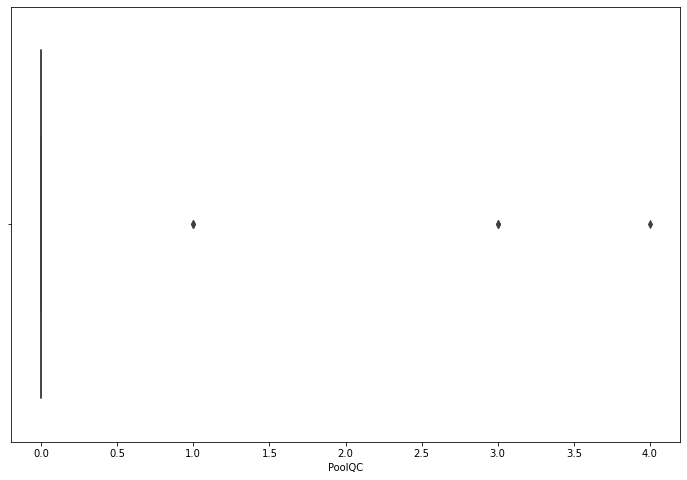

MiscVal


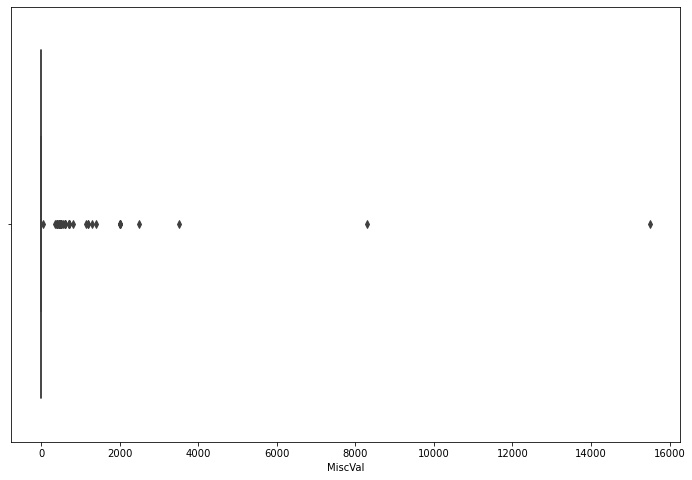

YrSold


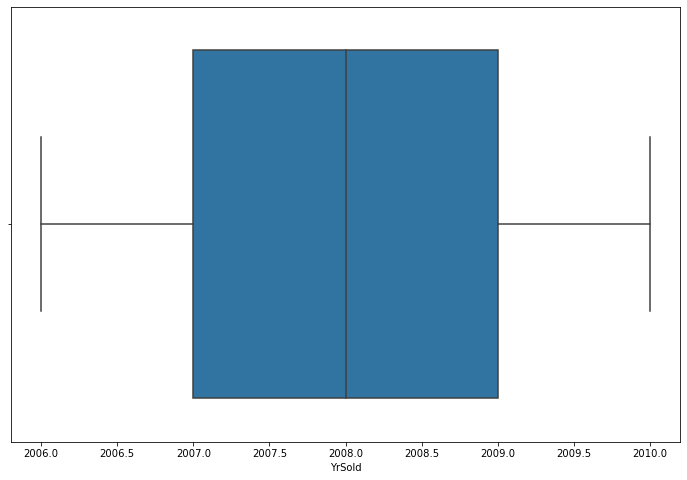

SalePrice


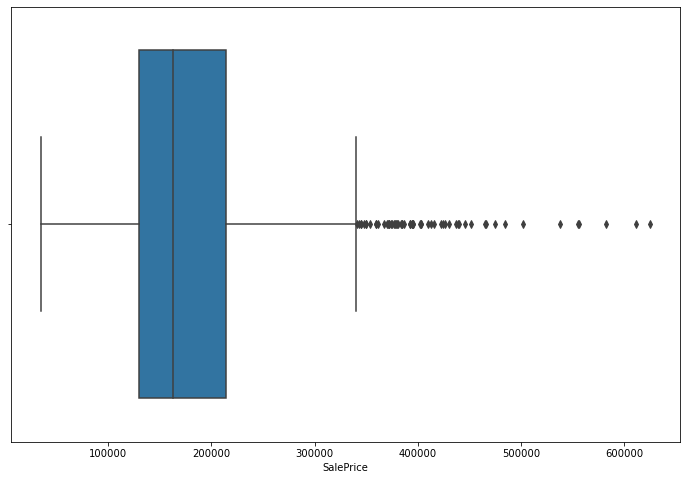

In [37]:
for col in train_num.columns:
    sns.boxplot(x=train_num[col])
    print(col)
    plt.show()

columns with outliers:
    
    1. LotFrontage: right skewed, few outliers present
    2. LotArea: right skewed, few outliers present
    3. YearBuilt: left skewed, few outliers present
    4. MasVnrArea: right skewed, many outliers present
    5. BsmtFinSF1: right skewed, few outliers present
    6. BsmtFinSF2: right skewed, many outliers present (the value is 0 for most) - may not be able to use this variable as a continuous predictor
    7. TotalBsmtSF: right skewed, few outliers present
    8. 1stFlrSF: right skewed, few outliers present
    9. LowQualFinSF: right skewed, few outliers present (the value is 0 for most) - may not be able to use this variable as a continous predictor.
    10. GrLivArea: right skewed, few outliers present
    11. GarageArea: right skewed, few outliers present
    12. WoodDeckSF: heavily right skewed, many outliers present (the value is 0 for most) - may not be able to use this variable as a continous predictor.
    13. OpenPorchSF: heavily right skewed, many outliers present
    14. EnclosedPorch: right skewed, many outliers present (the value is 0 for most) - may not be able to use this variable as a continous predictor.
    15. 3SsnPorch: right skewed, few outliers present (the value is 0 for most) - may not be able to use this variable as a continous predictor.
    16. ScreenPorch: right skewed, few outliers present (the value is 0 for most) - may not be able to use this variable as a continous predictor.
    17. PoolArea: right skewed, few outliers present (the value is 0 for most) - may not be able to use this variable as a continous predictor.
    18. MiscVal: right skewed, few outliers present (the value is 0 for most) - may not be able to use this variable as a continous predictor.
    19. SalePrice: Target variable, many outliers present. 

In [96]:
col_outliers = ['LotFrontage', 'LotArea', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 
               'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

### Trying to answer 2 questions now:
   
    1. Does outlier treatment result in better predictions?
    2. Do log transformations of heavily skewed variables result in better predictions?

Exploration 1: Outlier Treatment

In [154]:
def remove_outlier_iqr(X, y, factor):
    
    df_outlier_cols = train_full[col_outliers]
    
    # obtain the first quartile
    Q1 = df_outlier_cols.quantile(0.25)

    # obtain the third quartile
    Q3 = df_outlier_cols.quantile(0.75)

    # obtain the IQR
    IQR = Q3 - Q1

    # print the IQR
    print(IQR)
    
    #print('Removing any datapoints that are more than +/-{factor} times the IQR'.format(factor)
        
    df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
    y_iqr_removed = y[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
        
    return df_iqr_removed, y_iqr_removed

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [266]:
factor_iqr = np.arange(1, 4.1, 0.05)
train_rmse = []
test_rmse = []

for factor in factor_iqr:

    kf = KFold(n_splits=20, shuffle=True, random_state=42)
    
    # initializing the CV train and test scores' list
    train_scores = []
    test_scores = []
    X = train_full.copy()
    
    # inner loop for CV:
    for train_index, test_index in kf.split(X):
        
        # make a copy of the training data
        X = train_full.copy()
        X.drop('SalePrice', axis=1, inplace=True)
        y = train_full['SalePrice']
        
        # split the data into train and test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        # remove outliers from the train set depending on the factor in the list
        X_train, y_train = remove_outlier_iqr(X_train, y_train, factor)
        print('For', factor, ' shape of train is:')
        print('Shape of X_train', X_train.shape)
    
        # fit Linear model using the train data
        lr_outliers = LinearRegression()
        lr_outliers.fit(X_train, y_train)
    
        # calc train and test preds and rmse
        y_train_preds = lr_outliers.predict(X_train)
        y_train_mse = mean_squared_error(y_train, y_train_preds)

        y_test_preds = lr_outliers.predict(X_test)
        y_test_mse = mean_squared_error(y_test, y_test_preds)
        
        train_scores.append(np.sqrt(y_train_mse))
        test_scores.append(np.sqrt(y_test_mse))
    
    train_rmse.append(train_scores)
    test_rmse.append(test_scores)

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.0  shape of train is:
Shape of X_train (672, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.0  shape of train is:
Shape of X_train (671, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.0  shape of train is:
Shape of X_train (679, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
Total

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.0  shape of train is:
Shape of X_train (676, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.0  shape of train is:
Shape of X_train (684, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.0  shape of train is:
Shape of X_train (685, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
Total

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.0  shape of train is:
Shape of X_train (678, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.0  shape of train is:
Shape of X_train (679, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.05  shape of train is:
Shape of X_train (691, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
Tota

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.05  shape of train is:
Shape of X_train (695, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.05  shape of train is:
Shape of X_train (695, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.05  shape of train is:
Shape of X_train (704, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
To

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.05  shape of train is:
Shape of X_train (697, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.05  shape of train is:
Shape of X_train (699, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1  shape of train is:
Shape of X_train (721, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
Tot

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1  shape of train is:
Shape of X_train (725, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1  shape of train is:
Shape of X_train (726, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1  shape of train is:
Shape of X_train (733, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
Total

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1  shape of train is:
Shape of X_train (727, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1  shape of train is:
Shape of X_train (726, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1500000000000001  shape of train is:
Shape of X_train (901, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1   

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1500000000000001  shape of train is:
Shape of X_train (903, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1500000000000001  shape of train is:
Shape of X_train (905, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1500000000000001  shape of train is:
Shape of X_train (911, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1500000000000001  shape of train is:
Shape of X_train (902, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1500000000000001  shape of train is:
Shape of X_train (904, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.2000000000000002  shape of train is:
Shape of X_train (932, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.2000000000000002  shape of train is:
Shape of X_train (934, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.2000000000000002  shape of train is:
Shape of X_train (937, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.2000000000000002  shape of train is:
Shape of X_train (943, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.2000000000000002  shape of train is:
Shape of X_train (944, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.2000000000000002  shape of train is:
Shape of X_train (934, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.2000000000000002  shape of train is:
Shape of X_train (936, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.2500000000000002  shape of train is:
Shape of X_train (967, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.2500000000000002  shape of train is:
Shape of X_train (968, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.2500000000000002  shape of train is:
Shape of X_train (970, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.2500000000000002  shape of train is:
Shape of X_train (967, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.2500000000000002  shape of train is:
Shape of X_train (970, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.2500000000000002  shape of train is:
Shape of X_train (978, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3000000000000003  shape of train is:
Shape of X_train (1000, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3000000000000003  shape of train is:
Shape of X_train (1003, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3000000000000003  shape of train is:
Shape of X_train (997, 229)
LotFrontage      37.00
LotArea        4049.25
Year

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3000000000000003  shape of train is:
Shape of X_train (994, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3000000000000003  shape of train is:
Shape of X_train (1000, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3000000000000003  shape of train is:
Shape of X_train (993, 229)
LotFrontage      37.00
LotArea        4049.25
YearB

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3500000000000003  shape of train is:
Shape of X_train (1069, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3500000000000003  shape of train is:
Shape of X_train (1074, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3500000000000003  shape of train is:
Shape of X_train (1074, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3500000000000003  shape of train is:
Shape of X_train (1080, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3500000000000003  shape of train is:
Shape of X_train (1079, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3500000000000003  shape of train is:
Shape of X_train (1067, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4000000000000004  shape of train is:
Shape of X_train (1104, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4000000000000004  shape of train is:
Shape of X_train (1105, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4000000000000004  shape of train is:
Shape of X_train (1097, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 1.4000000000000004  shape of train is:
Shape of X_train (1104, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4000000000000004  shape of train is:
Shape of X_train (1106, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4000000000000004  shape of train is:
Shape of X_train (1110, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4000000000000004  shape of train is:
Shape 

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4000000000000004  shape of train is:
Shape of X_train (1112, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4000000000000004  shape of train is:
Shape of X_train (1101, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4000000000000004  shape of train is:
Shape of X_train (1105, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4500000000000004  shape of train is:
Shape of X_train (1124, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4500000000000004  shape of train is:
Shape of X_train (1127, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4500000000000004  shape of train is:
Shape of X_train (1131, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4500000000000004  shape of train is:
Shape of X_train (1128, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4500000000000004  shape of train is:
Shape of X_train (1132, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4500000000000004  shape of train is:
Shape of X_train (1138, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 1.5000000000000004  shape of train is:
Shape of X_train (1153, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5000000000000004  shape of train is:
Shape of X_train (1151, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5000000000000004  shape of train is:
Shape of X_train (1154, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5000000000000004  shape of train is:
Shape 

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5000000000000004  shape of train is:
Shape of X_train (1153, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5000000000000004  shape of train is:
Shape of X_train (1144, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5000000000000004  shape of train is:
Shape of X_train (1150, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5500000000000005  shape of train is:
Shape of X_train (1160, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5500000000000005  shape of train is:
Shape of X_train (1163, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5500000000000005  shape of train is:
Shape of X_train (1153, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5500000000000005  shape of train is:
Shape of X_train (1162, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5500000000000005  shape of train is:
Shape of X_train (1162, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5500000000000005  shape of train is:
Shape of X_train (1167, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5500000000000005  shape of train is:
Shape of X_train (1162, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5500000000000005  shape of train is:
Shape of X_train (1168, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5500000000000005  shape of train is:
Shape of X_train (1159, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6000000000000005  shape of train is:
Shape of X_train (1209, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6000000000000005  shape of train is:
Shape of X_train (1200, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6000000000000005  shape of train is:
Shape of X_train (1205, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 1.6000000000000005  shape of train is:
Shape of X_train (1200, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6000000000000005  shape of train is:
Shape of X_train (1203, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6000000000000005  shape of train is:
Shape of X_train (1203, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6000000000000005  shape of train is:
Shape 

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 1.6500000000000006  shape of train is:
Shape of X_train (1216, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6500000000000006  shape of train is:
Shape of X_train (1206, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6500000000000006  shape of train is:
Shape of X_train (1214, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6500000000000006  shape of train is:
Shape 

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6500000000000006  shape of train is:
Shape of X_train (1219, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6500000000000006  shape of train is:
Shape of X_train (1211, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6500000000000006  shape of train is:
Shape of X_train (1214, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6500000000000006  shape of train is:
Shape of X_train (1214, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7000000000000006  shape of train is:
Shape of X_train (1218, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7000000000000006  shape of train is:
Shape of X_train (1223, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7000000000000006  shape of train is:
Shape of X_train (1219, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7000000000000006  shape of train is:
Shape of X_train (1220, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7000000000000006  shape of train is:
Shape of X_train (1219, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7000000000000006  shape of train is:
Shape of X_train (1220, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7000000000000006  shape of train is:
Shape of X_train (1227, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7000000000000006  shape of train is:
Shape of X_train (1216, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7500000000000007  shape of train is:
Shape of X_train (1229, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7500000000000007  shape of train is:
Shape of X_train (1222, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7500000000000007  shape of train is:
Shape of X_train (1226, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7500000000000007  shape of train is:
Shape of X_train (1225, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7500000000000007  shape of train is:
Shape of X_train (1223, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7500000000000007  shape of train is:
Shape of X_train (1227, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8000000000000007  shape of train is:
Shape of X_train (1233, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8000000000000007  shape of train is:
Shape of X_train (1230, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8000000000000007  shape of train is:
Shape of X_train (1235, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8000000000000007  shape of train is:
Shape of X_train (1232, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8000000000000007  shape of train is:
Shape of X_train (1233, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8000000000000007  shape of train is:
Shape of X_train (1227, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8000000000000007  shape of train is:
Shape of X_train (1234, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8500000000000008  shape of train is:
Shape of X_train (1241, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8500000000000008  shape of train is:
Shape of X_train (1245, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8500000000000008  shape of train is:
Shape of X_train (1242, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8500000000000008  shape of train is:
Shape of X_train (1241, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8500000000000008  shape of train is:
Shape of X_train (1246, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8500000000000008  shape of train is:
Shape of X_train (1247, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8500000000000008  shape of train is:
Shape of X_train (1238, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8500000000000008  shape of train is:
Shape of X_train (1242, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9000000000000008  shape of train is:
Shape of X_train (1245, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9000000000000008  shape of train is:
Shape of X_train (1249, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9000000000000008  shape of train is:
Shape of X_train (1243, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9000000000000008  shape of train is:
Shape of X_train (1242, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9000000000000008  shape of train is:
Shape of X_train (1245, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9000000000000008  shape of train is:
Shape of X_train (1243, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9500000000000008  shape of train is:
Shape of X_train (1251, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9500000000000008  shape of train is:
Shape of X_train (1253, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9500000000000008  shape of train is:
Shape of X_train (1254, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 1.9500000000000008  shape of train is:
Shape of X_train (1260, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9500000000000008  shape of train is:
Shape of X_train (1254, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9500000000000008  shape of train is:
Shape of X_train (1256, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9500000000000008  shape of train is:
Shape 

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9500000000000008  shape of train is:
Shape of X_train (1256, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.000000000000001  shape of train is:
Shape of X_train (1261, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.000000000000001  shape of train is:
Shape of X_train (1262, 229)
LotFrontage      37.00
LotArea        4049.25
YearB

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.000000000000001  shape of train is:
Shape of X_train (1260, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.000000000000001  shape of train is:
Shape of X_train (1262, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.000000000000001  shape of train is:
Shape of X_train (1260, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 2.000000000000001  shape of train is:
Shape of X_train (1259, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.000000000000001  shape of train is:
Shape of X_train (1258, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.000000000000001  shape of train is:
Shape of X_train (1263, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.000000000000001  shape of train is:
Shape of X

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.0500000000000007  shape of train is:
Shape of X_train (1265, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.0500000000000007  shape of train is:
Shape of X_train (1266, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.0500000000000007  shape of train is:
Shape of X_train (1270, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.0500000000000007  shape of train is:
Shape of X_train (1266, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.0500000000000007  shape of train is:
Shape of X_train (1269, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.0500000000000007  shape of train is:
Shape of X_train (1264, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 2.0500000000000007  shape of train is:
Shape of X_train (1269, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.100000000000001  shape of train is:
Shape of X_train (1273, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.100000000000001  shape of train is:
Shape of X_train (1274, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.100000000000001  shape of train is:
Shape of 

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.100000000000001  shape of train is:
Shape of X_train (1272, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.100000000000001  shape of train is:
Shape of X_train (1271, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.100000000000001  shape of train is:
Shape of X_train (1276, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.100000000000001  shape of train is:
Shape of X_train (1278, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.100000000000001  shape of train is:
Shape of X_train (1270, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.100000000000001  shape of train is:
Shape of X_train (1274, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.1500000000000012  shape of train is:
Shape of X_train (1274, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.1500000000000012  shape of train is:
Shape of X_train (1277, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.1500000000000012  shape of train is:
Shape of X_train (1277, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.1500000000000012  shape of train is:
Shape of X_train (1276, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.1500000000000012  shape of train is:
Shape of X_train (1275, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.1500000000000012  shape of train is:
Shape of X_train (1277, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.200000000000001  shape of train is:
Shape of X_train (1278, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.200000000000001  shape of train is:
Shape of X_train (1279, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.200000000000001  shape of train is:
Shape of X_train (1282, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.200000000000001  shape of train is:
Shape of X_train (1281, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.200000000000001  shape of train is:
Shape of X_train (1277, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.200000000000001  shape of train is:
Shape of X_train (1279, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.250000000000001  shape of train is:
Shape of X_train (1284, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.250000000000001  shape of train is:
Shape of X_train (1280, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.250000000000001  shape of train is:
Shape of X_train (1281, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.250000000000001  shape of train is:
Shape of X_train (1286, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.250000000000001  shape of train is:
Shape of X_train (1281, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.250000000000001  shape of train is:
Shape of X_train (1284, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.250000000000001  shape of train is:
Shape of X_train (1284, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.300000000000001  shape of train is:
Shape of X_train (1286, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.300000000000001  shape of train is:
Shape of X_train (1287, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 2.300000000000001  shape of train is:
Shape of X_train (1284, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.300000000000001  shape of train is:
Shape of X_train (1285, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.300000000000001  shape of train is:
Shape of X_train (1285, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.300000000000001  shape of train is:
Shape of X

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.300000000000001  shape of train is:
Shape of X_train (1286, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.300000000000001  shape of train is:
Shape of X_train (1292, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.300000000000001  shape of train is:
Shape of X_train (1282, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.3500000000000014  shape of train is:
Shape of X_train (1289, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.3500000000000014  shape of train is:
Shape of X_train (1284, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.3500000000000014  shape of train is:
Shape of X_train (1285, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.3500000000000014  shape of train is:
Shape of X_train (1286, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.3500000000000014  shape of train is:
Shape of X_train (1285, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.3500000000000014  shape of train is:
Shape of X_train (1287, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.4000000000000012  shape of train is:
Shape of X_train (1289, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.4000000000000012  shape of train is:
Shape of X_train (1290, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.4000000000000012  shape of train is:
Shape of X_train (1294, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.4000000000000012  shape of train is:
Shape of X_train (1293, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.4000000000000012  shape of train is:
Shape of X_train (1288, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.4000000000000012  shape of train is:
Shape of X_train (1290, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.450000000000001  shape of train is:
Shape of X_train (1299, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.450000000000001  shape of train is:
Shape of X_train (1295, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.450000000000001  shape of train is:
Shape of X_train (1295, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.450000000000001  shape of train is:
Shape of X_train (1299, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.450000000000001  shape of train is:
Shape of X_train (1296, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.450000000000001  shape of train is:
Shape of X_train (1298, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.450000000000001  shape of train is:
Shape of X_train (1298, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5000000000000013  shape of train is:
Shape of X_train (1302, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5000000000000013  shape of train is:
Shape of X_train (1304, 229)
LotFrontage      37.00
LotArea        4049.25
Year

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5000000000000013  shape of train is:
Shape of X_train (1301, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5000000000000013  shape of train is:
Shape of X_train (1300, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5000000000000013  shape of train is:
Shape of X_train (1304, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5000000000000013  shape of train is:
Shape of X_train (1308, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5000000000000013  shape of train is:
Shape of X_train (1298, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5000000000000013  shape of train is:
Shape of X_train (1303, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5500000000000016  shape of train is:
Shape of X_train (1307, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5500000000000016  shape of train is:
Shape of X_train (1309, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5500000000000016  shape of train is:
Shape of X_train (1309, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5500000000000016  shape of train is:
Shape of X_train (1308, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5500000000000016  shape of train is:
Shape of X_train (1310, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5500000000000016  shape of train is:
Shape of X_train (1315, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.6000000000000014  shape of train is:
Shape of X_train (1313, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.6000000000000014  shape of train is:
Shape of X_train (1314, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.6000000000000014  shape of train is:
Shape of X_train (1312, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.6000000000000014  shape of train is:
Shape of X_train (1312, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.6000000000000014  shape of train is:
Shape of X_train (1314, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.6000000000000014  shape of train is:
Shape of X_train (1313, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.6500000000000012  shape of train is:
Shape of X_train (1315, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.6500000000000012  shape of train is:
Shape of X_train (1315, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.6500000000000012  shape of train is:
Shape of X_train (1315, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.6500000000000012  shape of train is:
Shape of X_train (1314, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.6500000000000012  shape of train is:
Shape of X_train (1318, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.6500000000000012  shape of train is:
Shape of X_train (1314, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7000000000000015  shape of train is:
Shape of X_train (1320, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7000000000000015  shape of train is:
Shape of X_train (1320, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7000000000000015  shape of train is:
Shape of X_train (1319, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7000000000000015  shape of train is:
Shape of X_train (1319, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7000000000000015  shape of train is:
Shape of X_train (1322, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7000000000000015  shape of train is:
Shape of X_train (1318, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7000000000000015  shape of train is:
Shape of X_train (1317, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7000000000000015  shape of train is:
Shape of X_train (1319, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7500000000000018  shape of train is:
Shape of X_train (1322, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7500000000000018  shape of train is:
Shape of X_train (1321, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7500000000000018  shape of train is:
Shape of X_train (1322, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7500000000000018  shape of train is:
Shape of X_train (1321, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7500000000000018  shape of train is:
Shape of X_train (1323, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7500000000000018  shape of train is:
Shape of X_train (1326, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7500000000000018  shape of train is:
Shape of X_train (1319, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.8000000000000016  shape of train is:
Shape of X_train (1325, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.8000000000000016  shape of train is:
Shape of X_train (1323, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.8000000000000016  shape of train is:
Shape of X_train (1324, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.8000000000000016  shape of train is:
Shape of X_train (1324, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.8000000000000016  shape of train is:
Shape of X_train (1323, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.8000000000000016  shape of train is:
Shape of X_train (1326, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 2.8500000000000014  shape of train is:
Shape of X_train (1325, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.8500000000000014  shape of train is:
Shape of X_train (1324, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.8500000000000014  shape of train is:
Shape of X_train (1325, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.8500000000000014  shape of train is:
Shape 

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.8500000000000014  shape of train is:
Shape of X_train (1323, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.8500000000000014  shape of train is:
Shape of X_train (1326, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.8500000000000014  shape of train is:
Shape of X_train (1323, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.9000000000000017  shape of train is:
Shape of X_train (1329, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.9000000000000017  shape of train is:
Shape of X_train (1329, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.9000000000000017  shape of train is:
Shape of X_train (1328, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.9000000000000017  shape of train is:
Shape of X_train (1328, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.9000000000000017  shape of train is:
Shape of X_train (1331, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.9000000000000017  shape of train is:
Shape of X_train (1326, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.9000000000000017  shape of train is:
Shape of X_train (1326, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.9000000000000017  shape of train is:
Shape of X_train (1328, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.950000000000002  shape of train is:
Shape of X_train (1330, 229)
LotFrontage      37.00
LotArea        4049.25
Year

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.950000000000002  shape of train is:
Shape of X_train (1328, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.950000000000002  shape of train is:
Shape of X_train (1330, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.950000000000002  shape of train is:
Shape of X_train (1329, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.950000000000002  shape of train is:
Shape of X_train (1331, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.950000000000002  shape of train is:
Shape of X_train (1331, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.950000000000002  shape of train is:
Shape of X_train (1327, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.0000000000000018  shape of train is:
Shape of X_train (1332, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.0000000000000018  shape of train is:
Shape of X_train (1331, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.0000000000000018  shape of train is:
Shape of X_train (1331, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.0000000000000018  shape of train is:
Shape of X_train (1332, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.0000000000000018  shape of train is:
Shape of X_train (1331, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.0000000000000018  shape of train is:
Shape of X_train (1334, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.0500000000000016  shape of train is:
Shape of X_train (1331, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.0500000000000016  shape of train is:
Shape of X_train (1333, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.0500000000000016  shape of train is:
Shape of X_train (1333, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.0500000000000016  shape of train is:
Shape of X_train (1334, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.0500000000000016  shape of train is:
Shape of X_train (1331, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.0500000000000016  shape of train is:
Shape of X_train (1333, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.100000000000002  shape of train is:
Shape of X_train (1334, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.100000000000002  shape of train is:
Shape of X_train (1333, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.100000000000002  shape of train is:
Shape of X_train (1332, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.100000000000002  shape of train is:
Shape of X_train (1337, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.100000000000002  shape of train is:
Shape of X_train (1332, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.100000000000002  shape of train is:
Shape of X_train (1335, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.100000000000002  shape of train is:
Shape of X_train (1333, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.150000000000002  shape of train is:
Shape of X_train (1336, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.150000000000002  shape of train is:
Shape of X_train (1335, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.150000000000002  shape of train is:
Shape of X_train (1336, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.150000000000002  shape of train is:
Shape of X_train (1335, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.150000000000002  shape of train is:
Shape of X_train (1338, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.150000000000002  shape of train is:
Shape of X_train (1337, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.150000000000002  shape of train is:
Shape of X_train (1333, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.150000000000002  shape of train is:
Shape of X_train (1334, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.200000000000002  shape of train is:
Shape of X_train (1334, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.200000000000002  shape of train is:
Shape of X_train (1335, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.200000000000002  shape of train is:
Shape of X_train (1337, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.200000000000002  shape of train is:
Shape of X_train (1335, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.200000000000002  shape of train is:
Shape of X_train (1337, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.200000000000002  shape of train is:
Shape of X_train (1338, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.2500000000000018  shape of train is:
Shape of X_train (1338, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.2500000000000018  shape of train is:
Shape of X_train (1339, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.2500000000000018  shape of train is:
Shape of X_train (1337, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.2500000000000018  shape of train is:
Shape of X_train (1339, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.2500000000000018  shape of train is:
Shape of X_train (1337, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.2500000000000018  shape of train is:
Shape of X_train (1339, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.300000000000002  shape of train is:
Shape of X_train (1340, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.300000000000002  shape of train is:
Shape of X_train (1339, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.300000000000002  shape of train is:
Shape of X_train (1338, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.300000000000002  shape of train is:
Shape of X_train (1343, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.300000000000002  shape of train is:
Shape of X_train (1338, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.300000000000002  shape of train is:
Shape of X_train (1340, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.300000000000002  shape of train is:
Shape of X_train (1339, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.3500000000000023  shape of train is:
Shape of X_train (1345, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.3500000000000023  shape of train is:
Shape of X_train (1343, 229)
LotFrontage      37.00
LotArea        4049.25
Year

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.3500000000000023  shape of train is:
Shape of X_train (1344, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.3500000000000023  shape of train is:
Shape of X_train (1344, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.3500000000000023  shape of train is:
Shape of X_train (1346, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.3500000000000023  shape of train is:
Shape of X_train (1342, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.3500000000000023  shape of train is:
Shape of X_train (1343, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.3500000000000023  shape of train is:
Shape of X_train (1343, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.400000000000002  shape of train is:
Shape of X_train (1346, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.400000000000002  shape of train is:
Shape of X_train (1345, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.400000000000002  shape of train is:
Shape of X_train (1346, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.400000000000002  shape of train is:
Shape of X_train (1345, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.400000000000002  shape of train is:
Shape of X_train (1346, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.400000000000002  shape of train is:
Shape of X_train (1345, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.450000000000002  shape of train is:
Shape of X_train (1348, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.450000000000002  shape of train is:
Shape of X_train (1347, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.450000000000002  shape of train is:
Shape of X_train (1347, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.450000000000002  shape of train is:
Shape of X_train (1348, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.450000000000002  shape of train is:
Shape of X_train (1350, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.450000000000002  shape of train is:
Shape of X_train (1346, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.450000000000002  shape of train is:
Shape of X_train (1346, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.450000000000002  shape of train is:
Shape of X_train (1347, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.500000000000002  shape of train is:
Shape of X_train (1349, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.500000000000002  shape of train is:
Shape of X_train (1347, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.500000000000002  shape of train is:
Shape of X_train (1348, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.500000000000002  shape of train is:
Shape of X_train (1349, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.500000000000002  shape of train is:
Shape of X_train (1350, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.500000000000002  shape of train is:
Shape of X_train (1349, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.500000000000002  shape of train is:
Shape of X_train (1347, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.5500000000000025  shape of train is:
Shape of X_train (1348, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.5500000000000025  shape of train is:
Shape of X_train (1347, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.5500000000000025  shape of train is:
Shape of X_train (1347, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 3.5500000000000025  shape of train is:
Shape of X_train (1347, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.5500000000000025  shape of train is:
Shape of X_train (1348, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.5500000000000025  shape of train is:
Shape of X_train (1348, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.5500000000000025  shape of train is:
Shape 

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.6000000000000023  shape of train is:
Shape of X_train (1351, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.6000000000000023  shape of train is:
Shape of X_train (1350, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.6000000000000023  shape of train is:
Shape of X_train (1351, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.6000000000000023  shape of train is:
Shape of X_train (1350, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.6000000000000023  shape of train is:
Shape of X_train (1350, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.6000000000000023  shape of train is:
Shape of X_train (1350, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.650000000000002  shape of train is:
Shape of X_train (1354, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.650000000000002  shape of train is:
Shape of X_train (1353, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.650000000000002  shape of train is:
Shape of X_train (1353, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.650000000000002  shape of train is:
Shape of X_train (1354, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.650000000000002  shape of train is:
Shape of X_train (1355, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.650000000000002  shape of train is:
Shape of X_train (1351, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.650000000000002  shape of train is:
Shape of X_train (1352, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.650000000000002  shape of train is:
Shape of X_train (1352, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7000000000000024  shape of train is:
Shape of X_train (1355, 229)
LotFrontage      37.00
LotArea        4049.25
YearB

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7000000000000024  shape of train is:
Shape of X_train (1353, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7000000000000024  shape of train is:
Shape of X_train (1354, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7000000000000024  shape of train is:
Shape of X_train (1355, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7000000000000024  shape of train is:
Shape of X_train (1355, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7000000000000024  shape of train is:
Shape of X_train (1355, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7000000000000024  shape of train is:
Shape of X_train (1353, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7500000000000027  shape of train is:
Shape of X_train (1354, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7500000000000027  shape of train is:
Shape of X_train (1353, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7500000000000027  shape of train is:
Shape of X_train (1353, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 3.7500000000000027  shape of train is:
Shape of X_train (1353, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7500000000000027  shape of train is:
Shape of X_train (1353, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7500000000000027  shape of train is:
Shape of X_train (1353, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7500000000000027  shape of train is:
Shape 

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8000000000000025  shape of train is:
Shape of X_train (1355, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8000000000000025  shape of train is:
Shape of X_train (1354, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8000000000000025  shape of train is:
Shape of X_train (1354, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8000000000000025  shape of train is:
Shape of X_train (1355, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8000000000000025  shape of train is:
Shape of X_train (1355, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8000000000000025  shape of train is:
Shape of X_train (1352, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8000000000000025  shape of train is:
Shape of X_train (1353, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8000000000000025  shape of train is:
Shape of X_train (1353, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8500000000000023  shape of train is:
Shape of X_train (1357, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8500000000000023  shape of train is:
Shape of X_train (1355, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8500000000000023  shape of train is:
Shape of X_train (1356, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8500000000000023  shape of train is:
Shape of X_train (1357, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8500000000000023  shape of train is:
Shape of X_train (1357, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8500000000000023  shape of train is:
Shape of X_train (1357, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8500000000000023  shape of train is:
Shape of X_train (1355, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.9000000000000026  shape of train is:
Shape of X_train (1356, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.9000000000000026  shape of train is:
Shape of X_train (1355, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.9000000000000026  shape of train is:
Shape of X_train (1355, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.9000000000000026  shape of train is:
Shape of X_train (1355, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.9000000000000026  shape of train is:
Shape of X_train (1355, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.9000000000000026  shape of train is:
Shape of X_train (1357, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.950000000000003  shape of train is:
Shape of X_train (1355, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.950000000000003  shape of train is:
Shape of X_train (1356, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.950000000000003  shape of train is:
Shape of X_train (1356, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.950000000000003  shape of train is:
Shape of X_train (1355, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.950000000000003  shape of train is:
Shape of X_train (1355, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.950000000000003  shape of train is:
Shape of X_train (1355, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 4.000000000000003  shape of train is:
Shape of X_train (1355, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 4.000000000000003  shape of train is:
Shape of X_train (1356, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 4.000000000000003  shape of train is:
Shape of X_train (1355, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 4.000000000000003  shape of train is:
Shape of X_train (1357, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 4.000000000000003  shape of train is:
Shape of X_train (1354, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 4.000000000000003  shape of train is:
Shape of X_train (1355, 229)
LotFrontage      37.00
LotArea        4049.25
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 4.000000000000003  shape of train is:
Shape of X_train (1355, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 4.0500000000000025  shape of train is:
Shape of X_train (1358, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 4.0500000000000025  shape of train is:
Shape of X_train (1356, 229)
LotFrontage      37.00
LotArea        4049.25
Year

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 4.0500000000000025  shape of train is:
Shape of X_train (1357, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 4.0500000000000025  shape of train is:
Shape of X_train (1358, 229)
LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 4.0500000000000025  shape of train is:
Shape of X_train (1358, 229)
LotFrontage      37.00
LotArea        4049.25
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_30600/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

In [267]:
test_generalization_error = [np.mean(x) for x in test_rmse]
test_std_error = [np.std(x, ddof=1) for x in test_rmse]

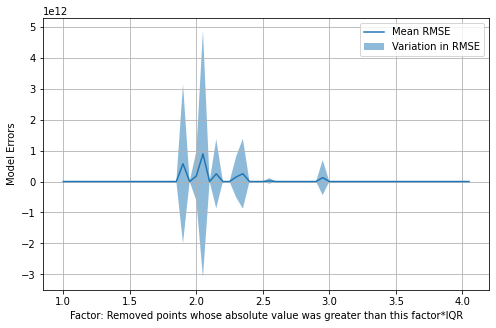

In [268]:
lower_bound = np.array(test_generalization_error) - np.array(test_std_error)
upper_bound = np.array(test_generalization_error) + np.array(test_std_error)

plt.fill_between(x=factor_iqr, y1=lower_bound, y2=upper_bound, alpha=0.5)
plt.plot(factor_iqr, test_generalization_error)
#plt.plot(factor_iqr, test_std_error)
plt.ylabel('Model Errors')
plt.xlabel('Factor: Removed points whose absolute value was greater than this factor*IQR')
plt.legend(['Mean RMSE', 'Variation in RMSE'])
plt.grid(True)
plt.show()

According to the above graph, removing outliers which are above and below the IQR factor increases the model performance.

Wherever very few outliers were removed (to the right), the model rmse is quite high, on the other hand, the model rmse seems to be much lower when datapoints containing outliers are removed.

We will keep the factor at 1.2

In [159]:
X_full.shape

(1456, 229)

In [269]:
# removing outliers from the training data
X_full = train_full.drop('SalePrice', axis=1)
y = train_full['SalePrice']

train_full_no_outliers, y_no_outliers = remove_outlier_iqr(X_full, y, 1.2)
print(train_full_no_outliers.shape, y_no_outliers.shape)

LotFrontage      37.00
LotArea        4049.25
YearBuilt        46.00
BsmtFinSF1      706.50
TotalBsmtSF     498.75
1stFlrSF        507.25
GrLivArea       647.25
GarageArea      246.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
(985, 229) (985,)


Exploration 2: Do log transformations of heavily skewed variables result in better predictions?

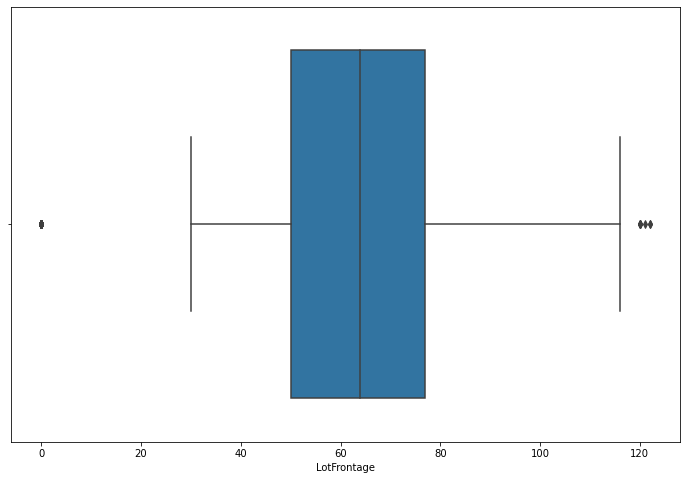

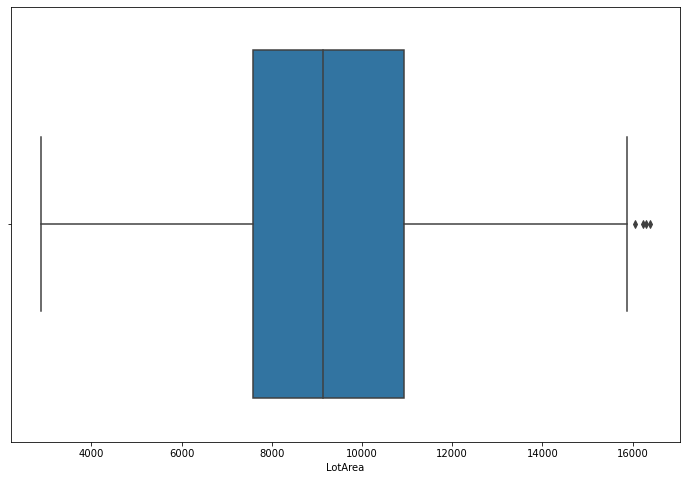

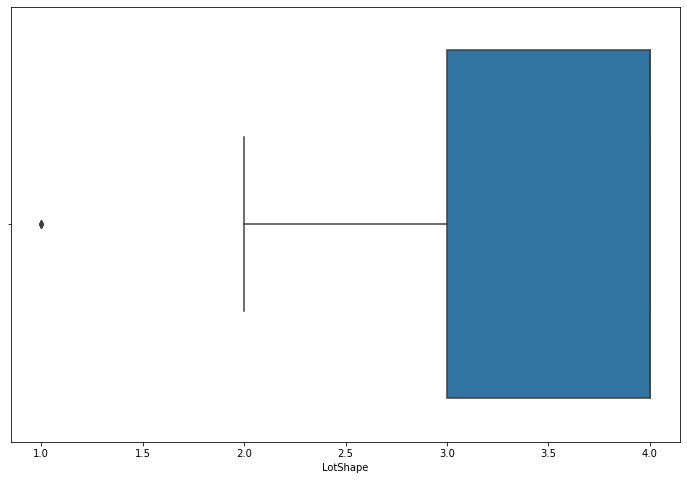

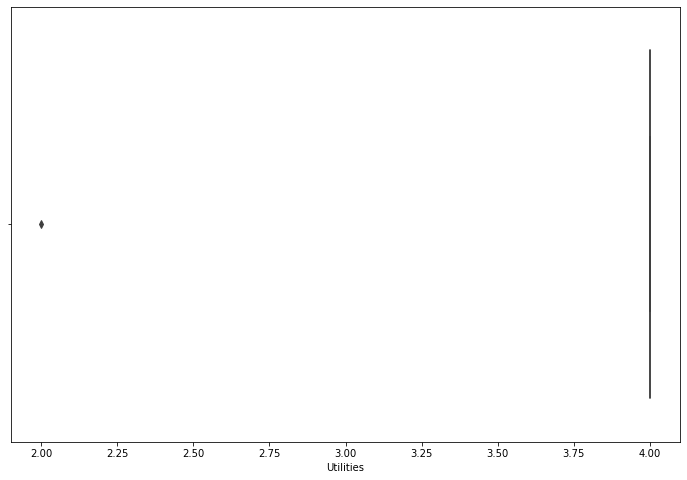

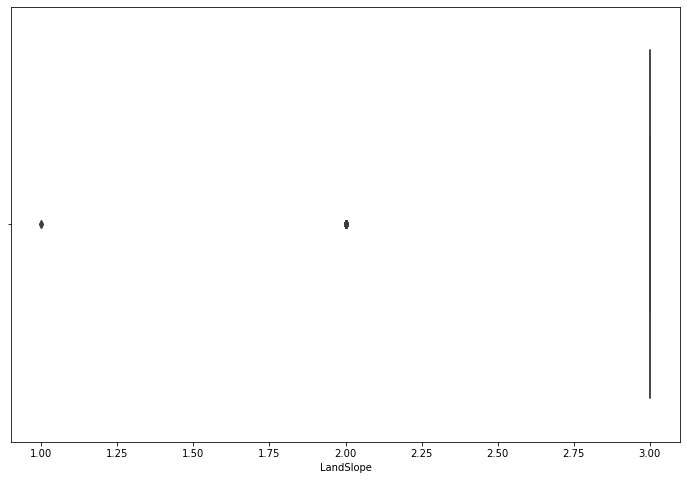

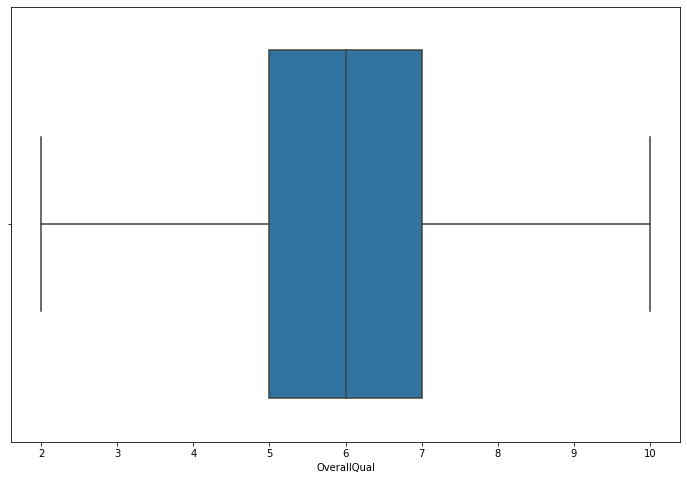

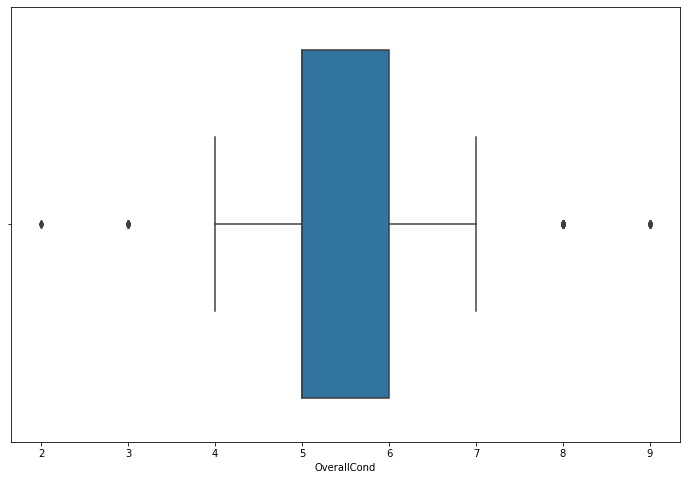

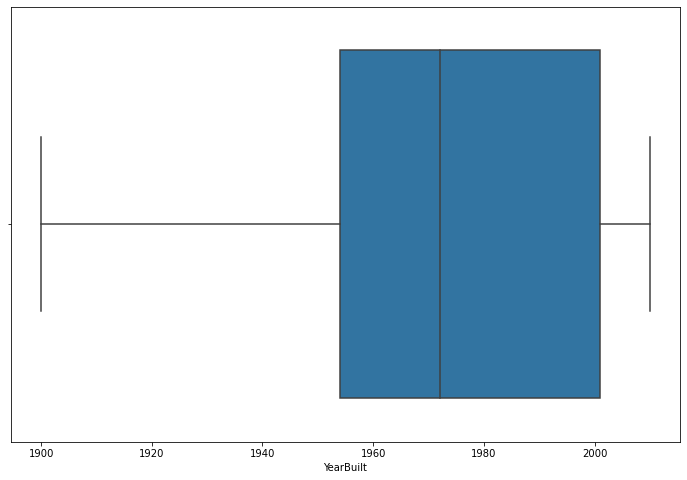

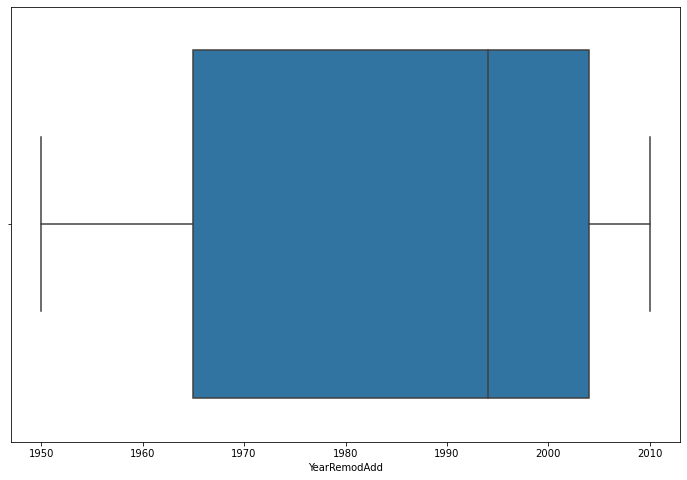

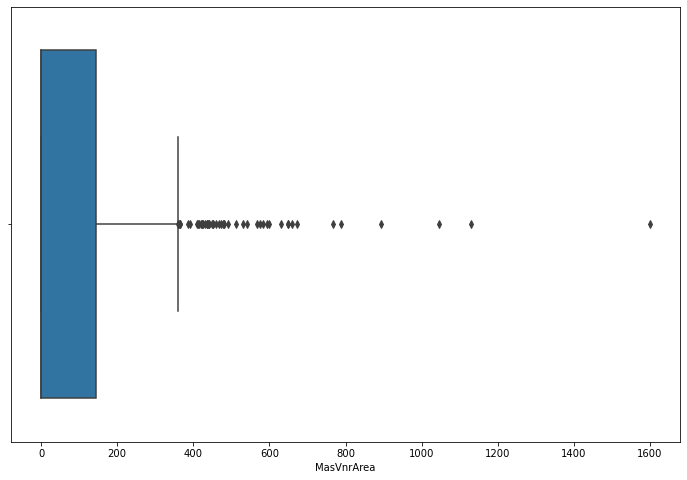

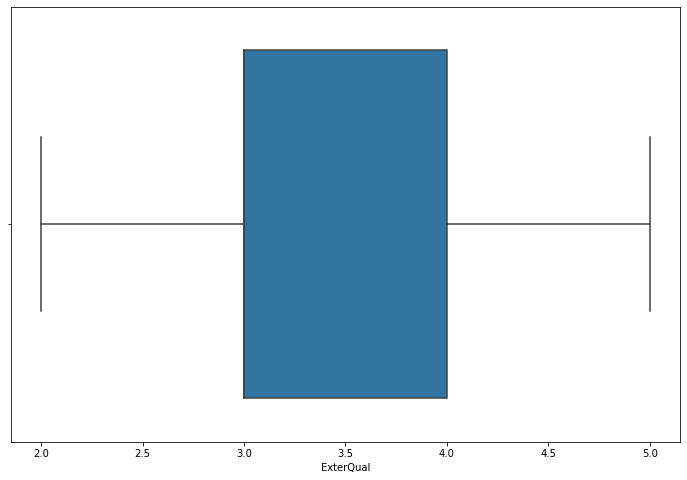

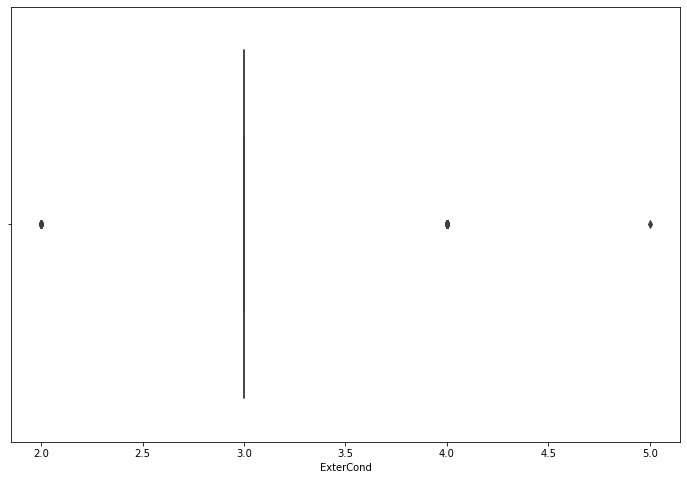

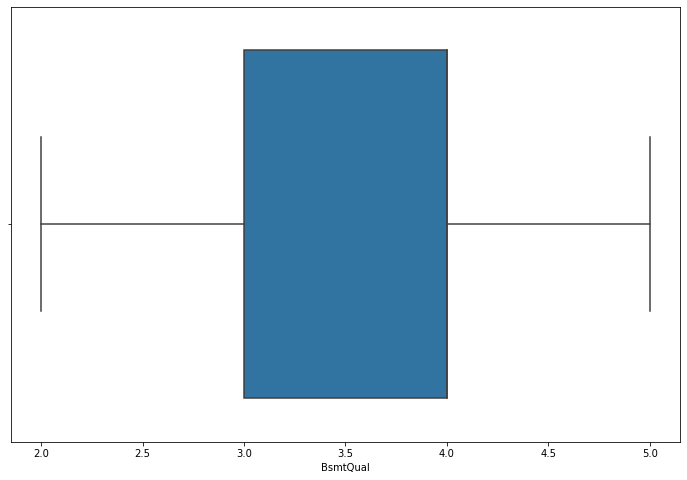

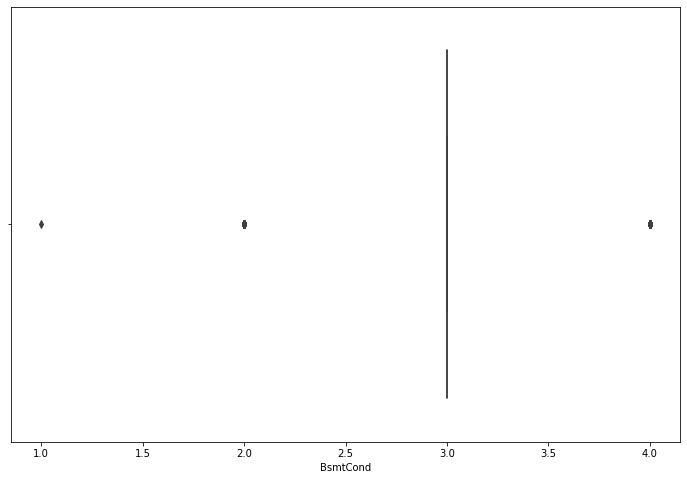

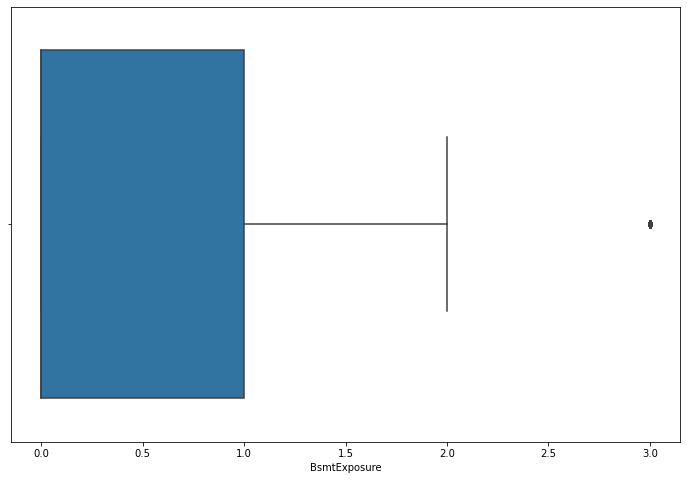

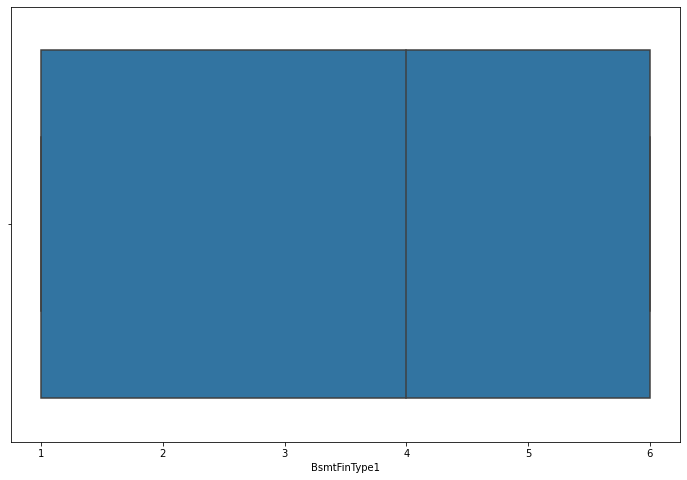

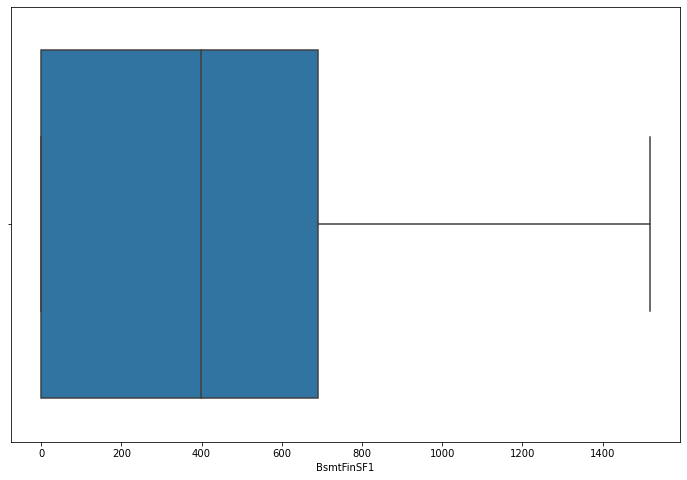

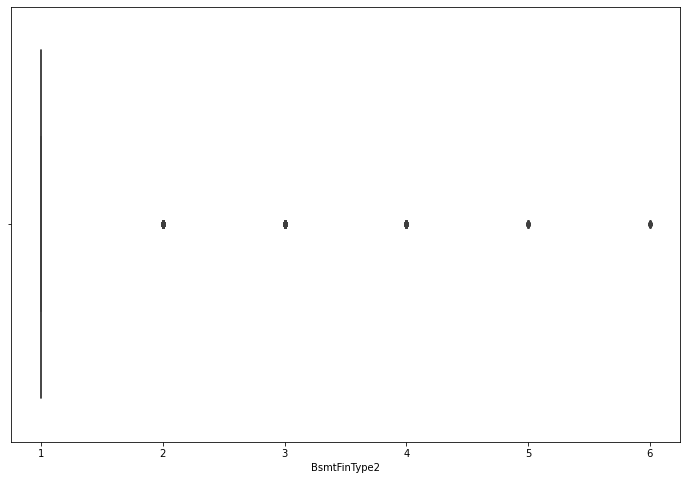

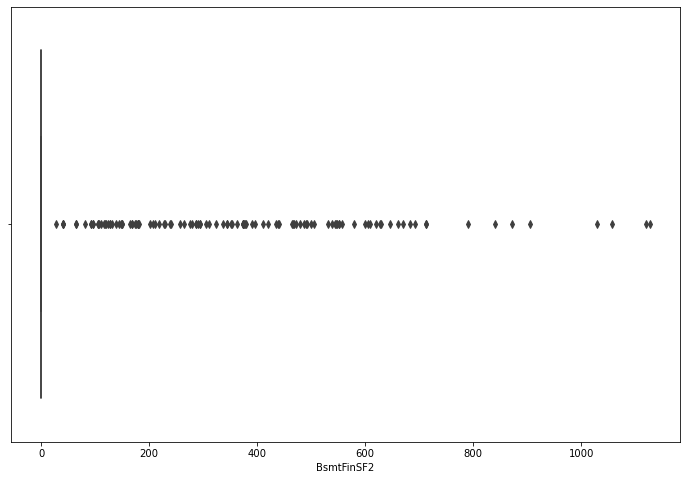

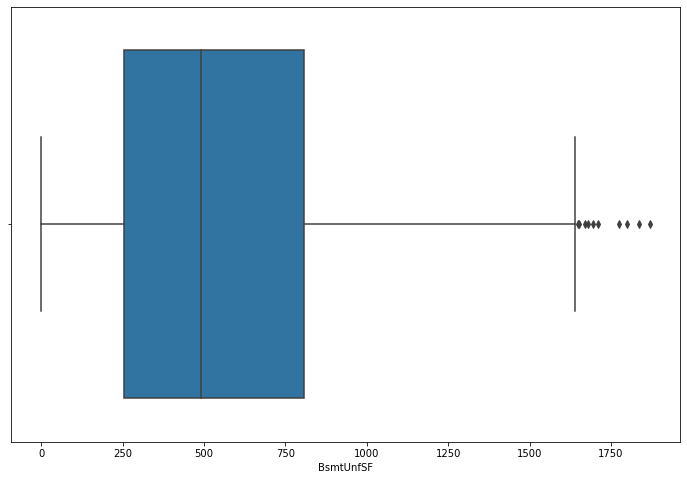

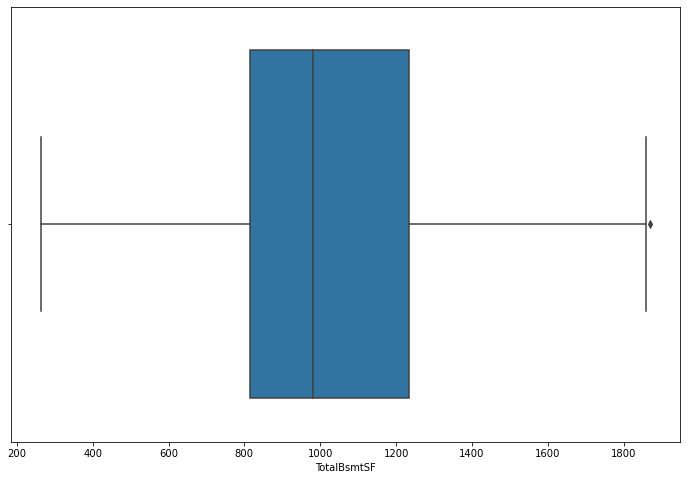

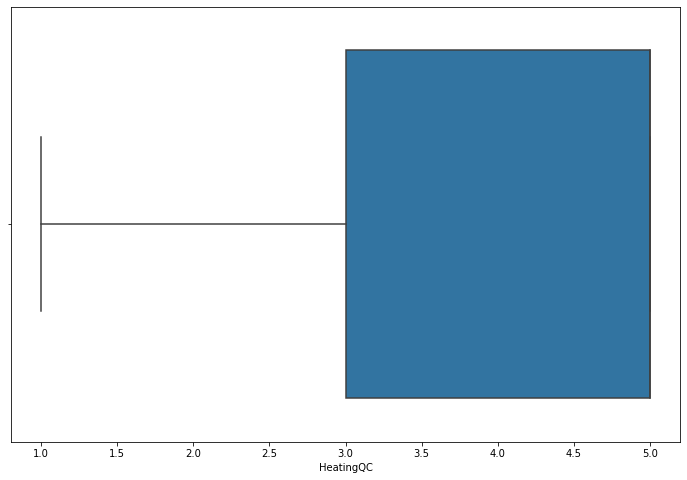

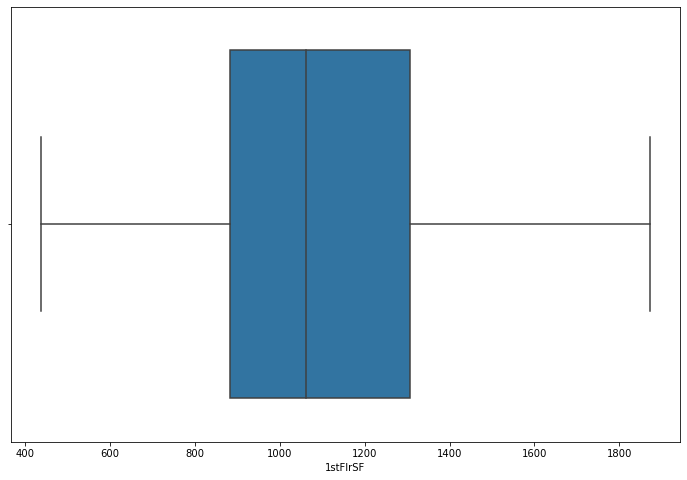

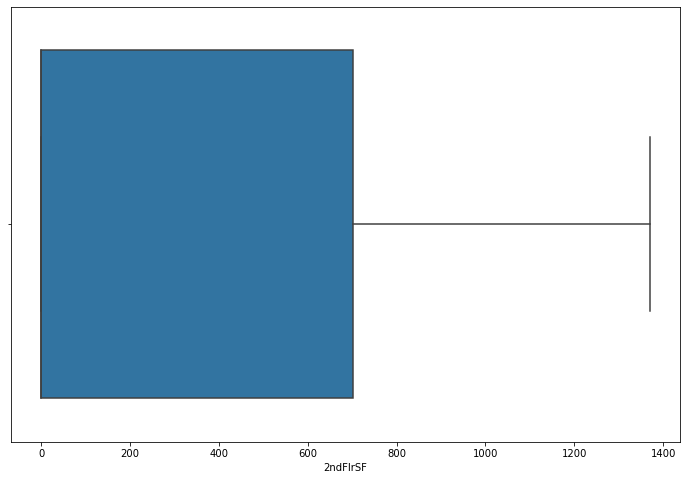

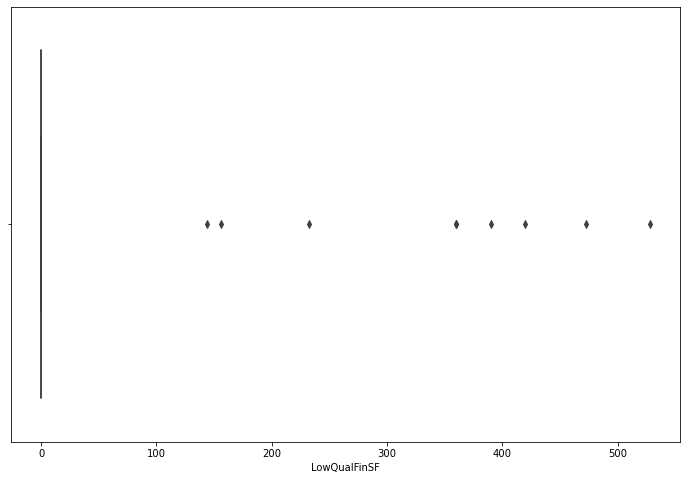

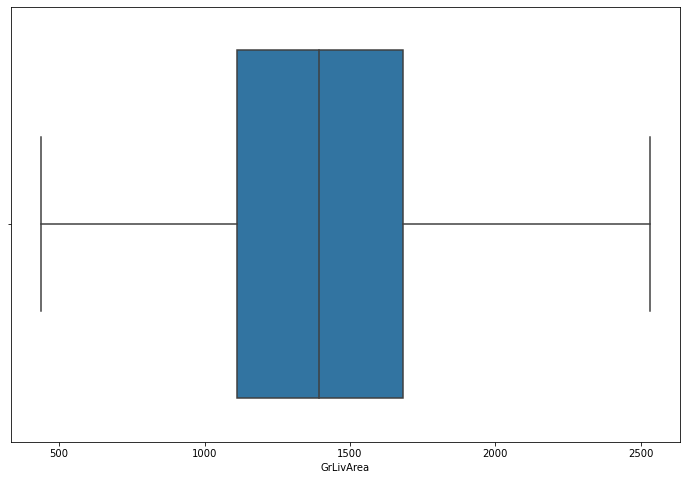

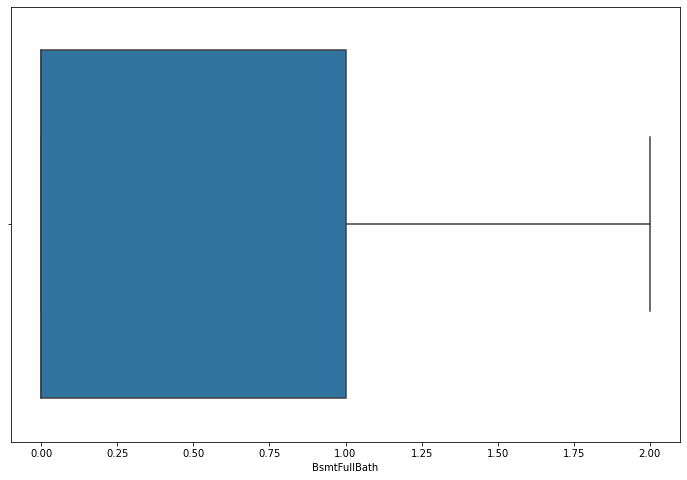

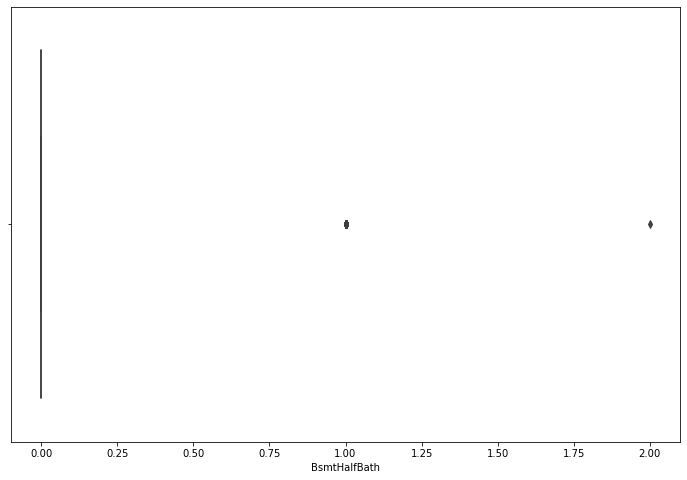

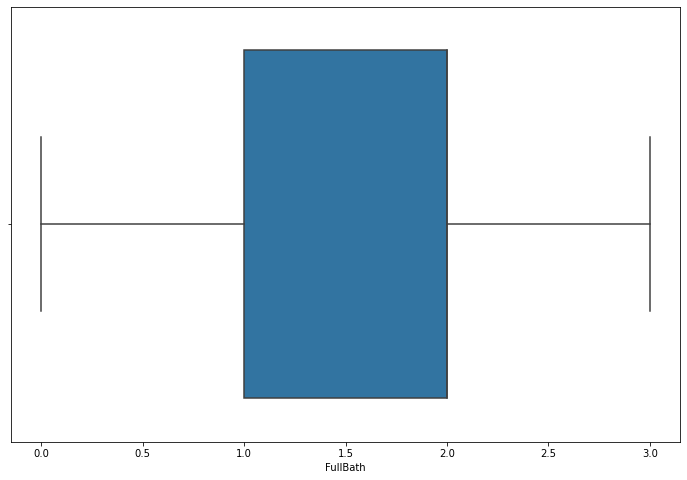

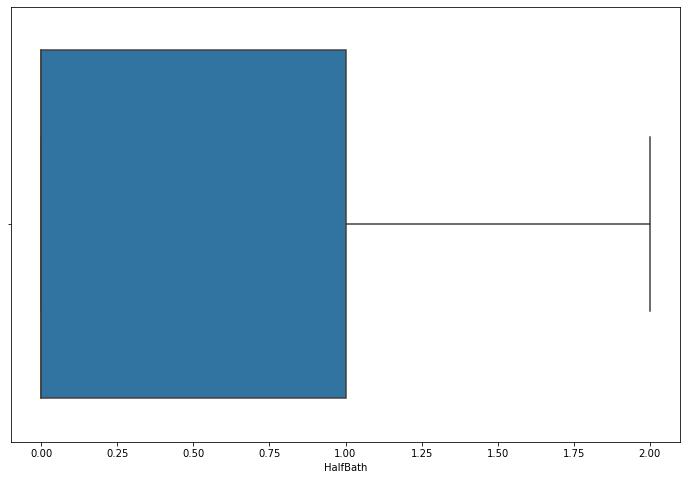

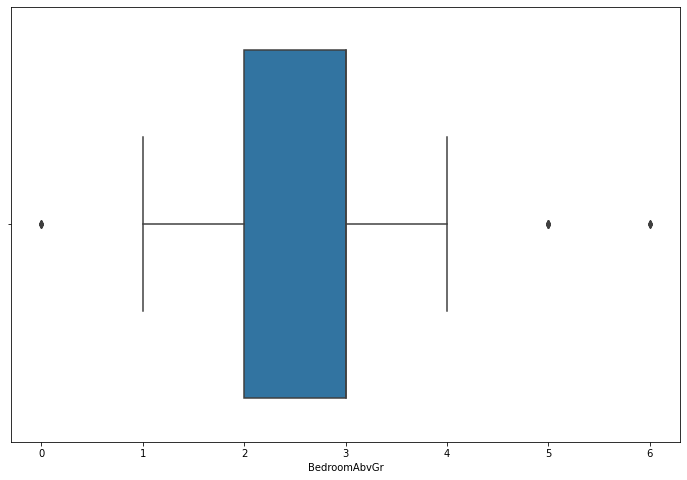

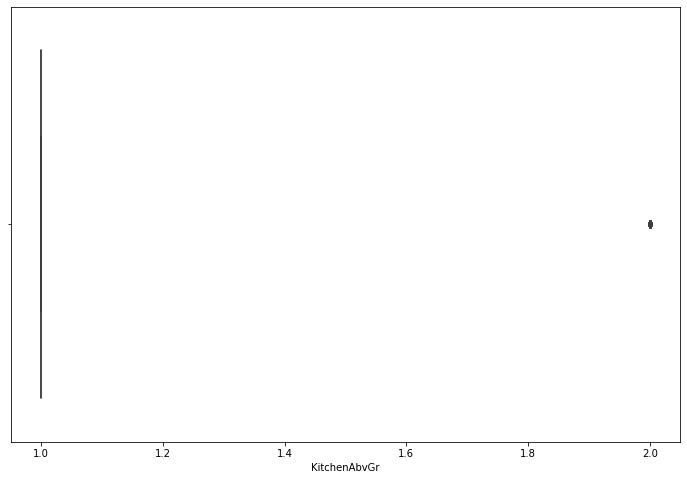

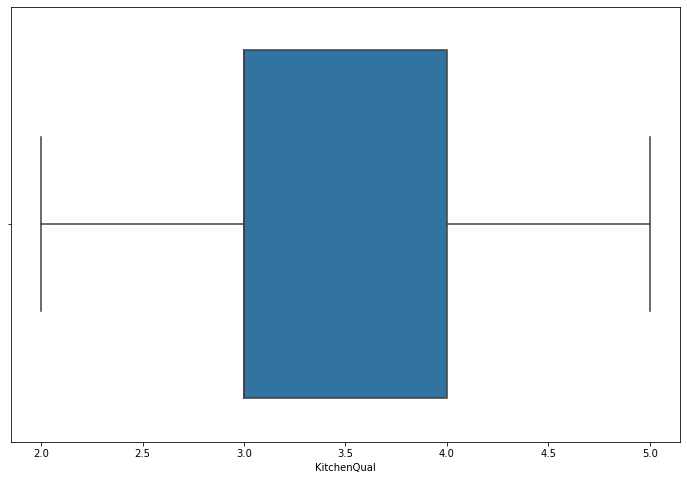

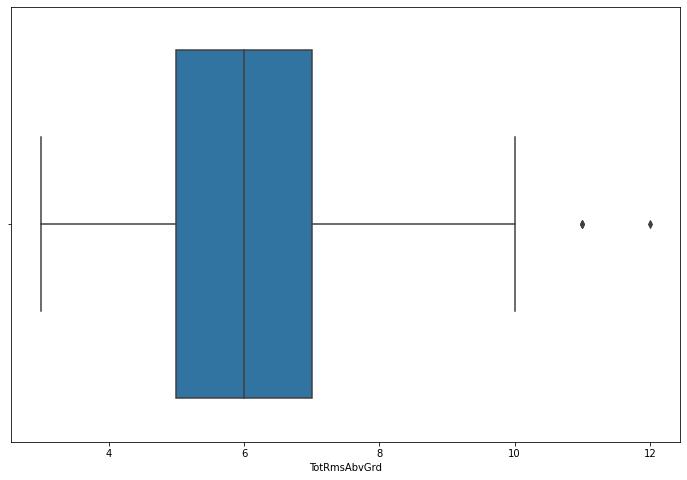

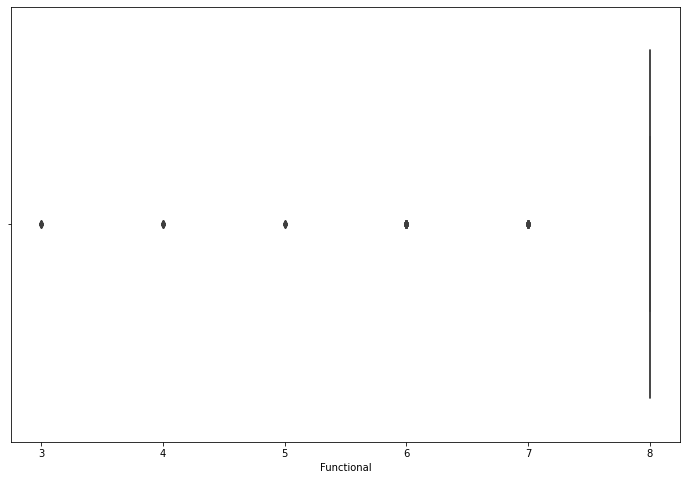

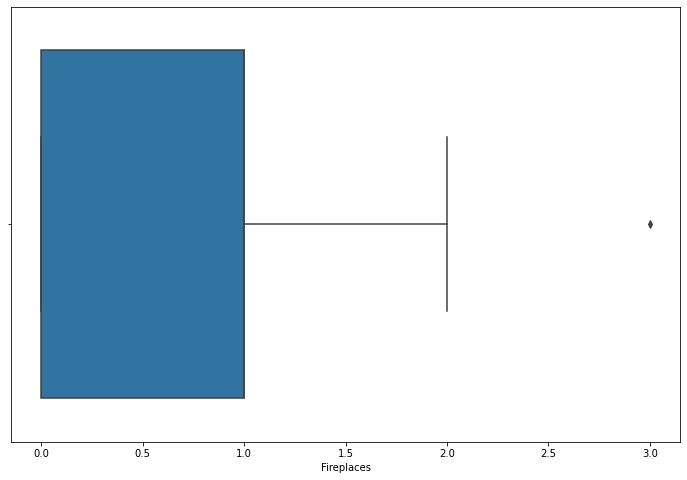

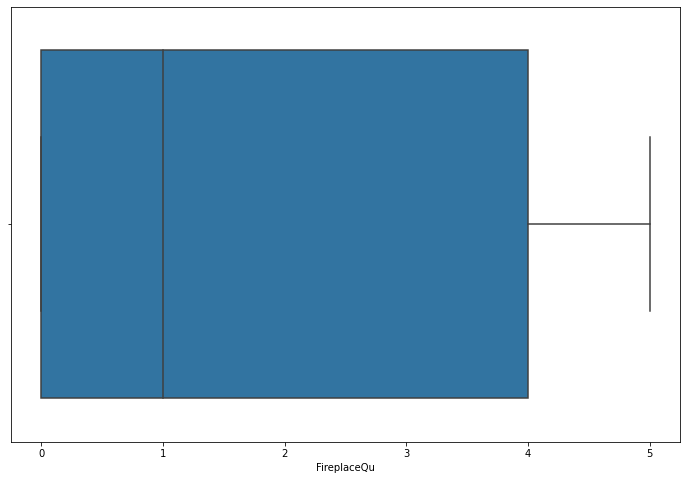

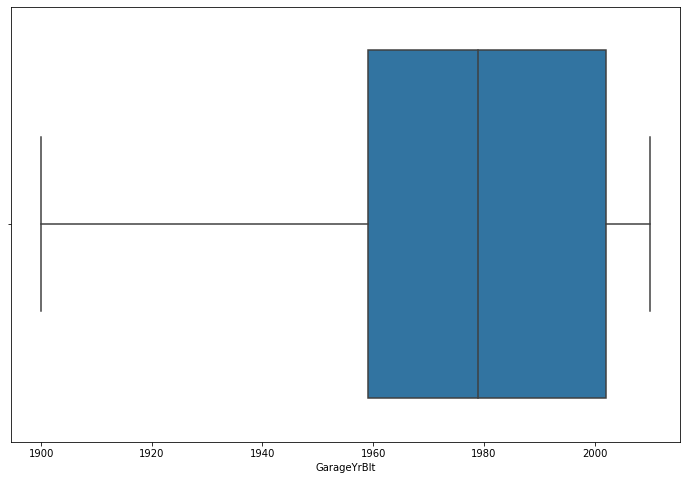

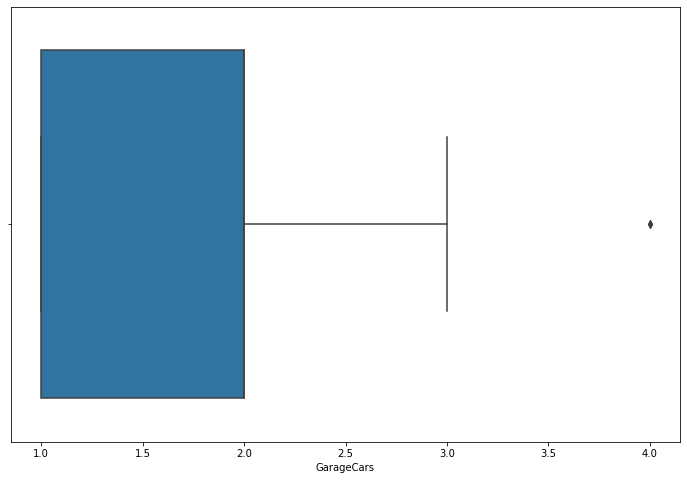

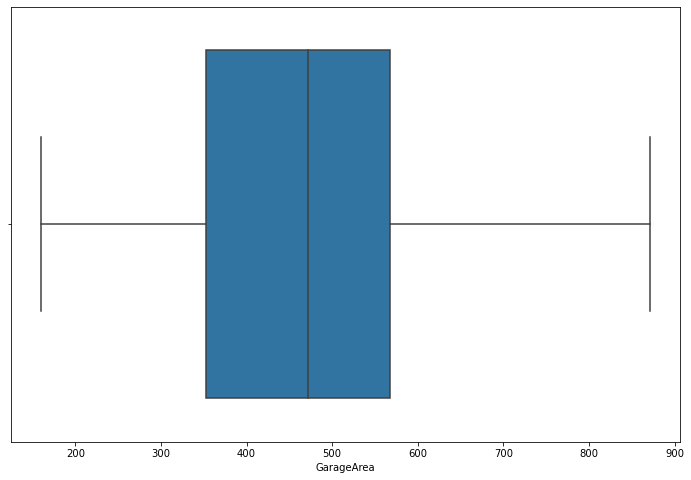

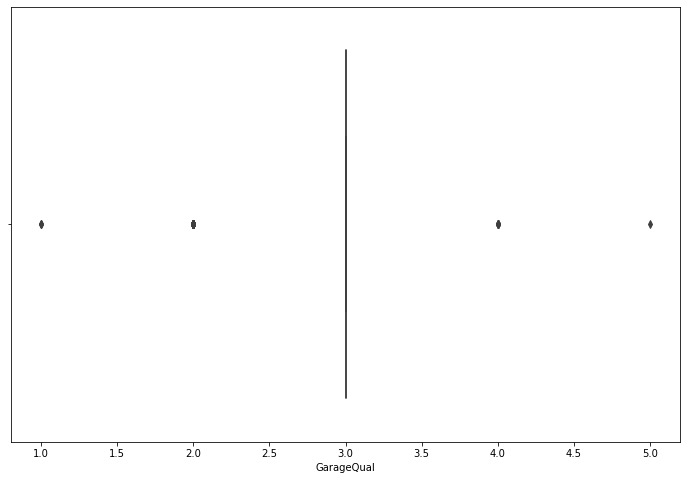

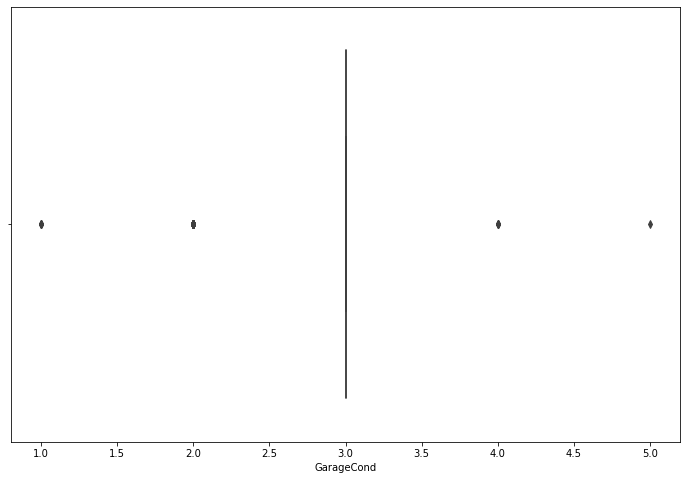

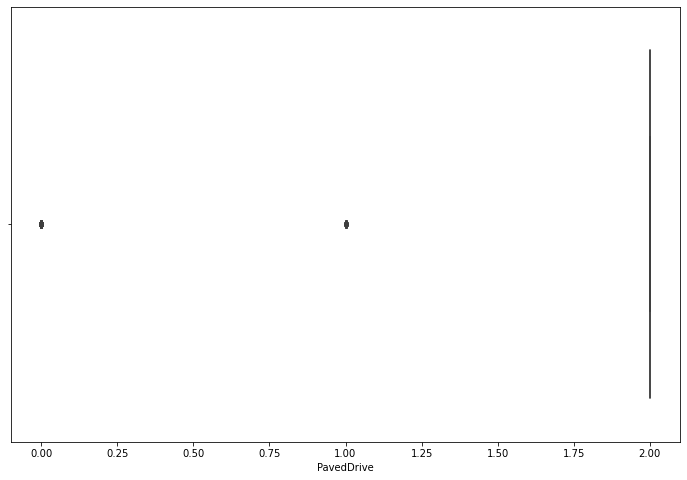

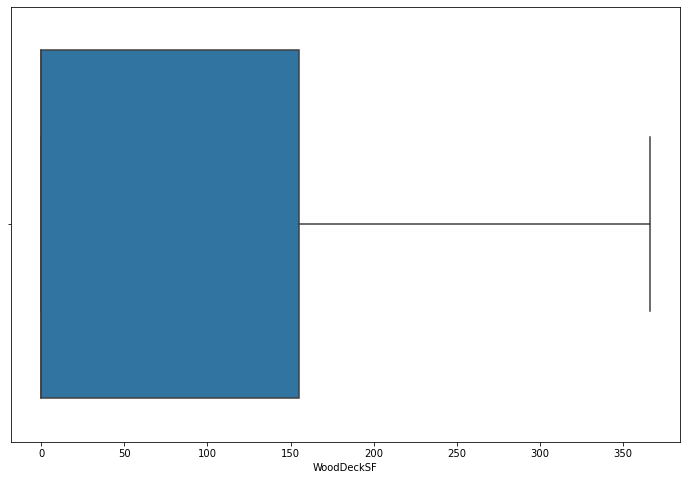

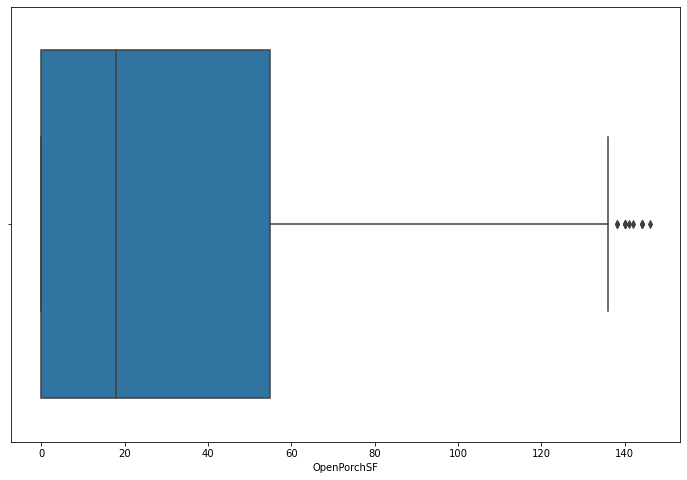

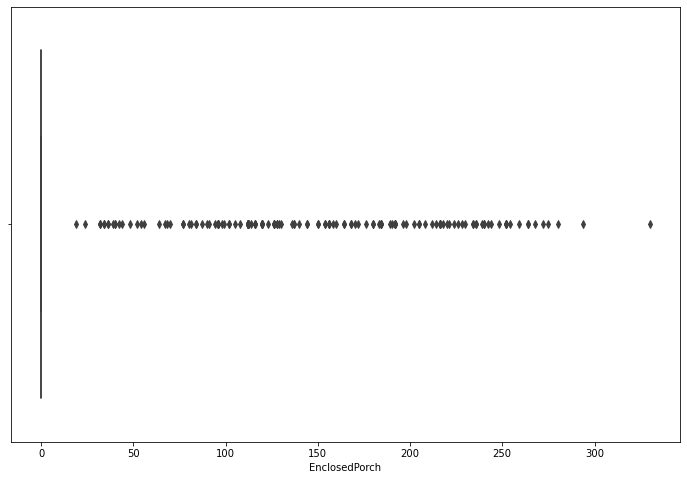

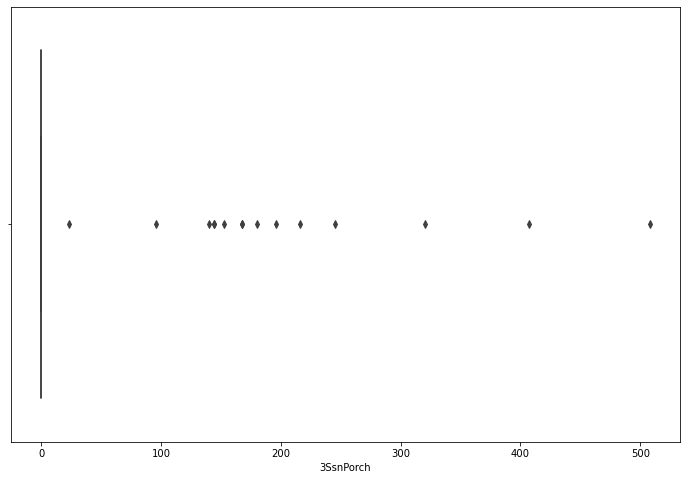

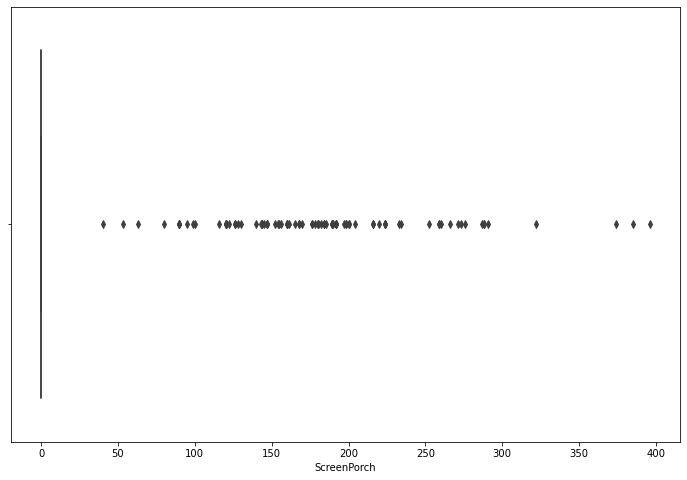

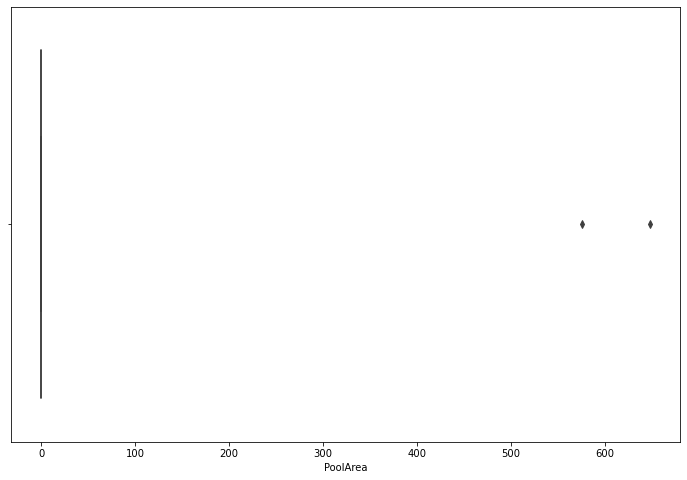

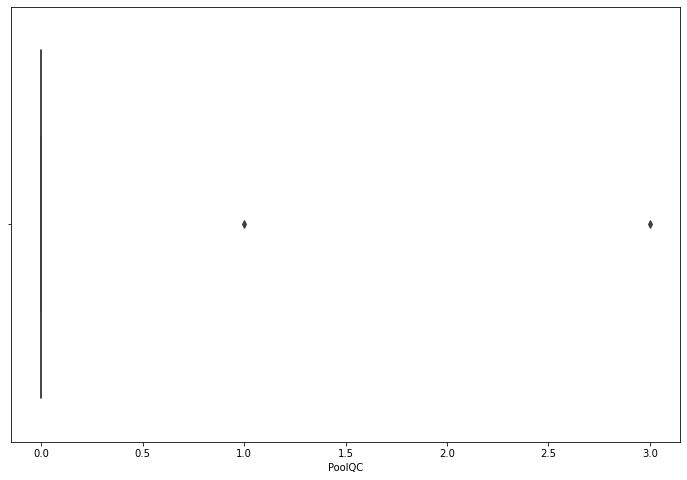

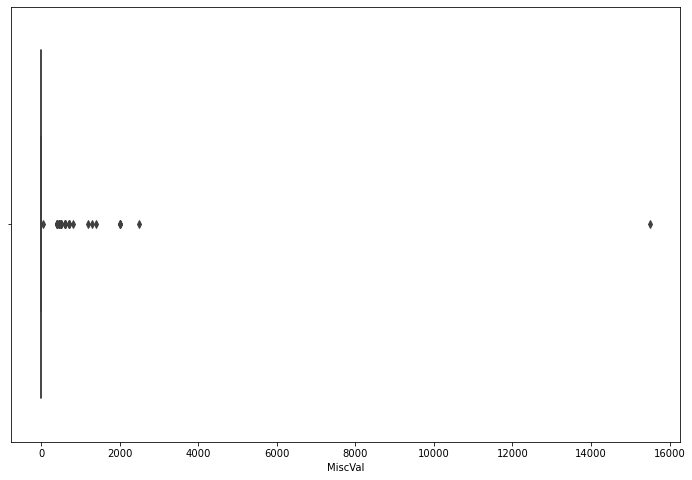

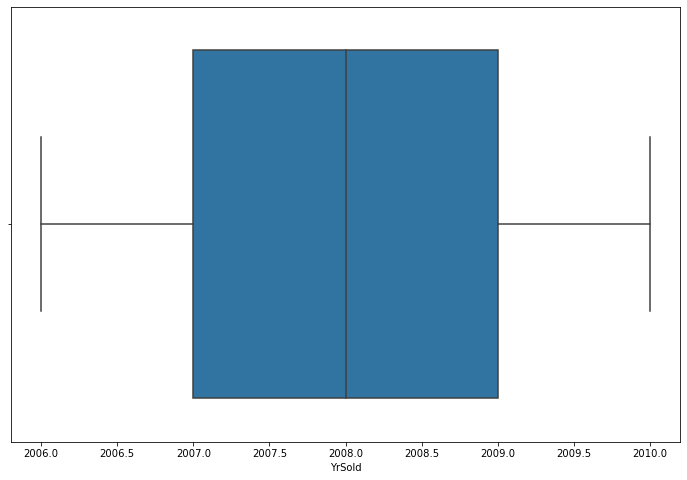

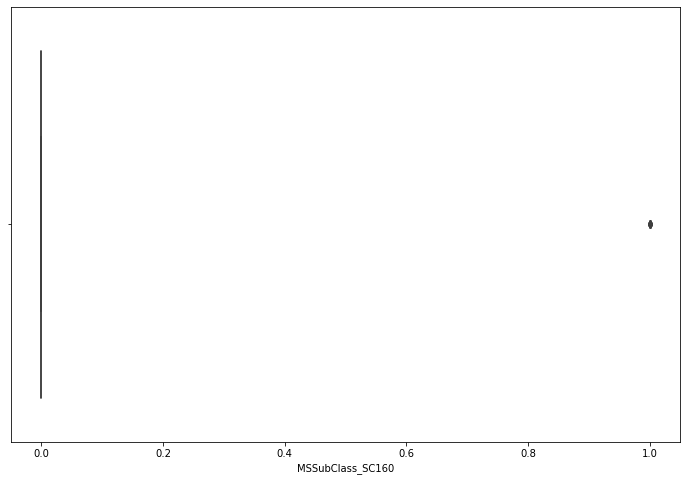

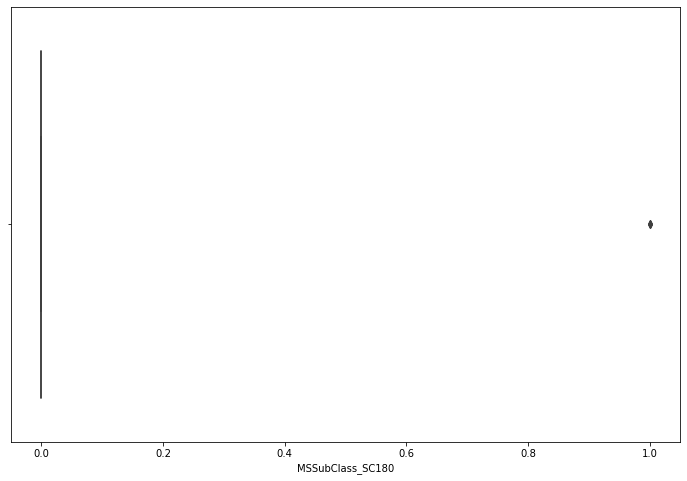

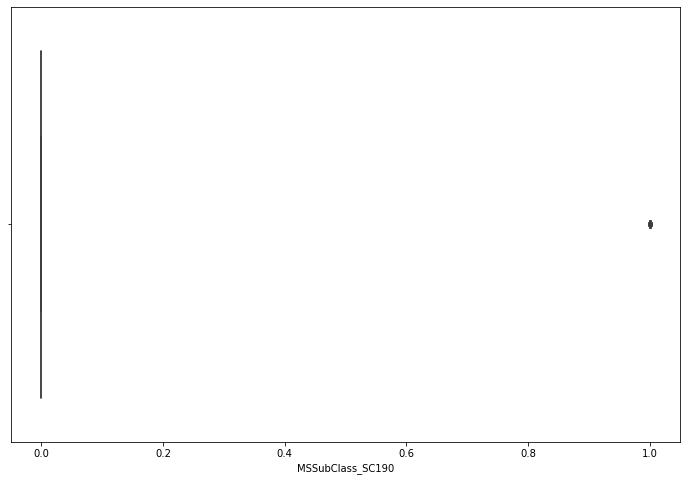

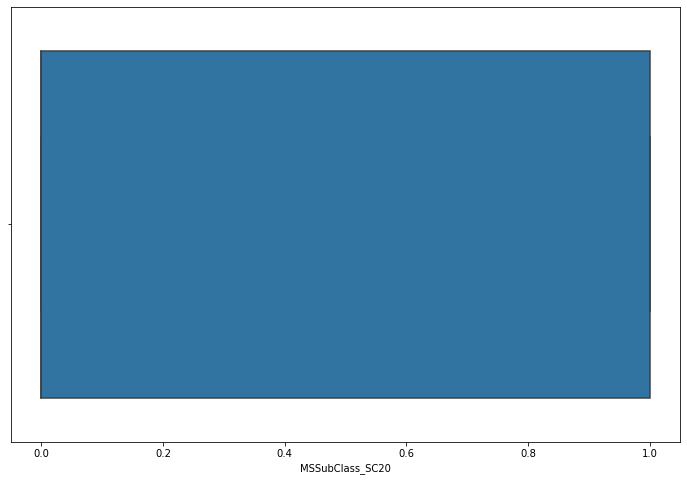

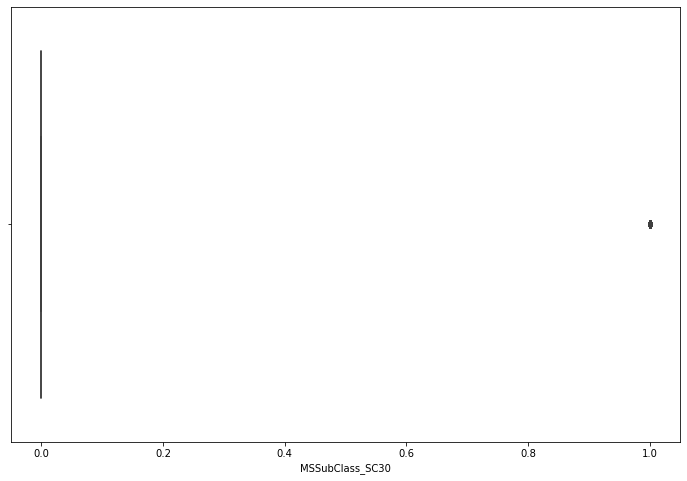

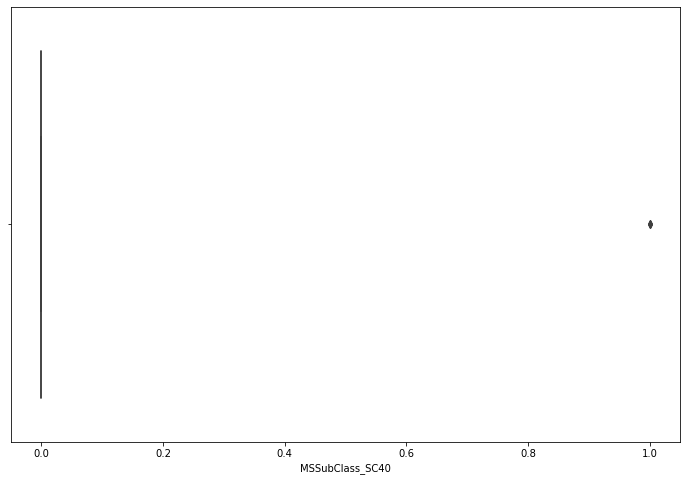

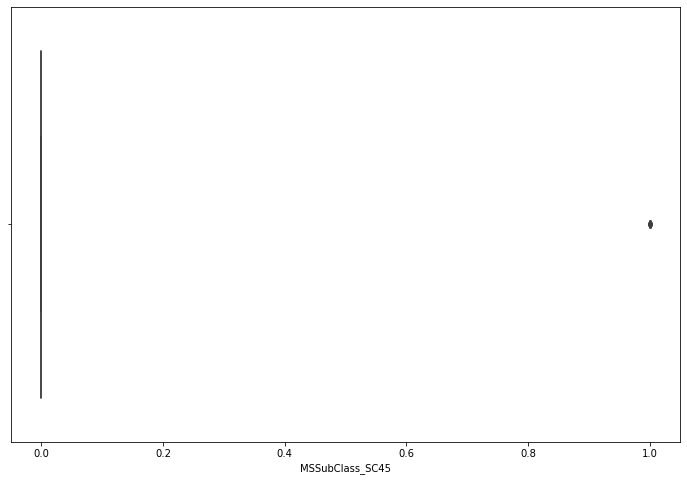

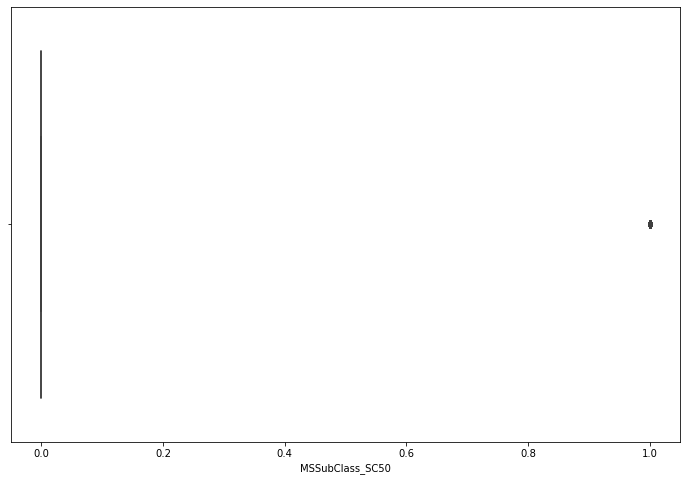

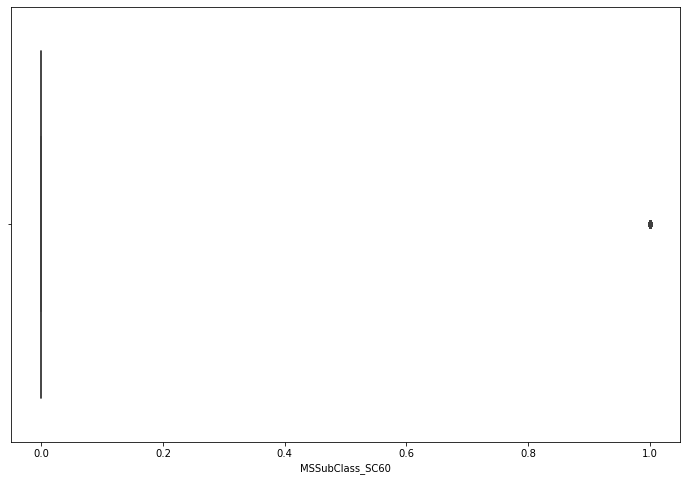

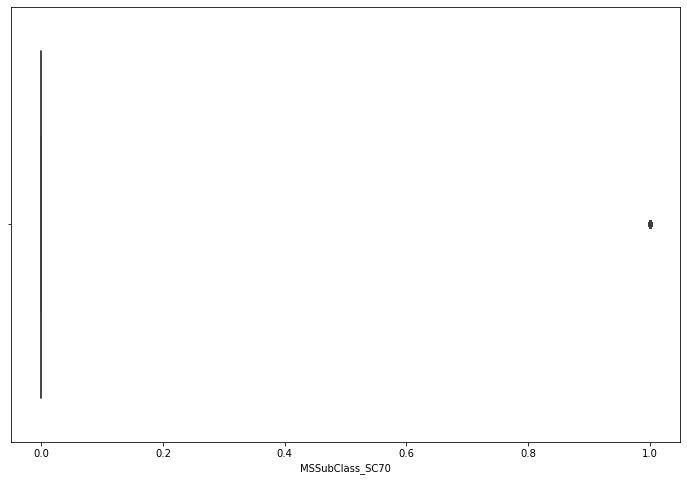

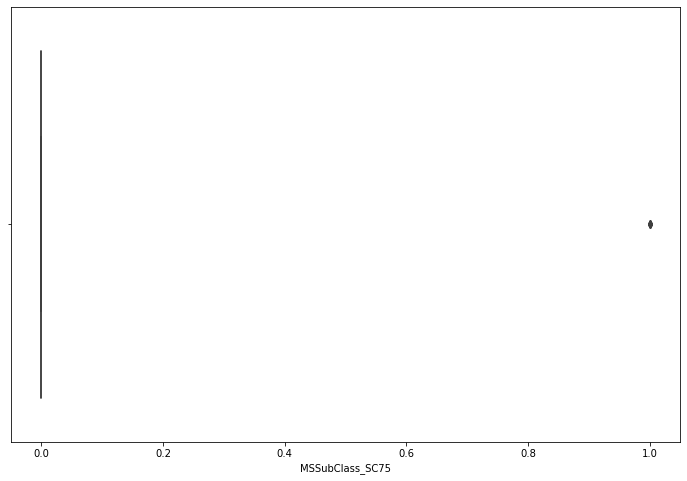

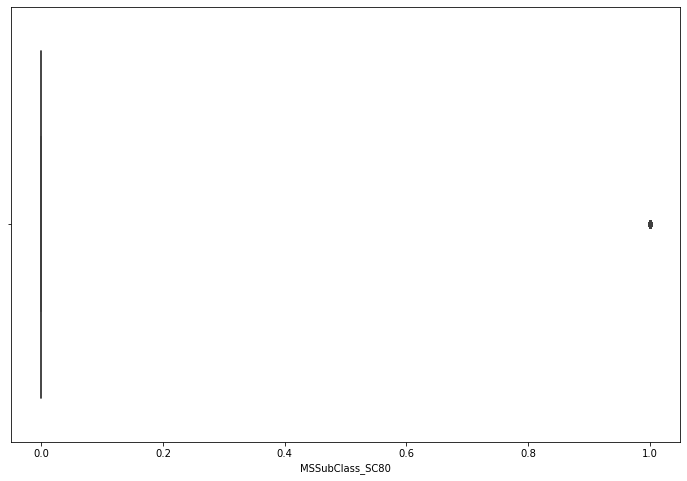

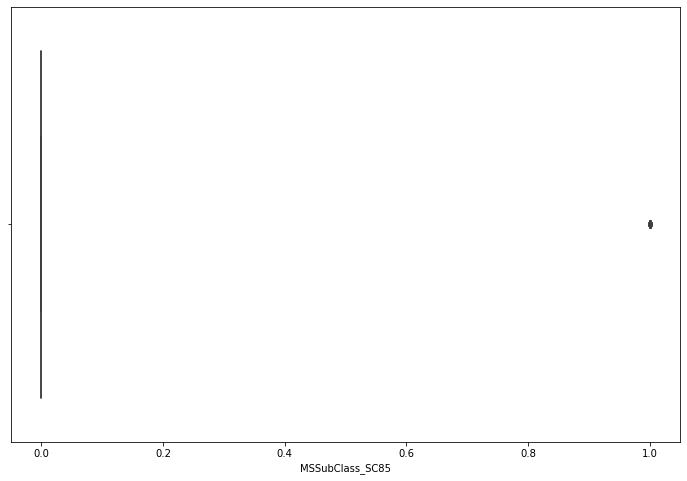

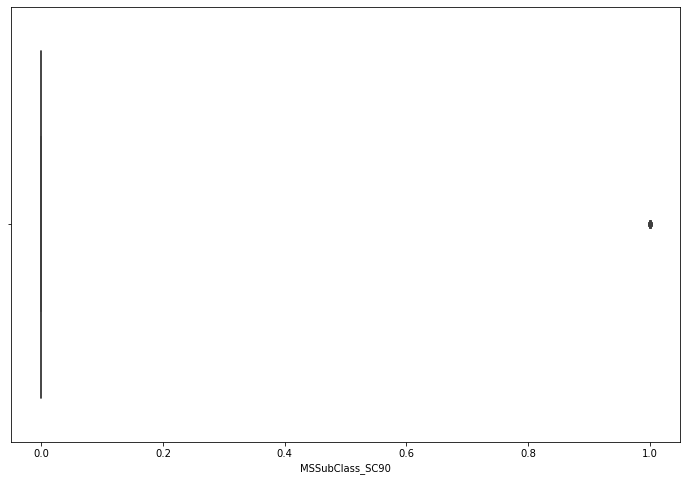

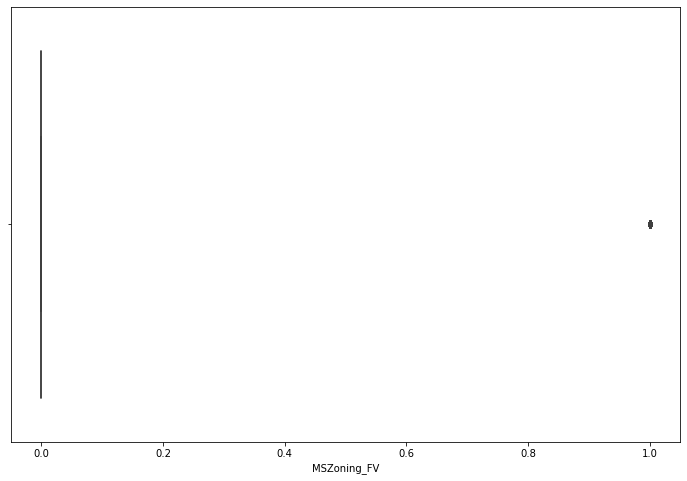

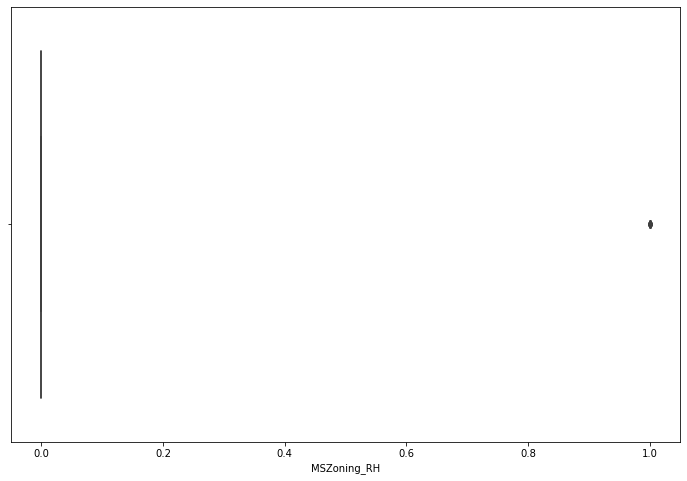

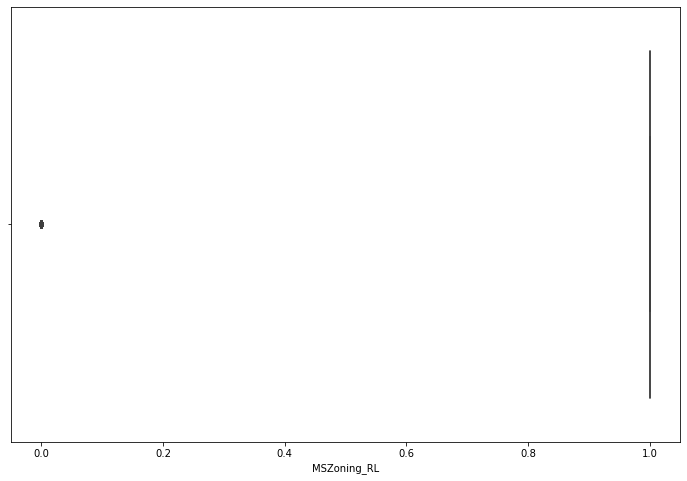

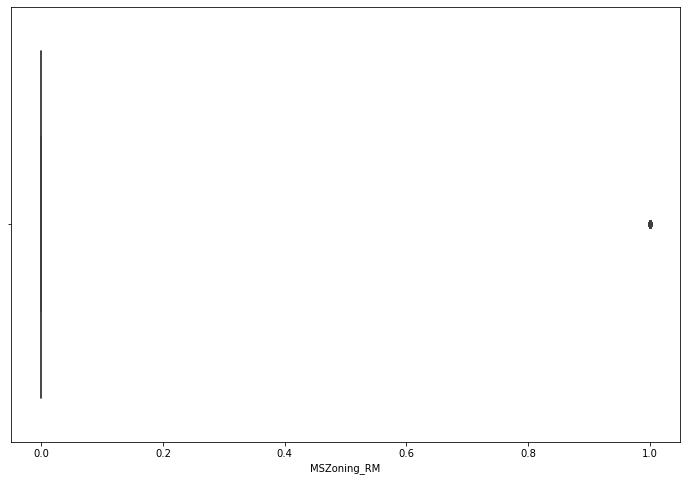

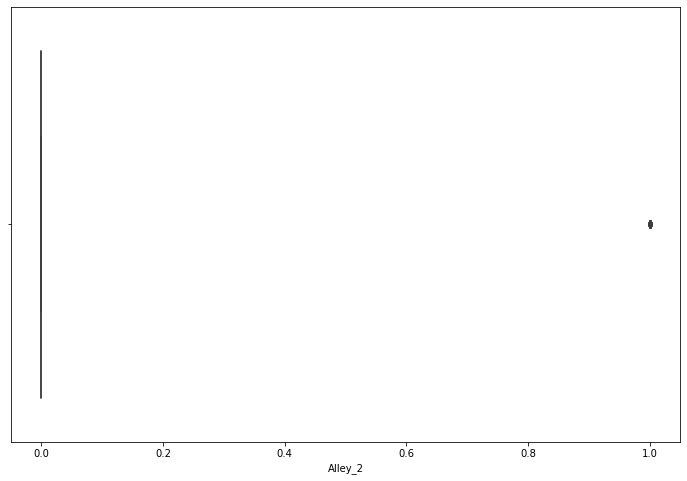

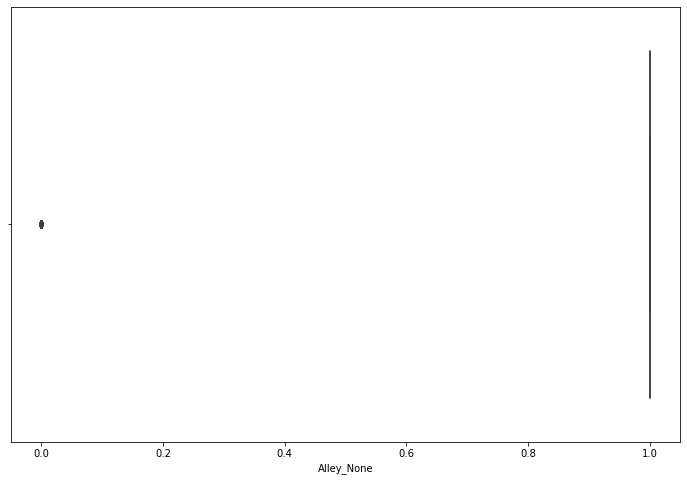

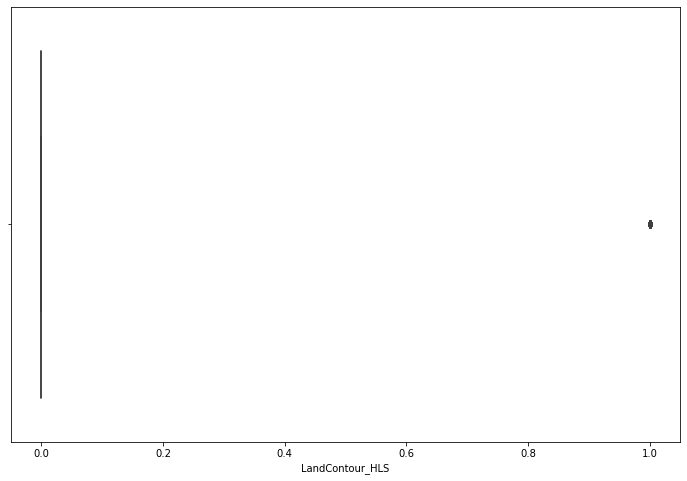

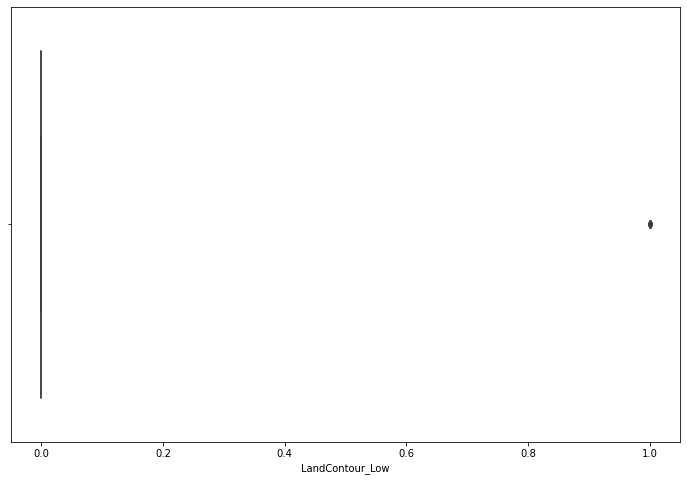

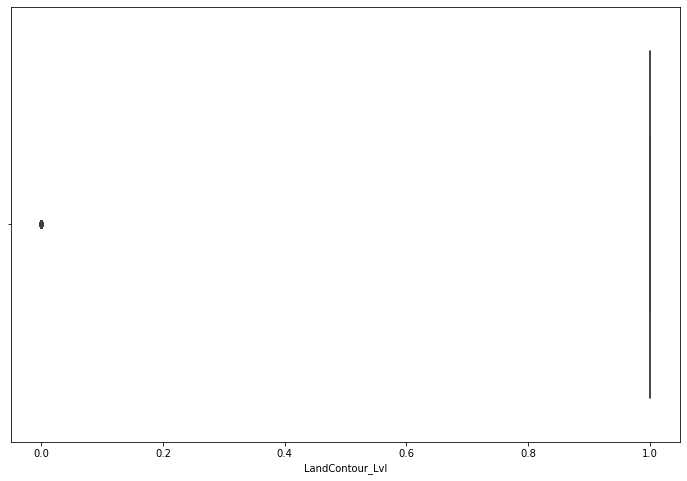

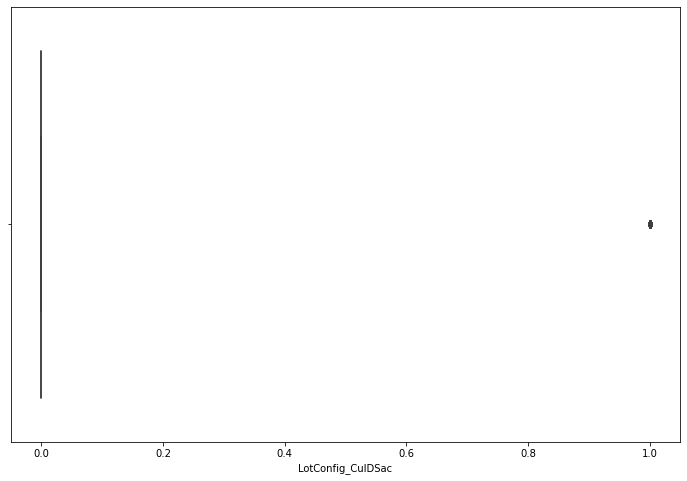

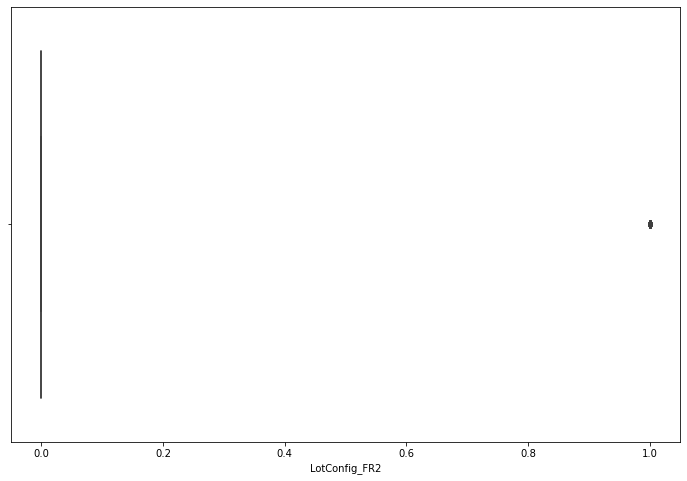

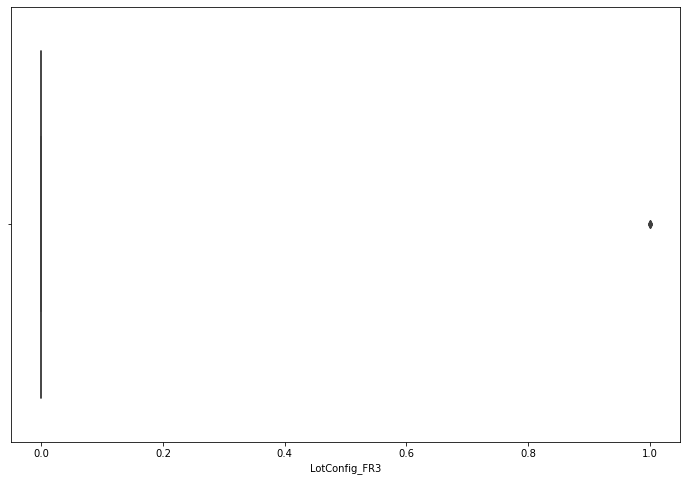

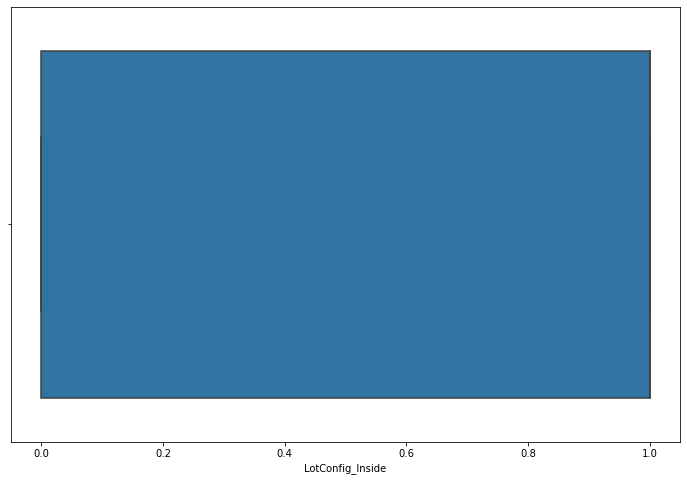

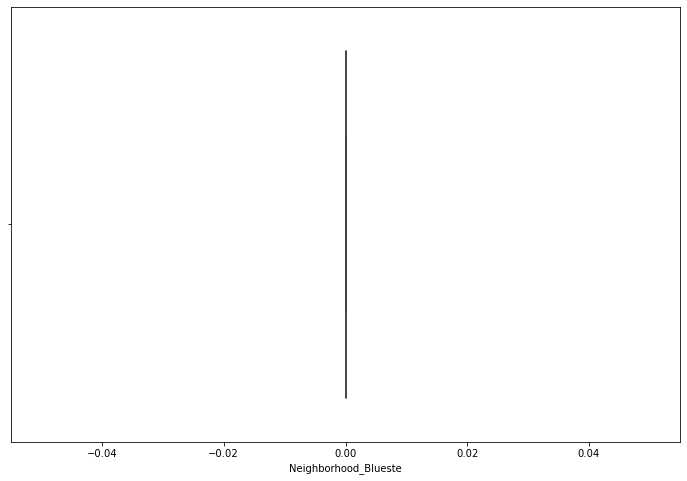

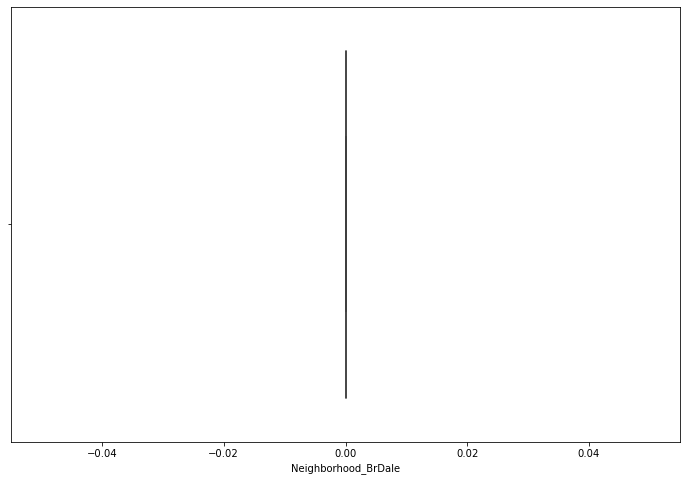

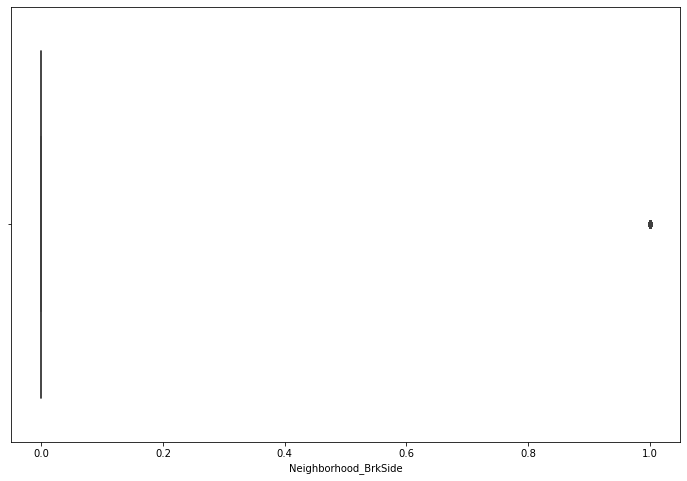

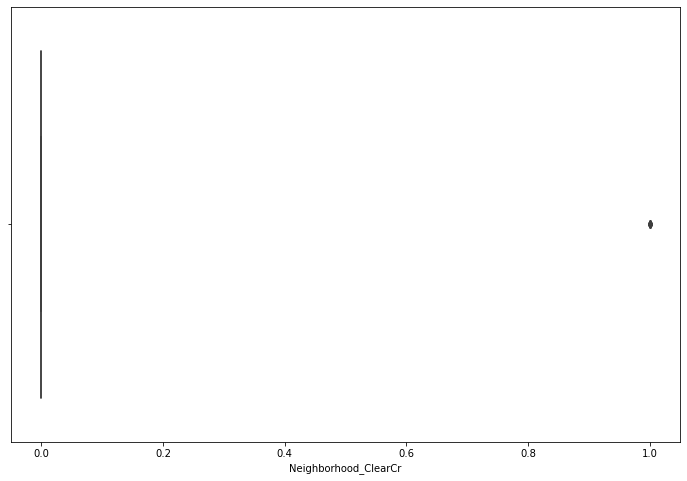

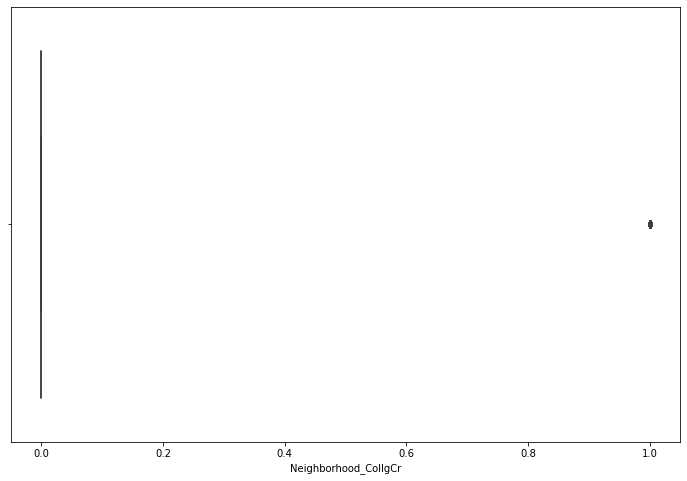

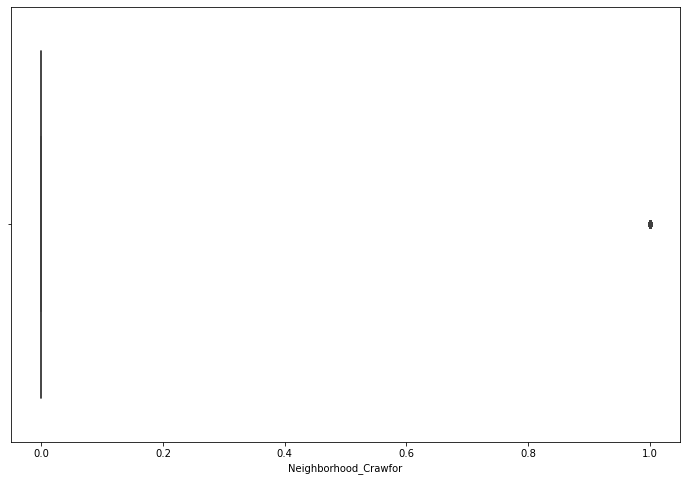

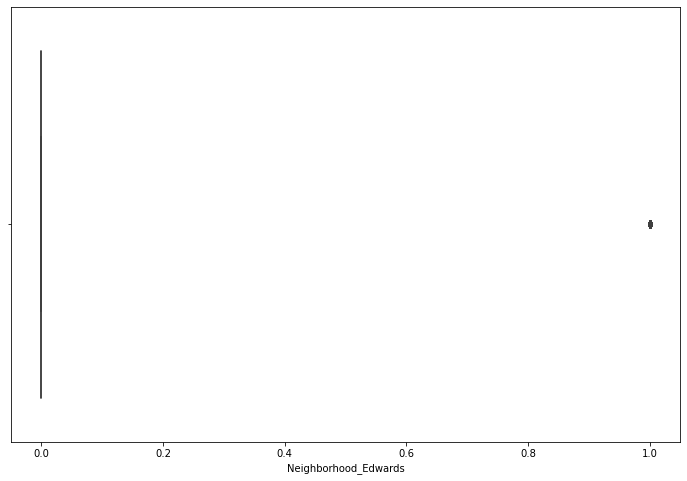

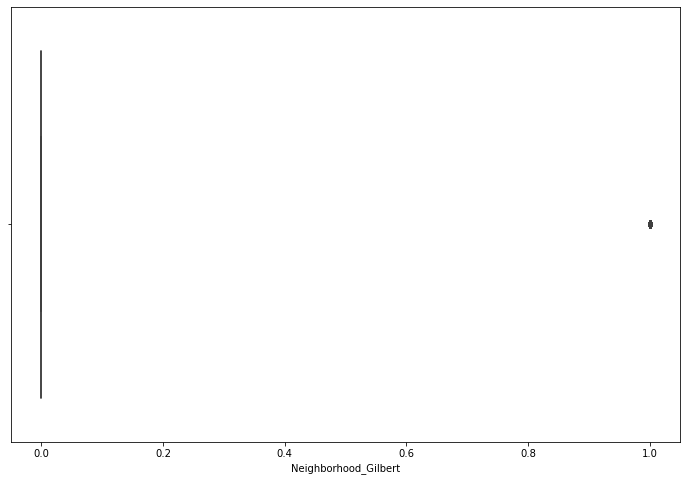

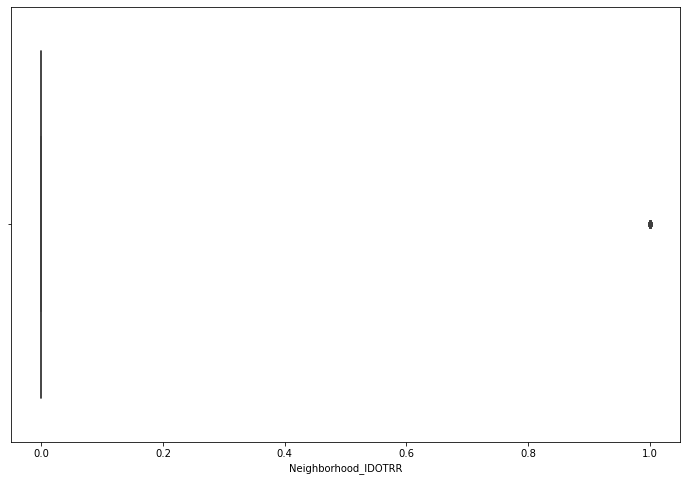

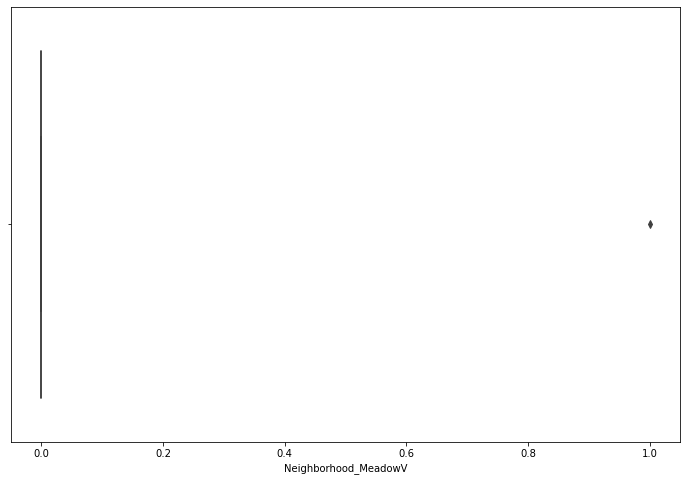

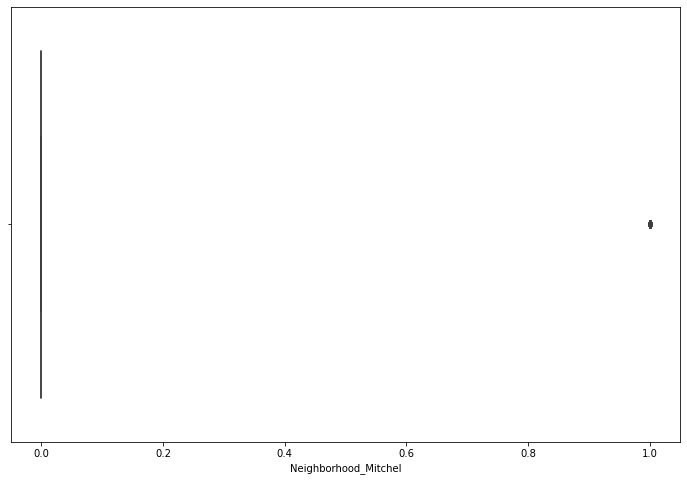

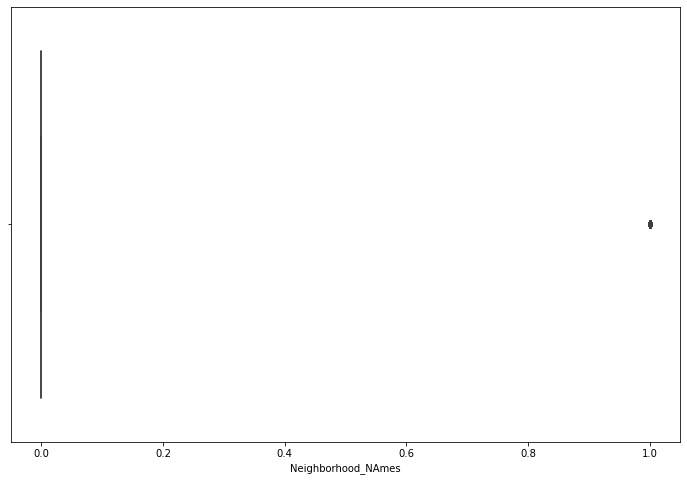

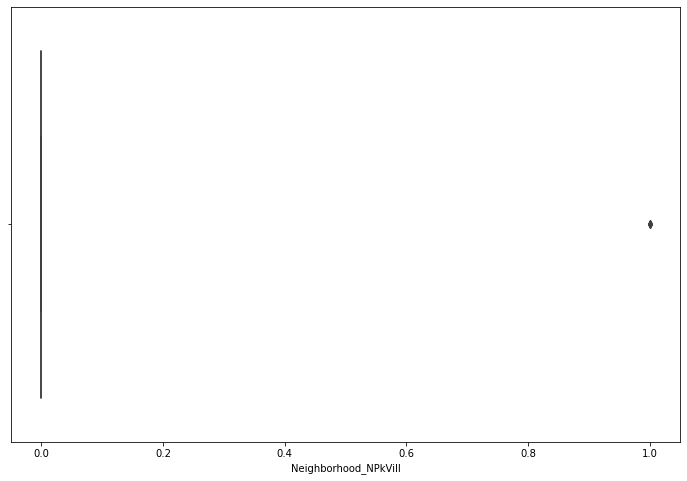

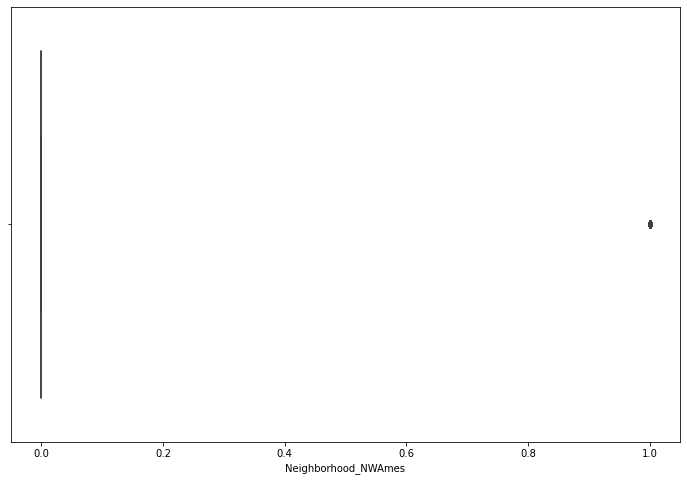

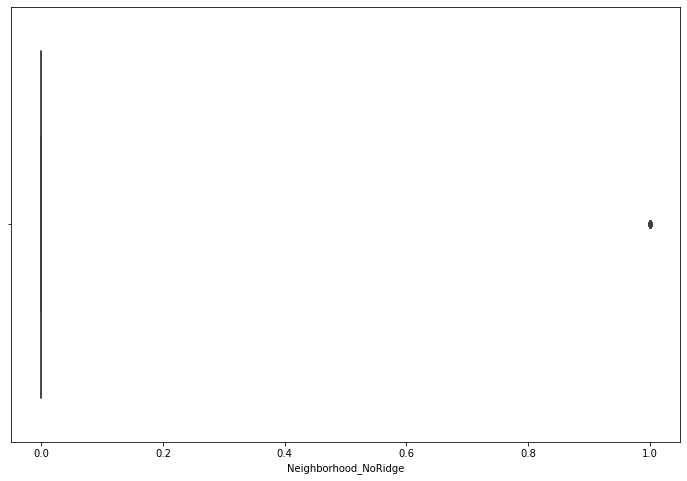

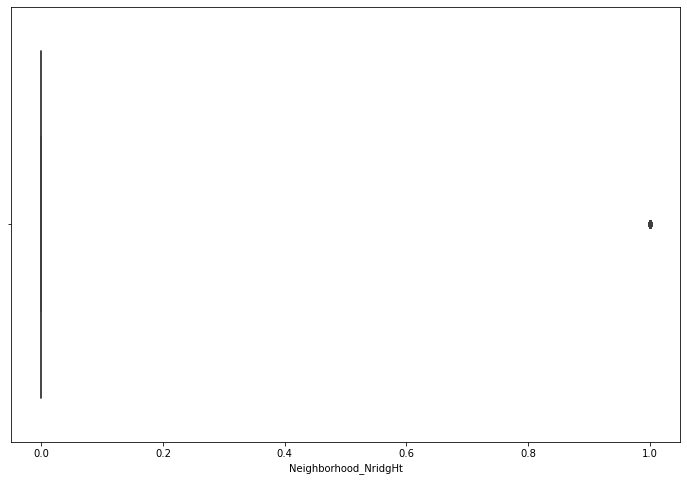

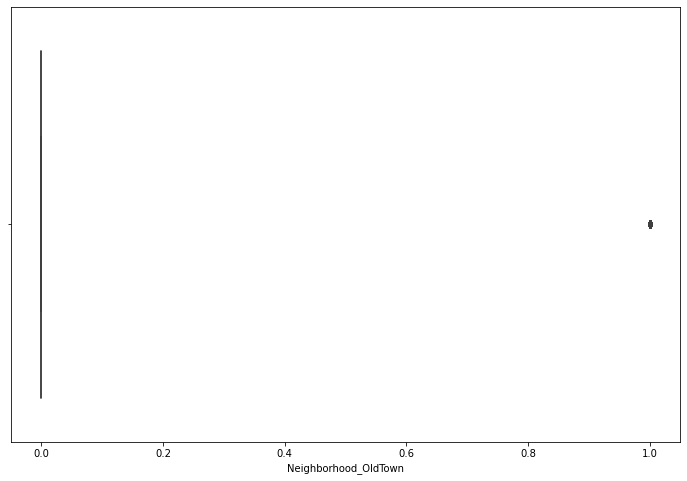

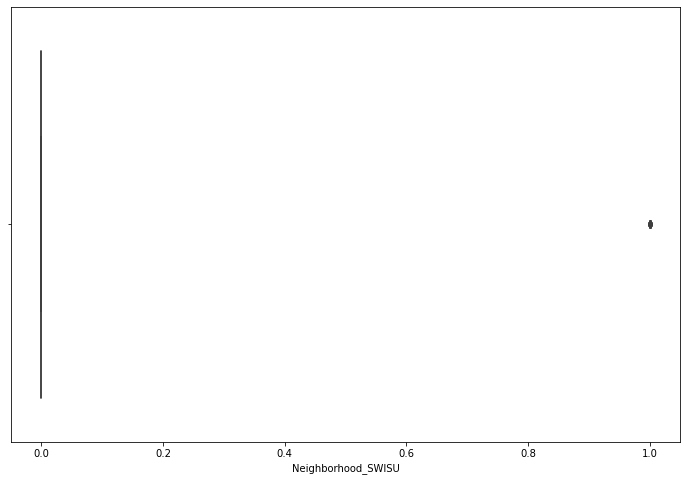

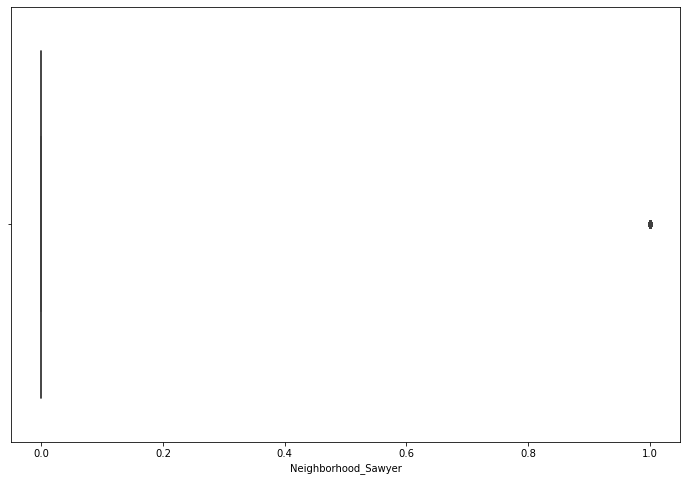

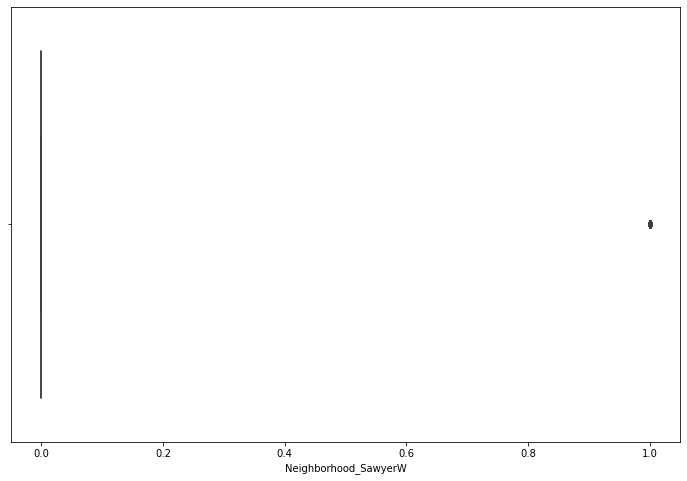

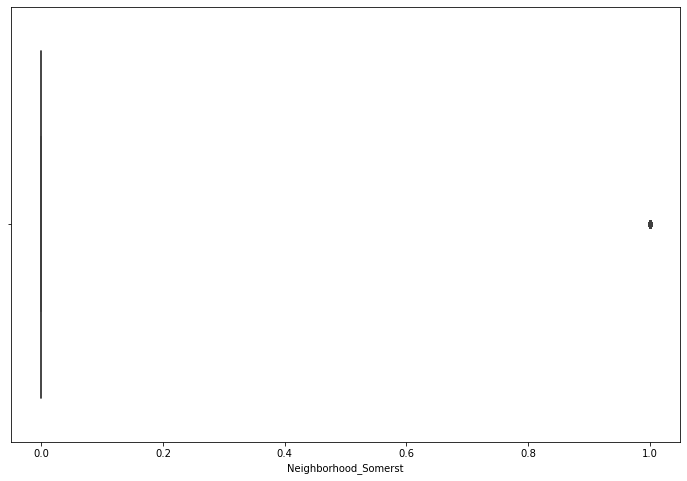

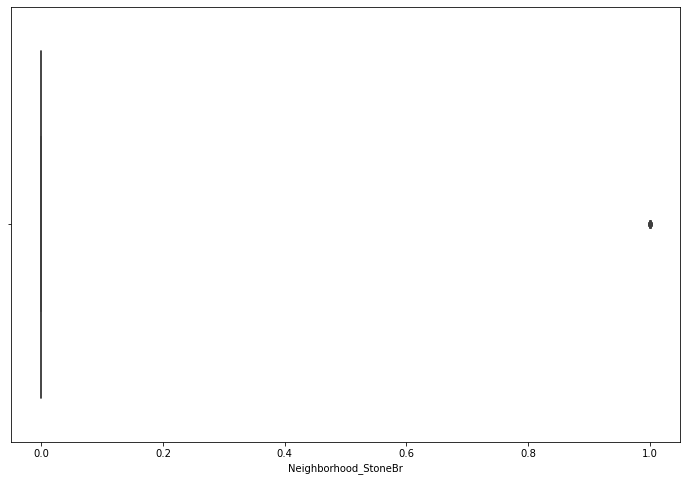

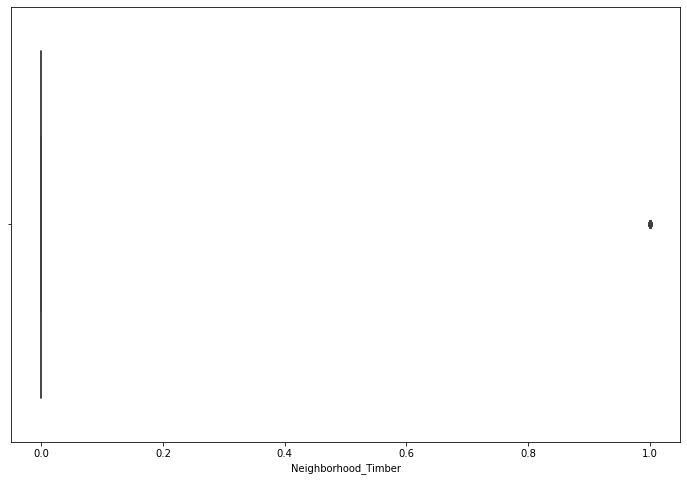

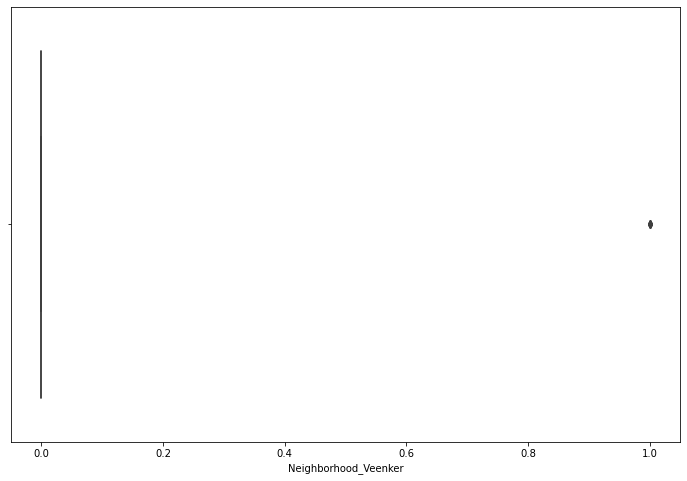

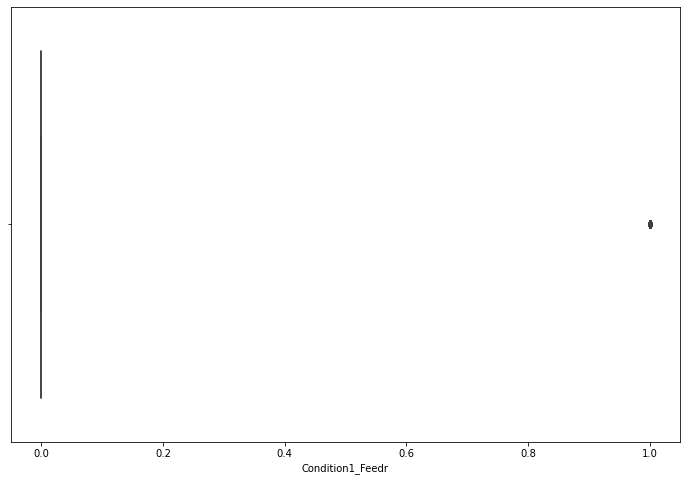

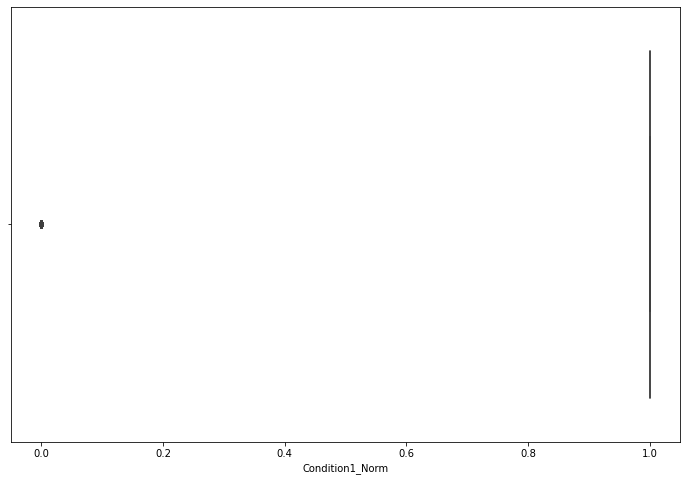

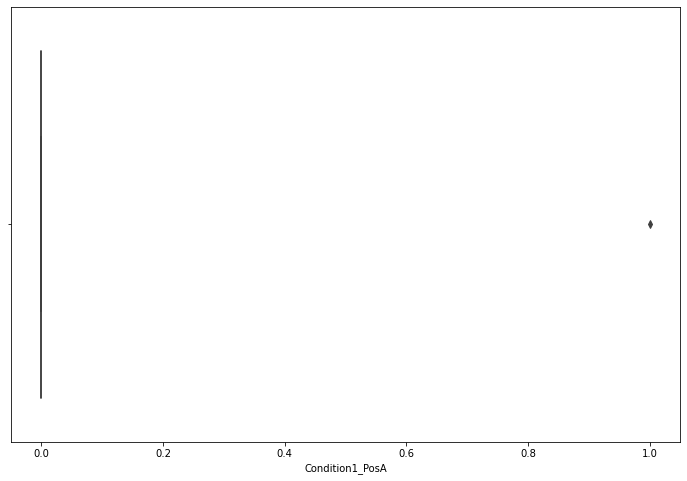

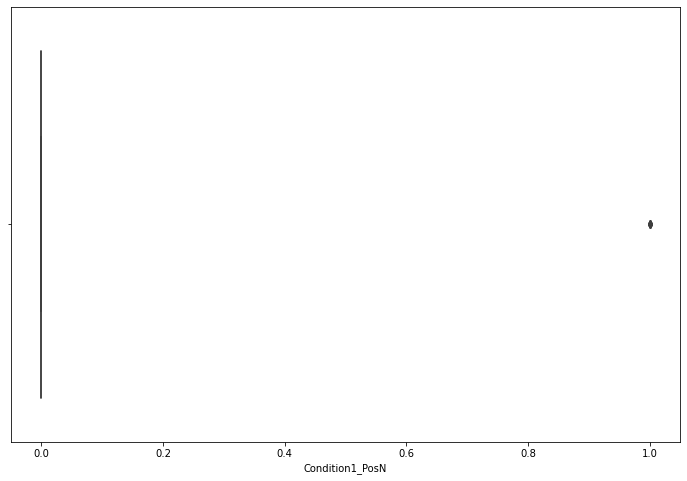

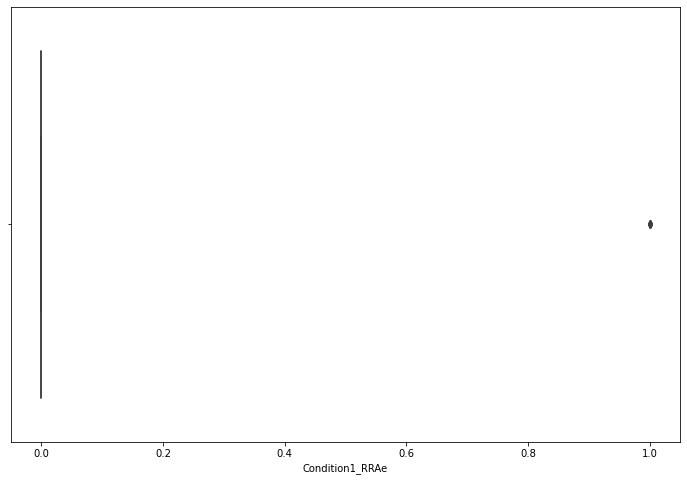

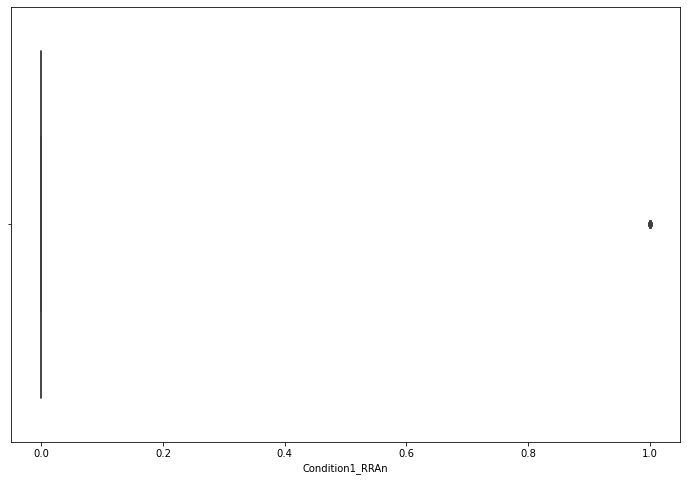

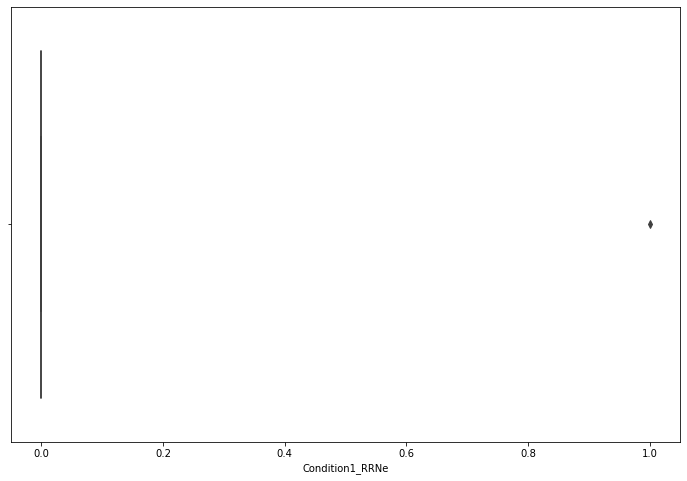

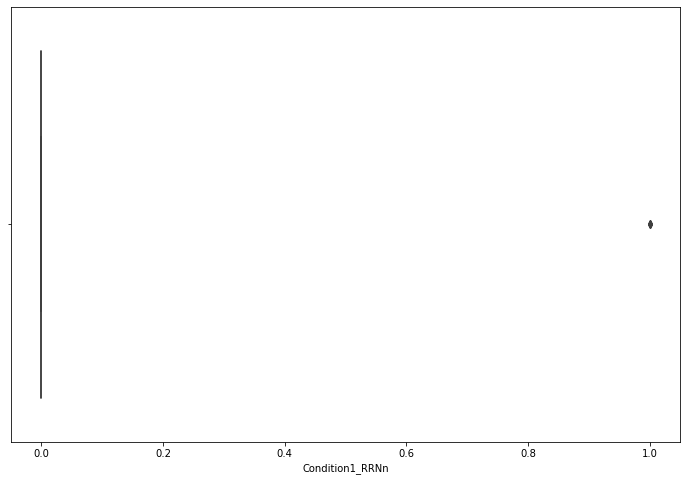

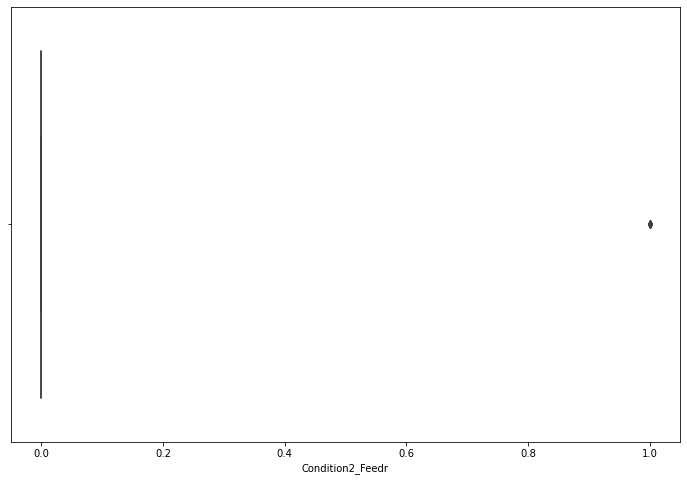

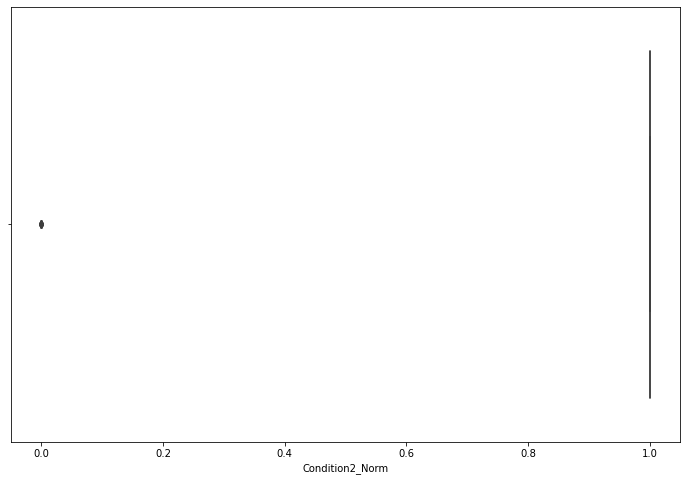

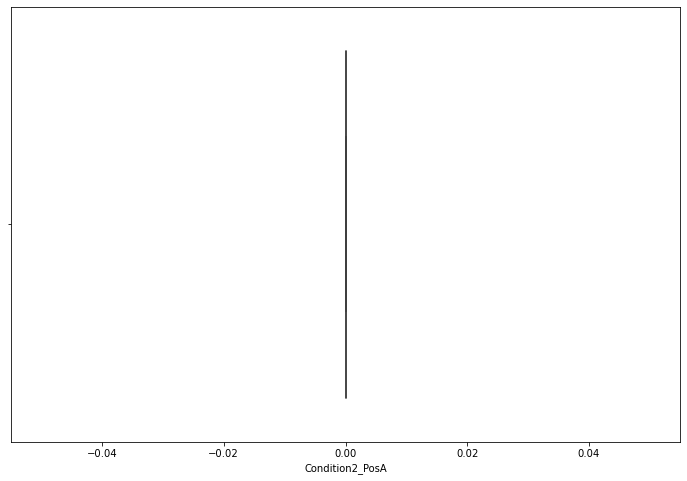

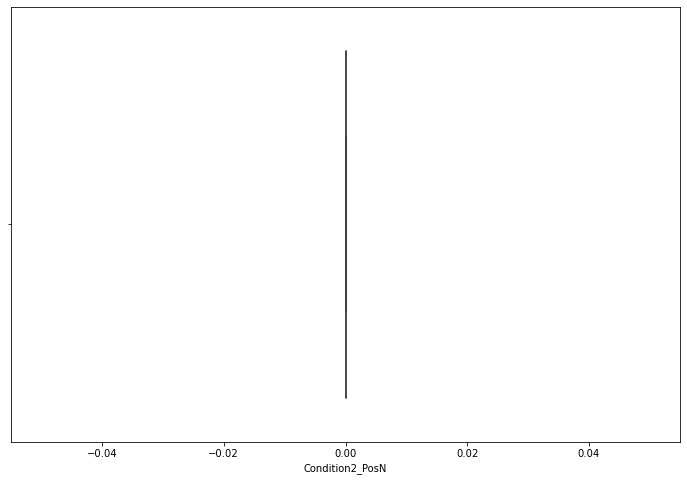

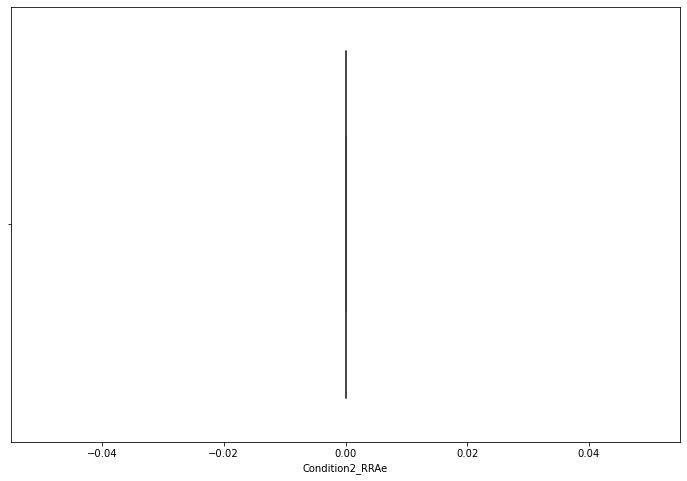

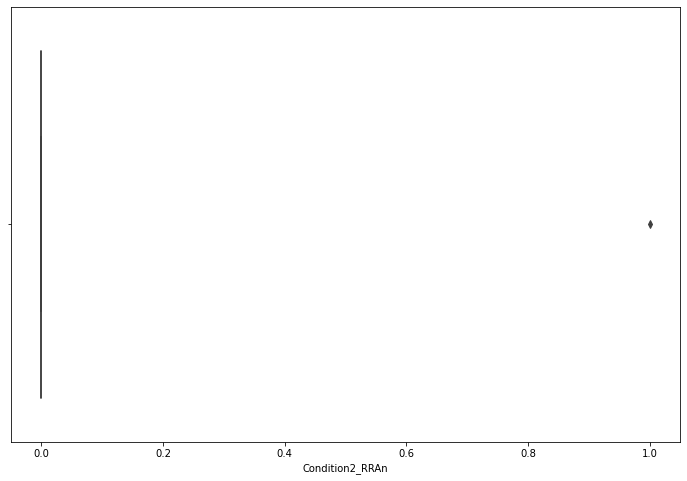

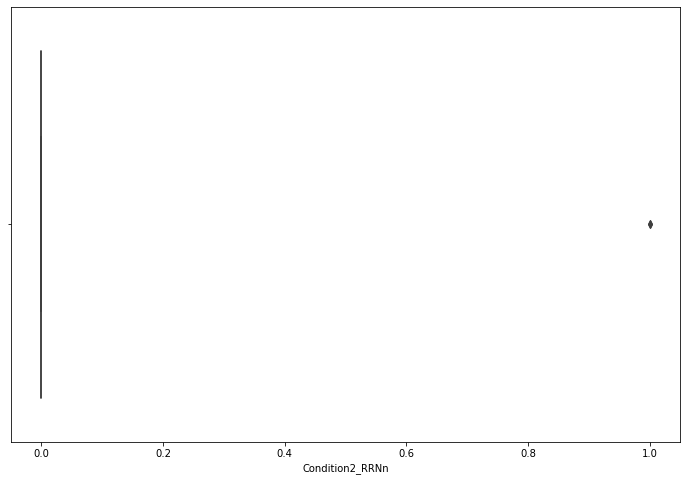

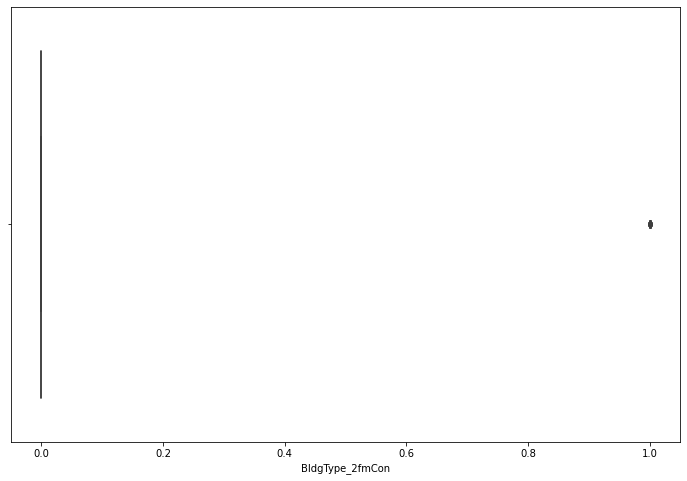

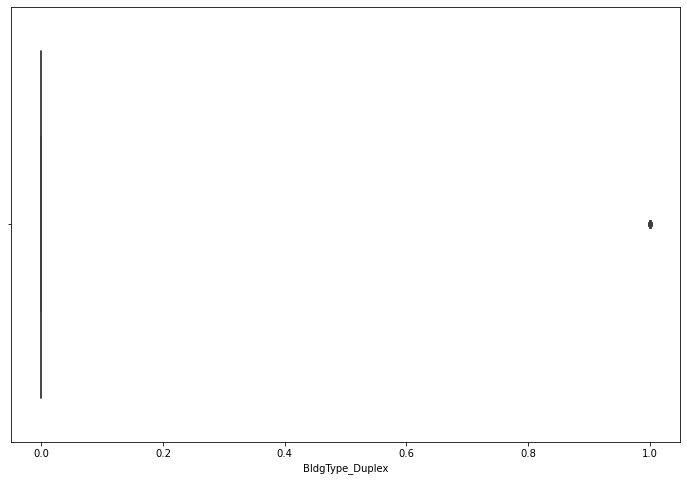

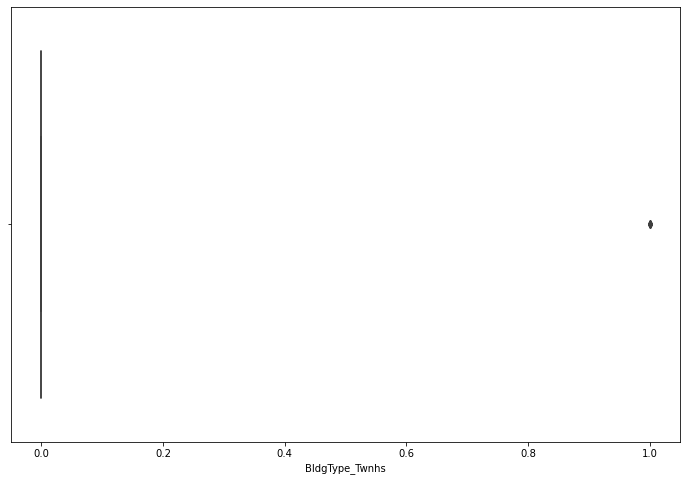

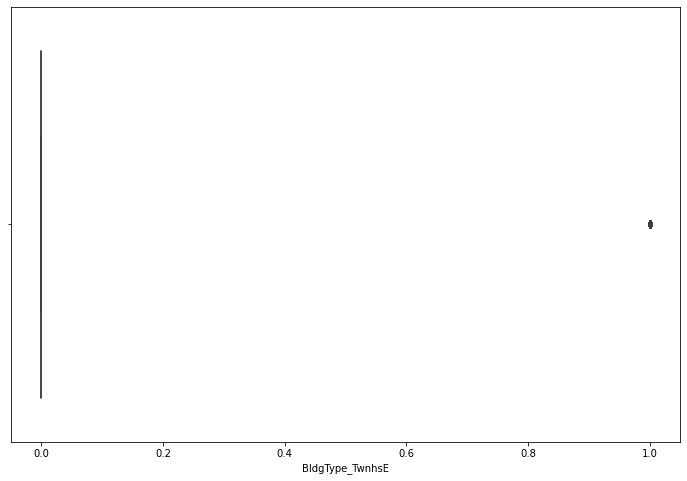

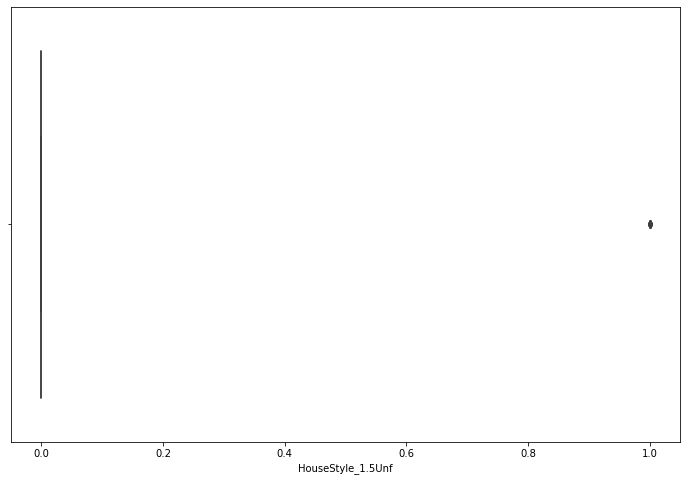

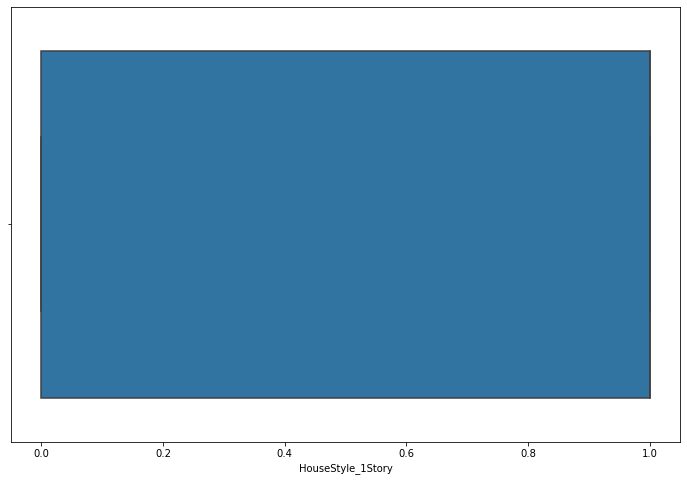

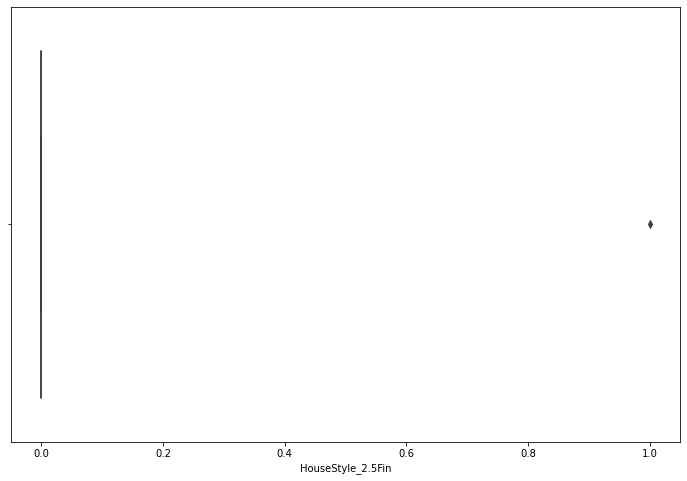

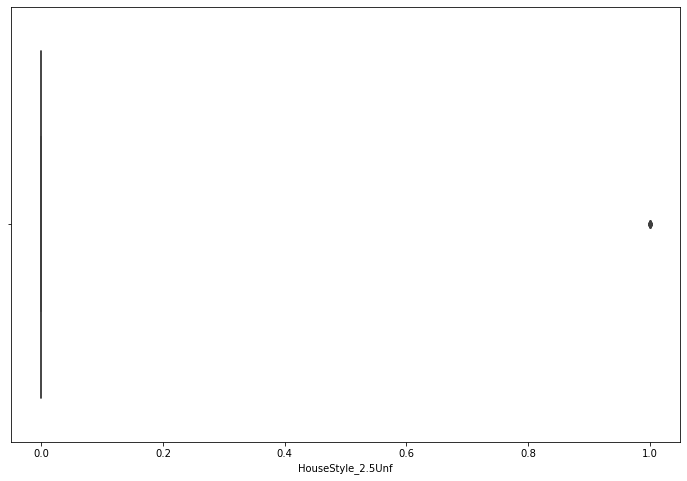

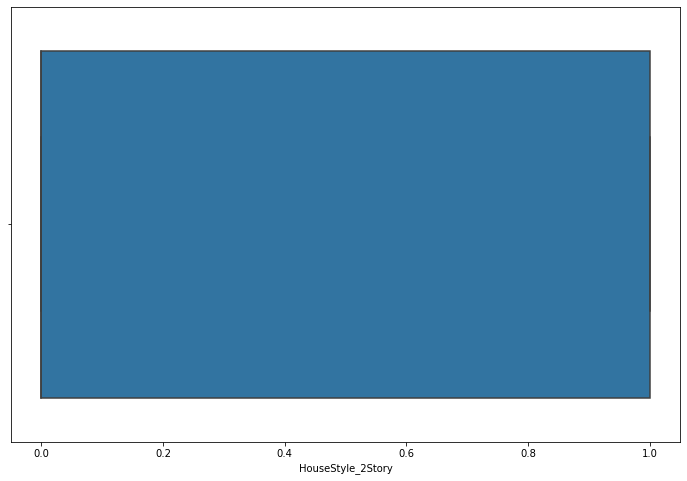

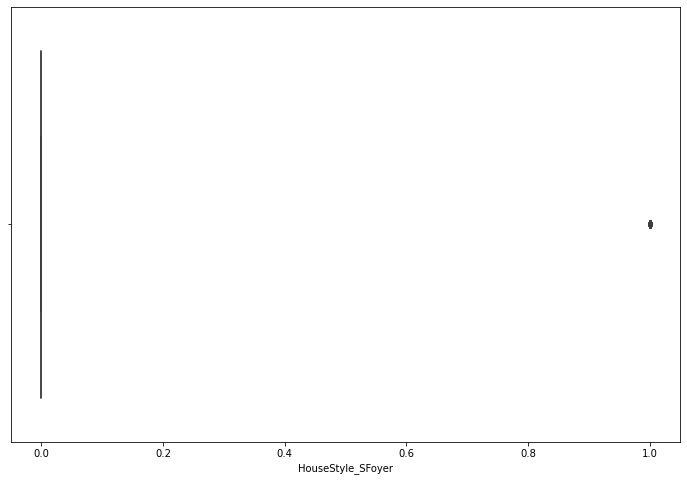

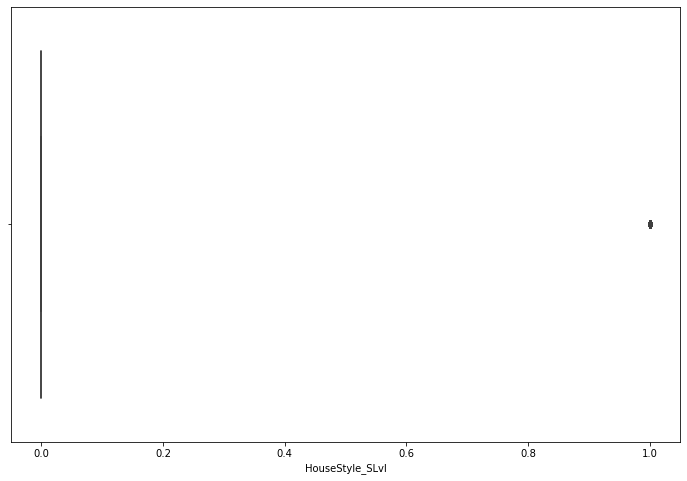

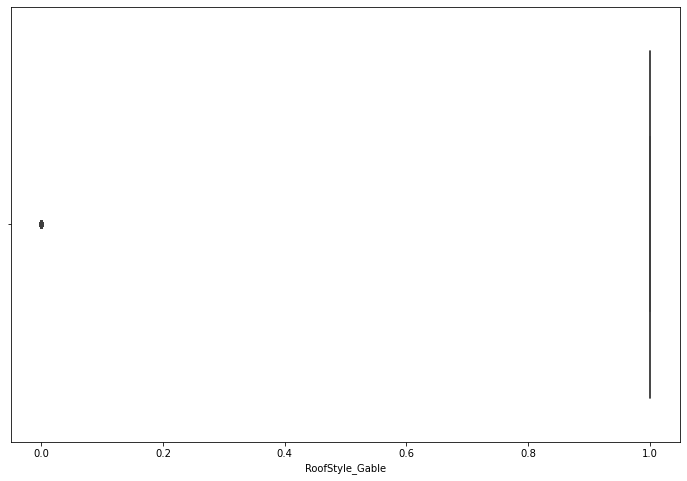

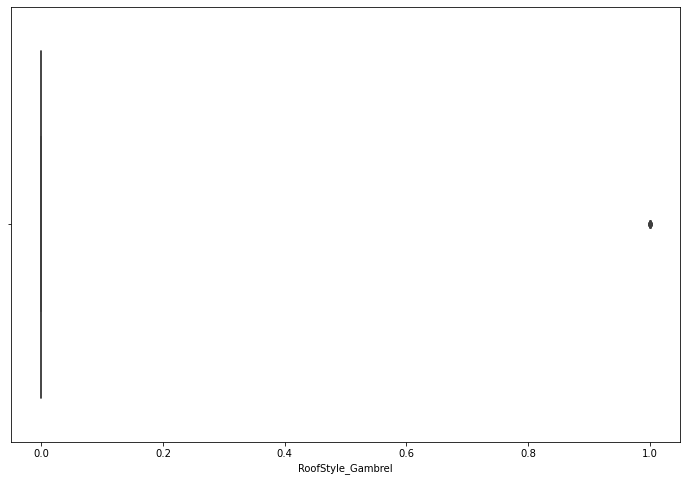

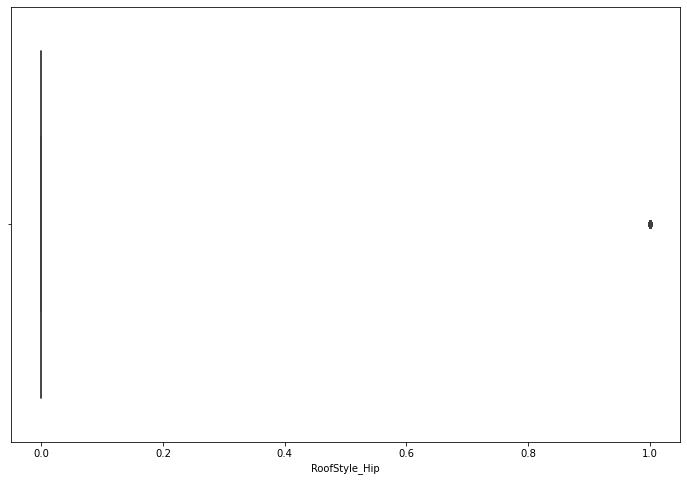

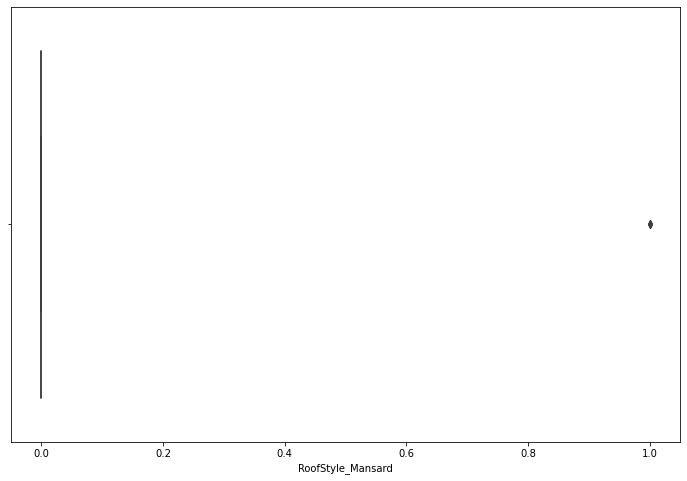

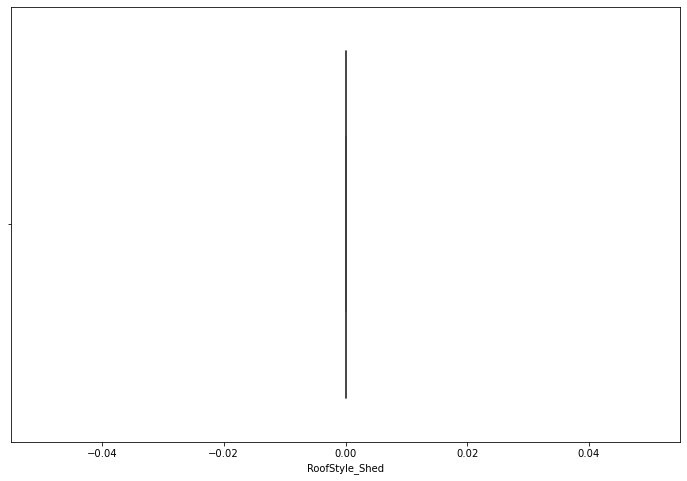

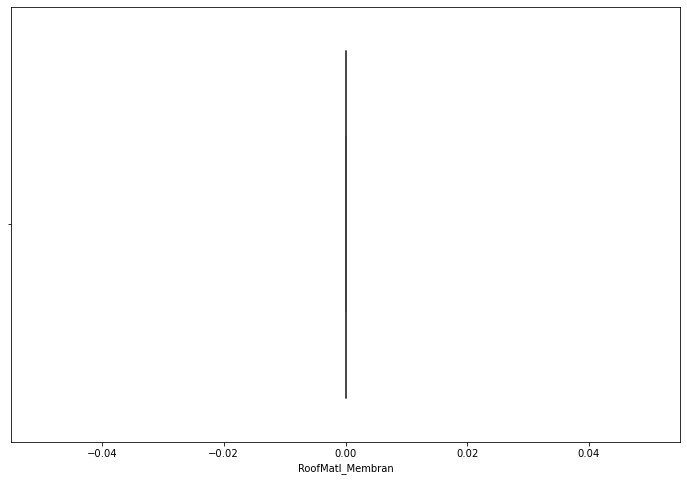

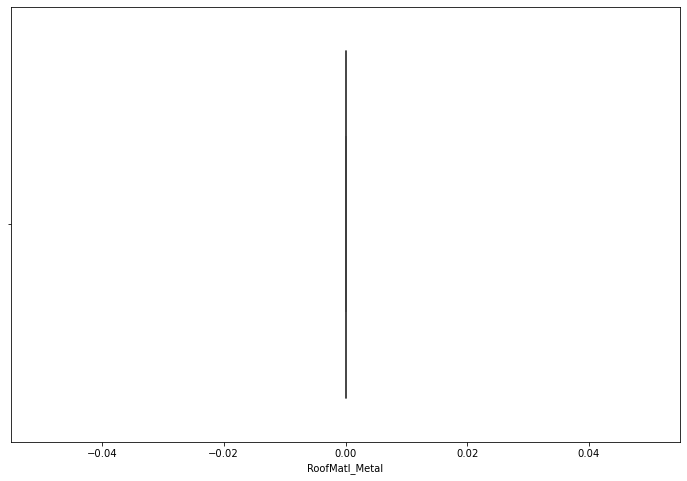

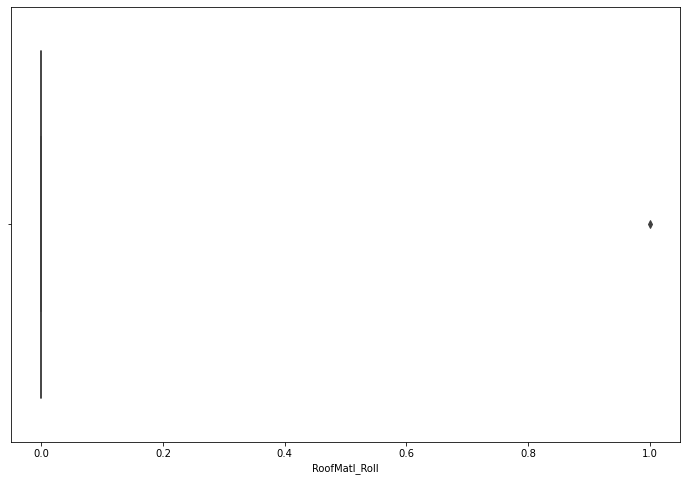

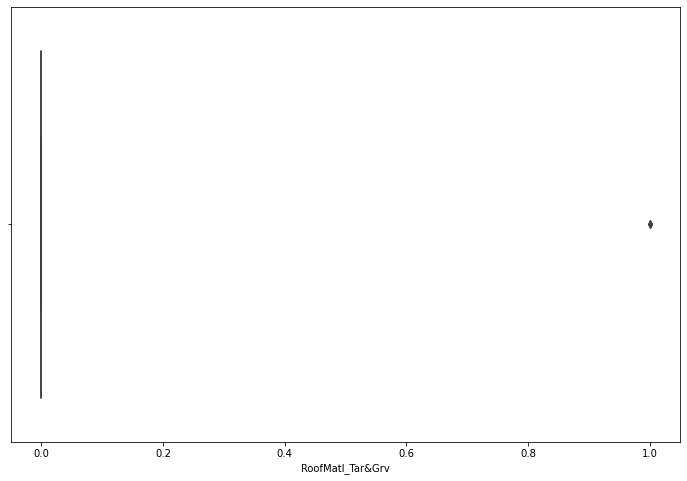

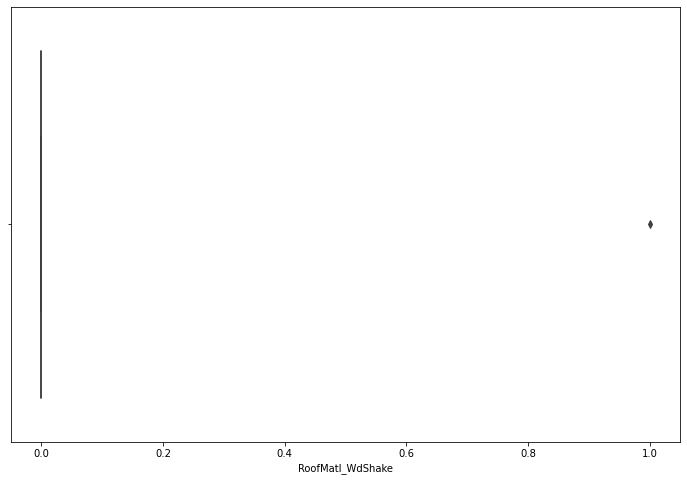

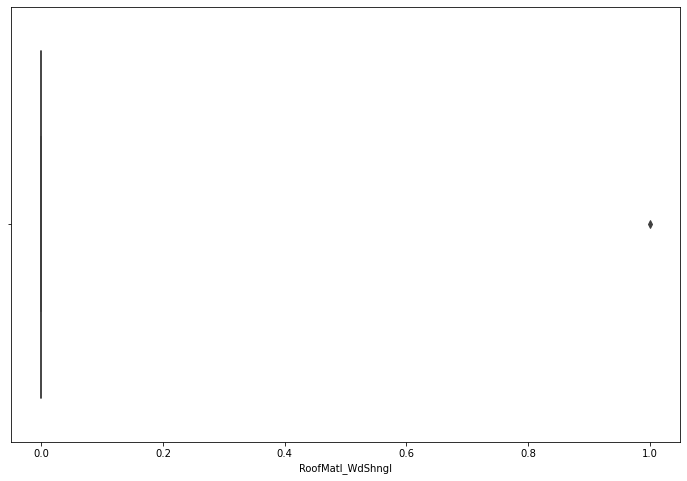

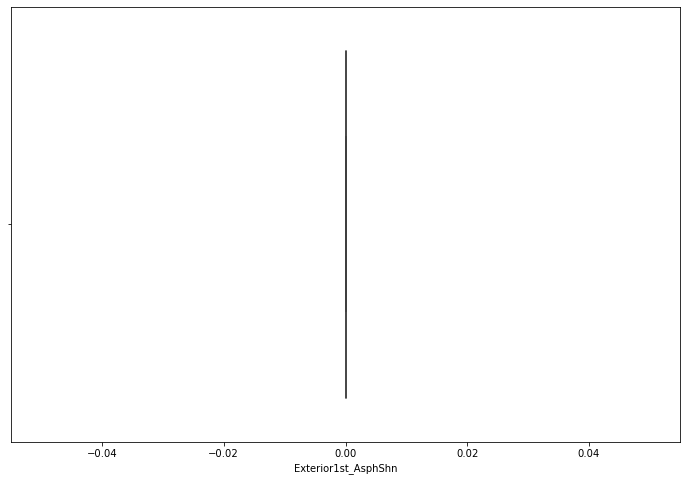

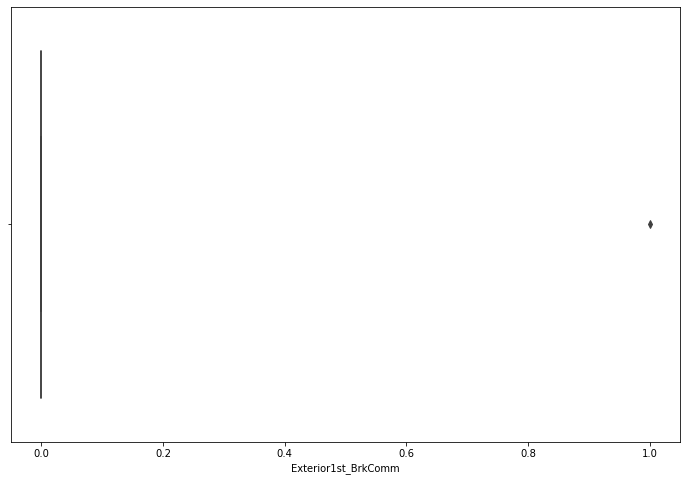

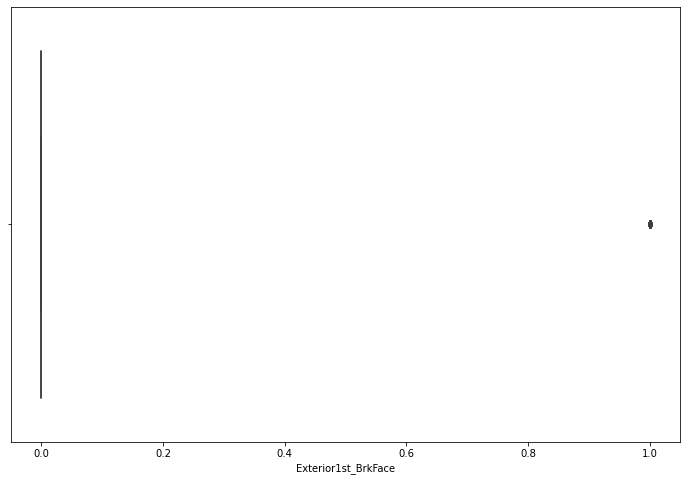

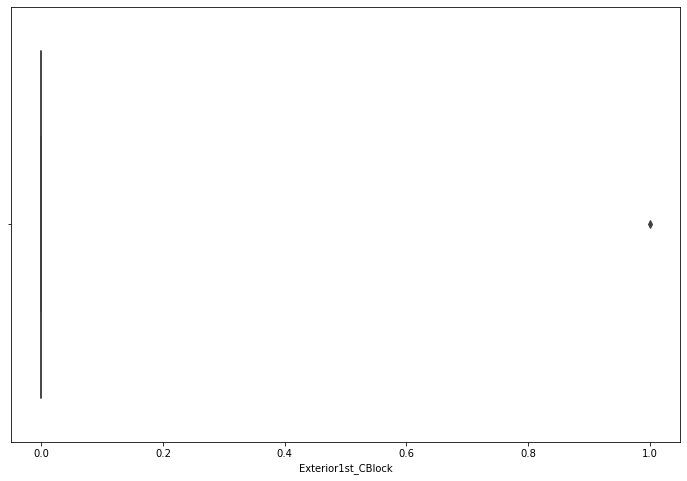

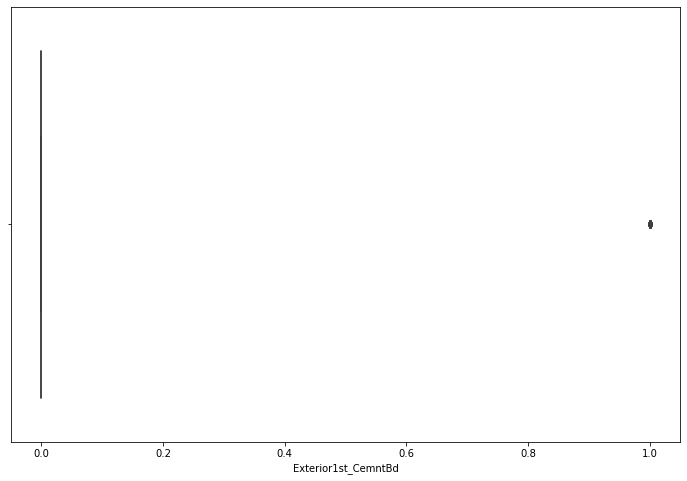

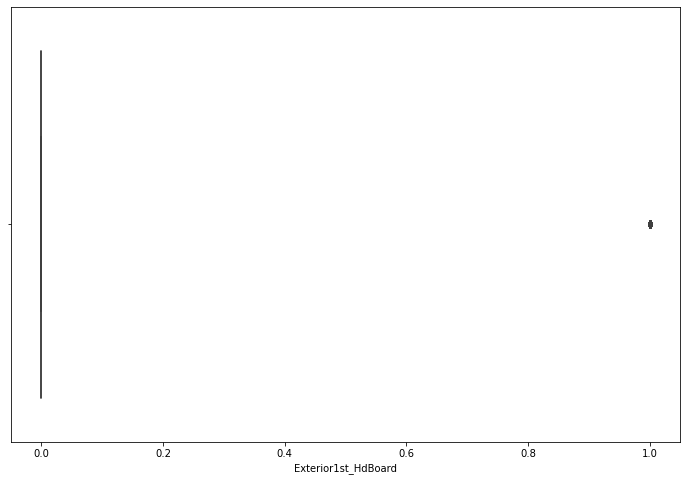

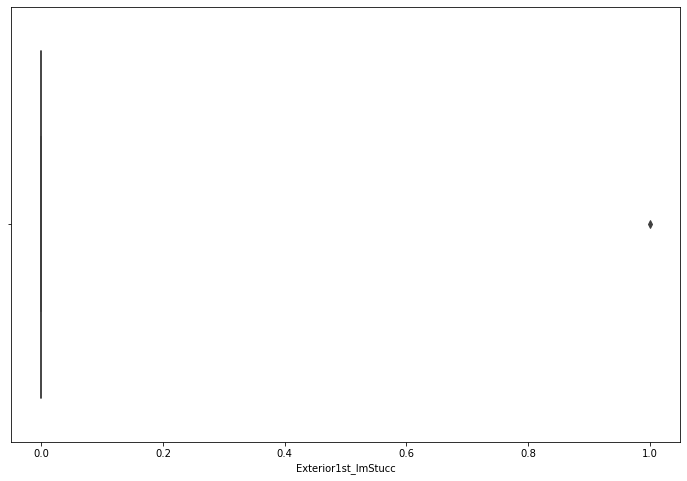

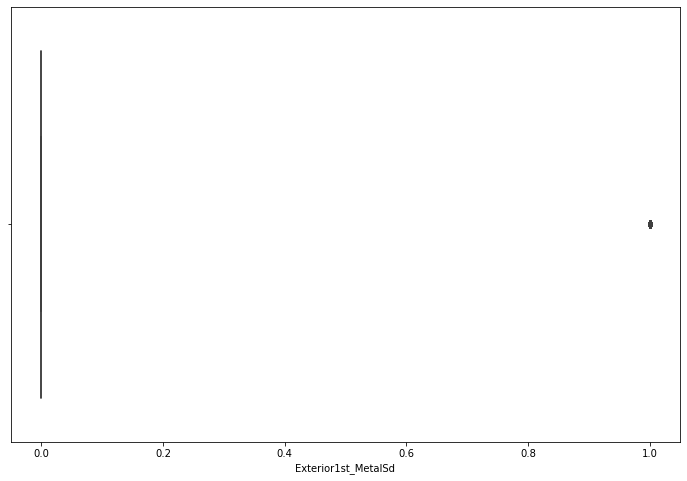

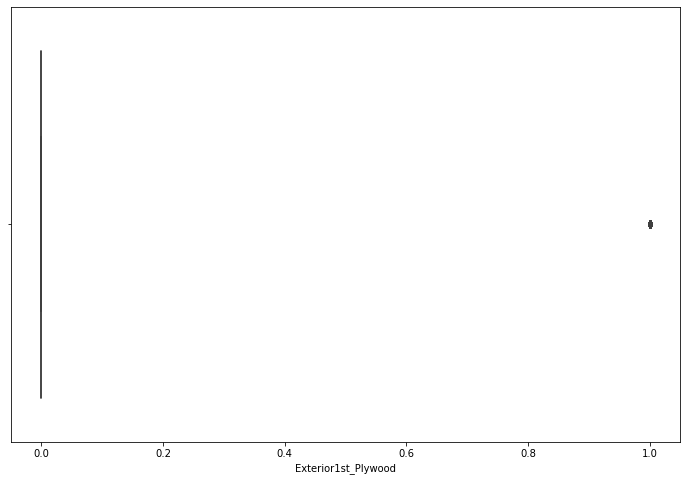

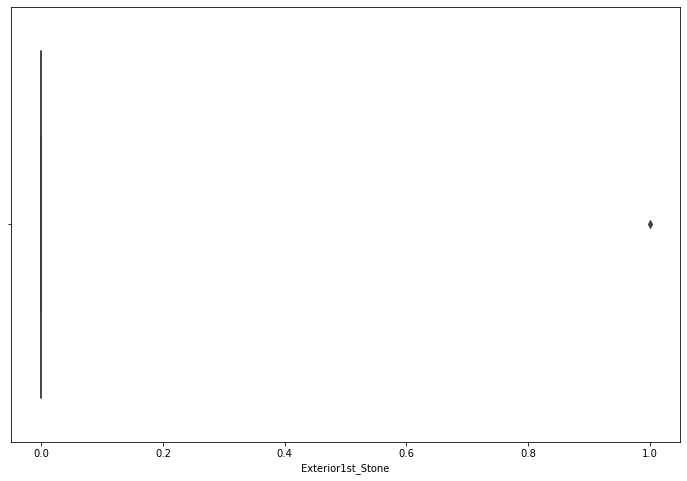

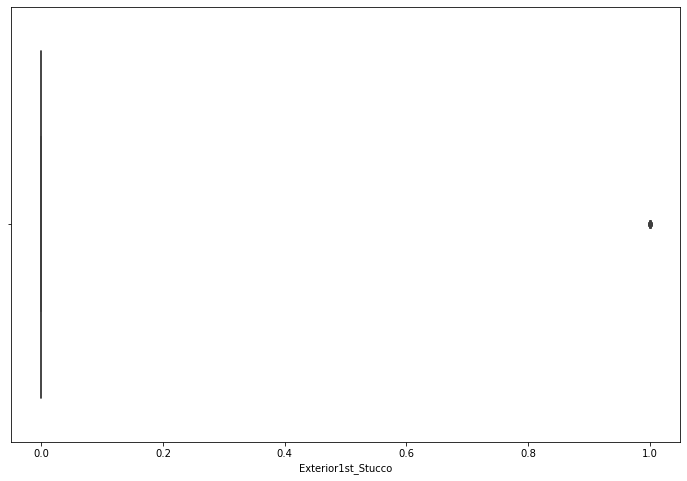

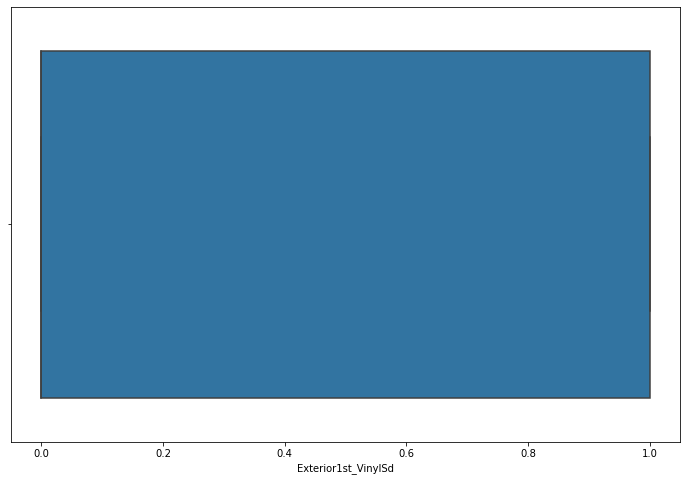

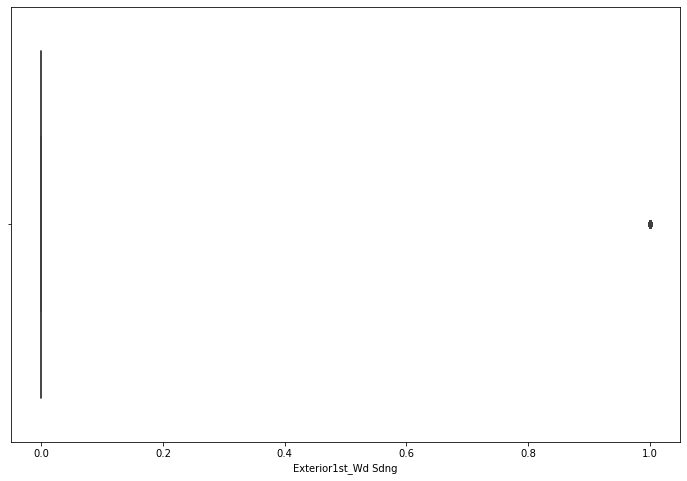

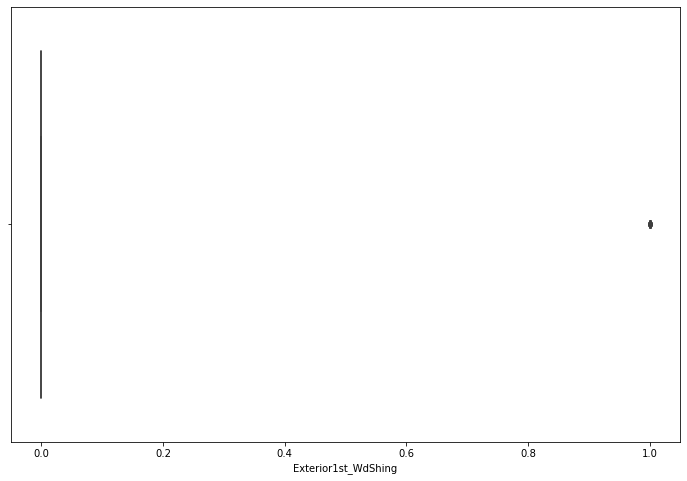

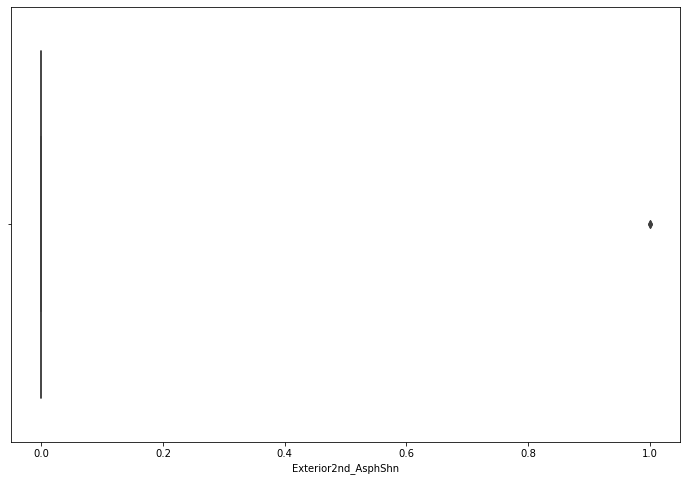

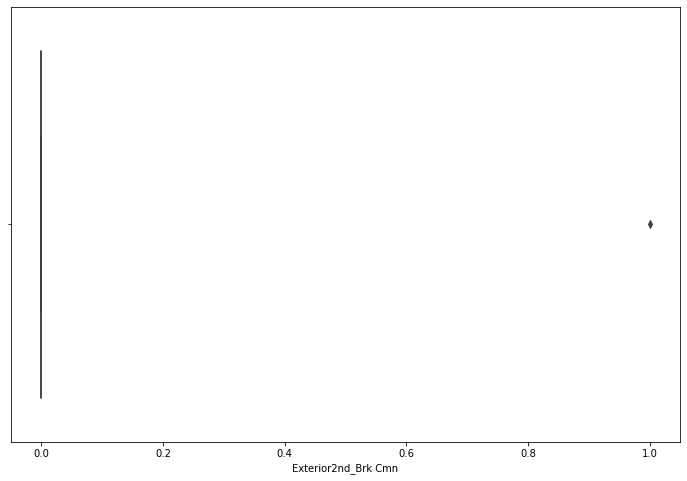

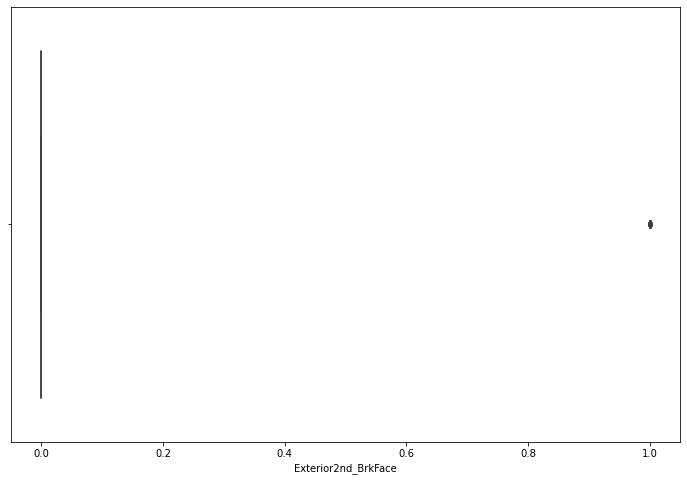

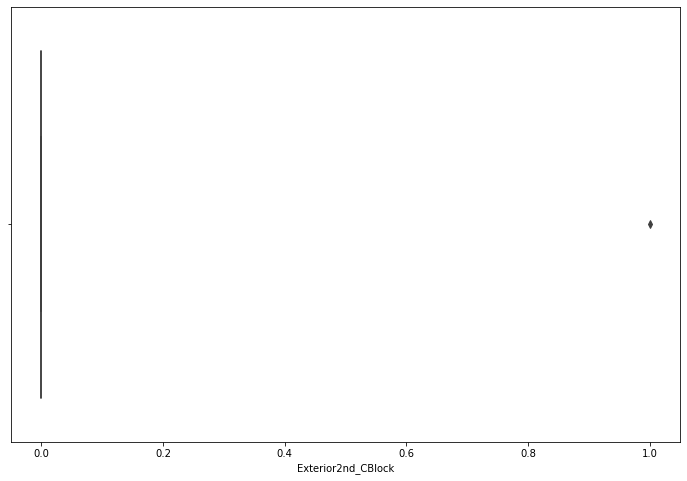

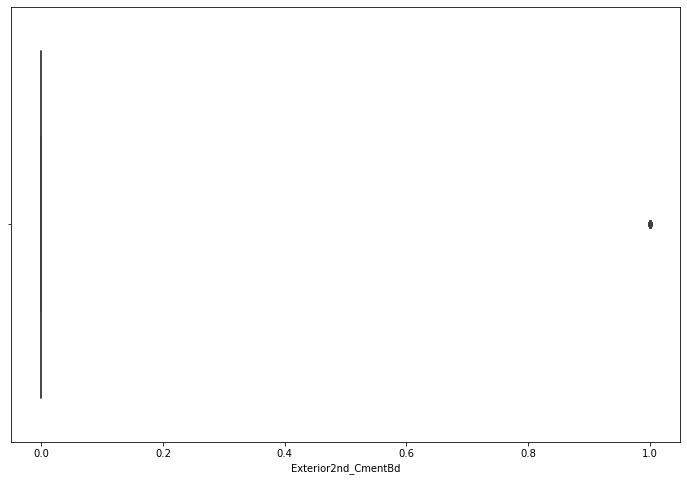

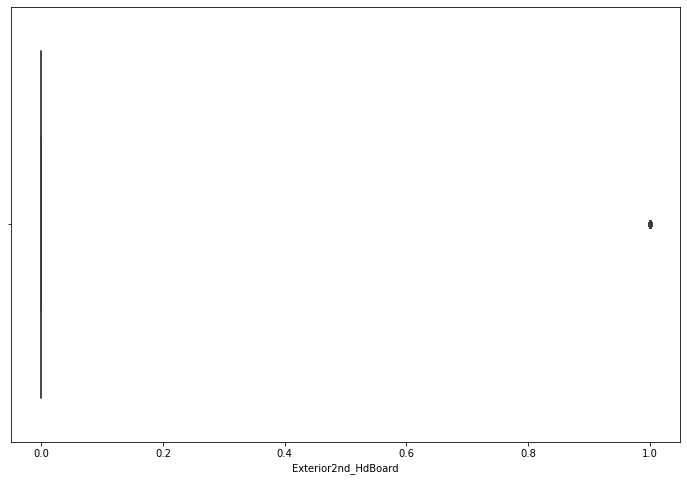

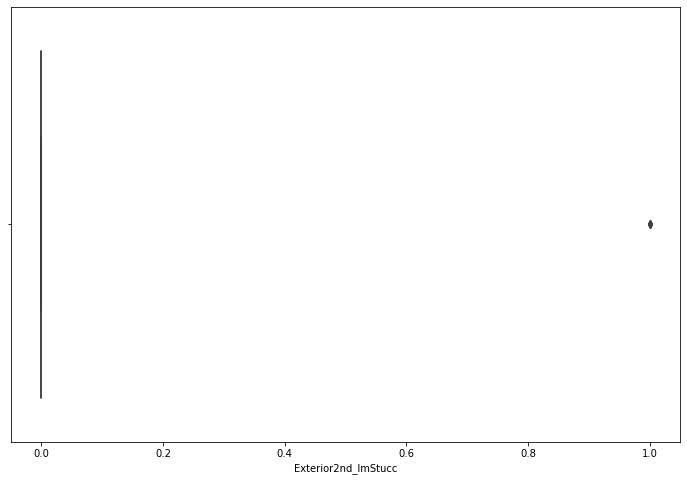

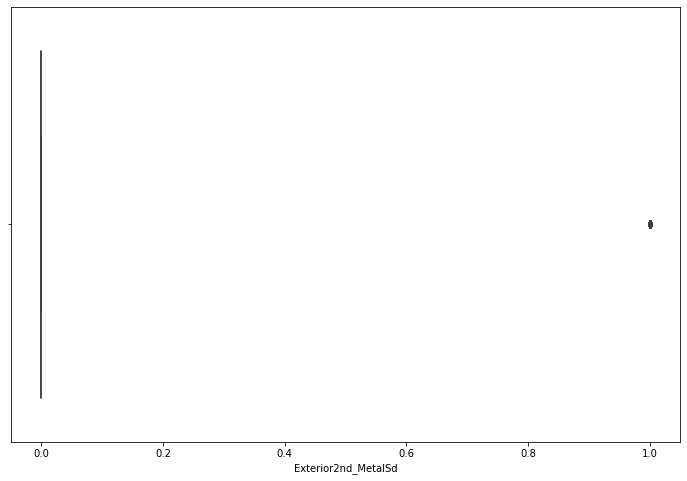

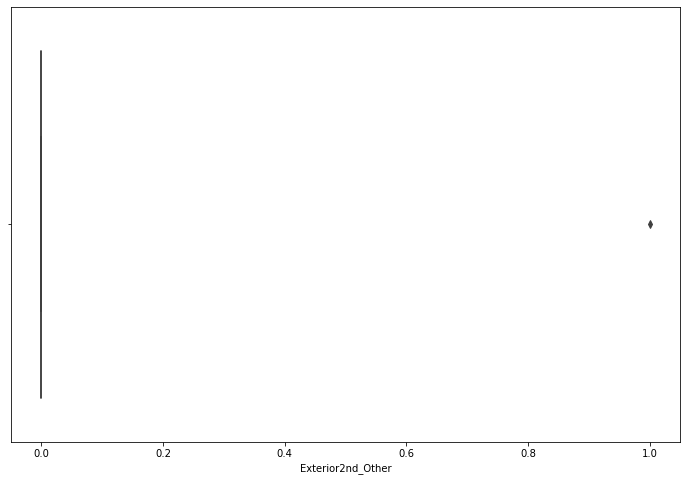

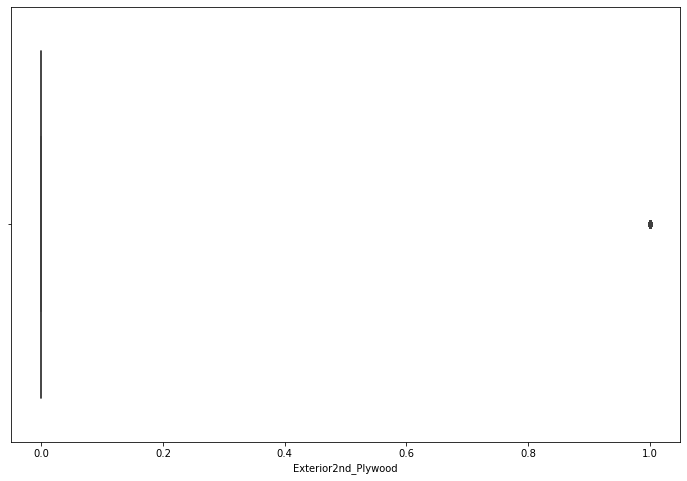

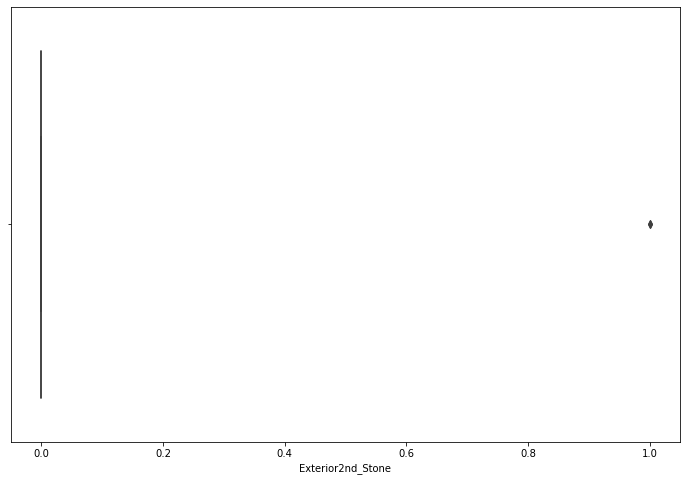

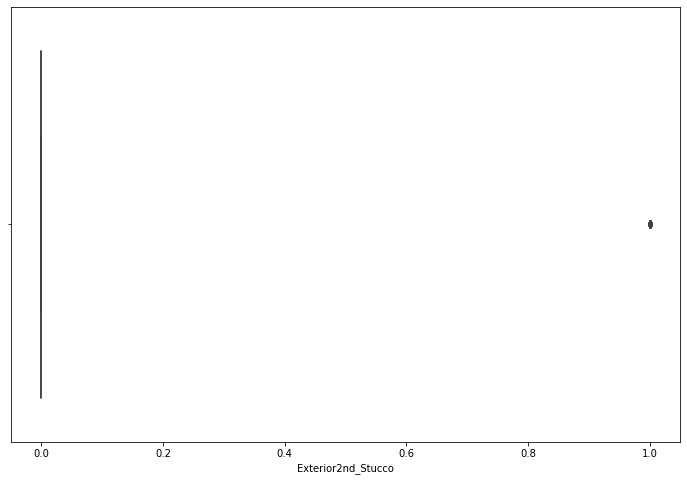

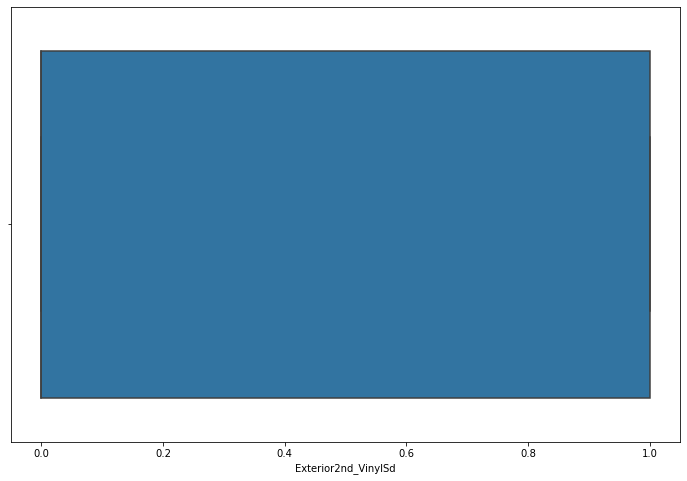

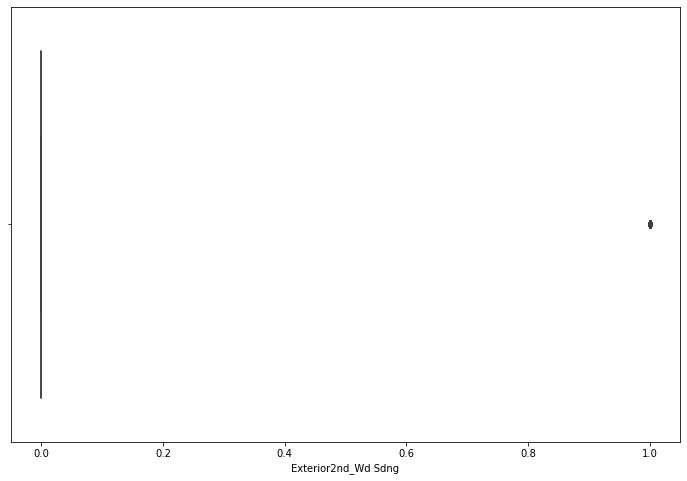

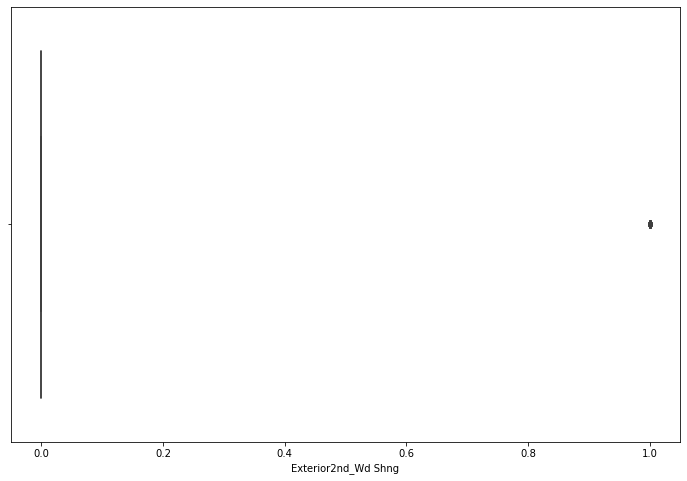

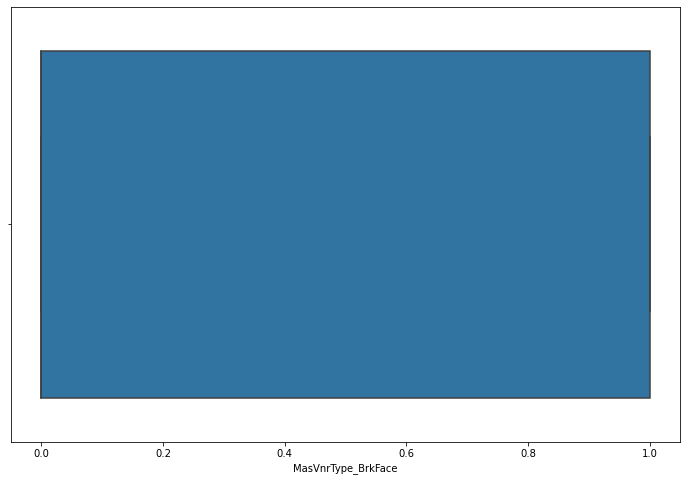

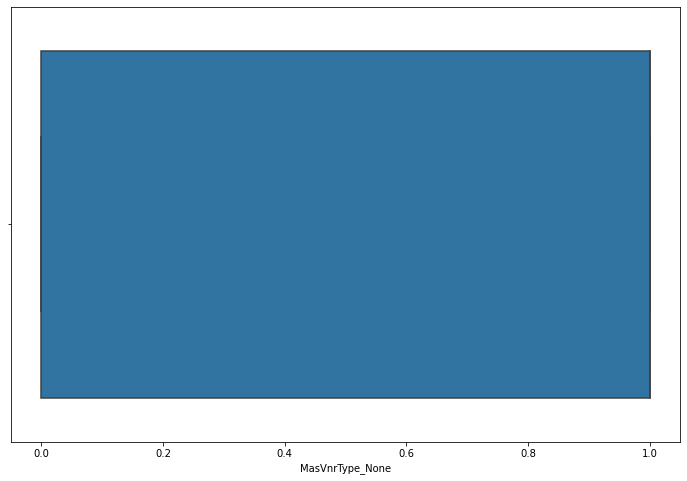

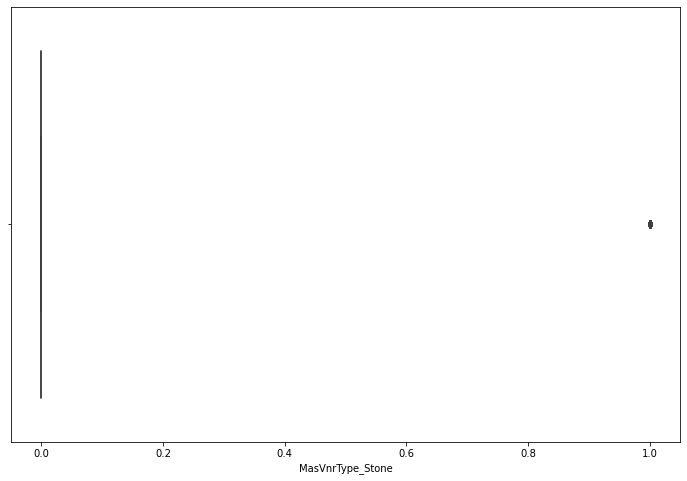

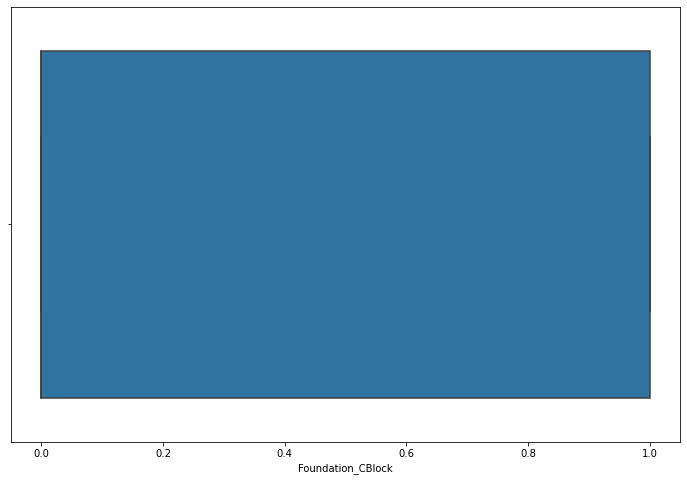

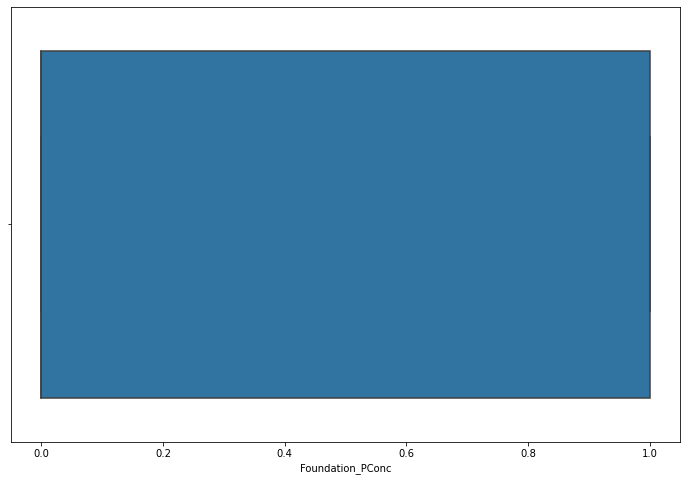

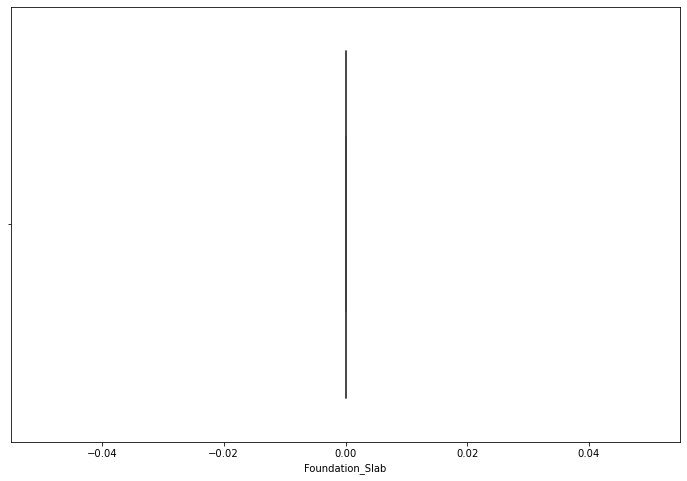

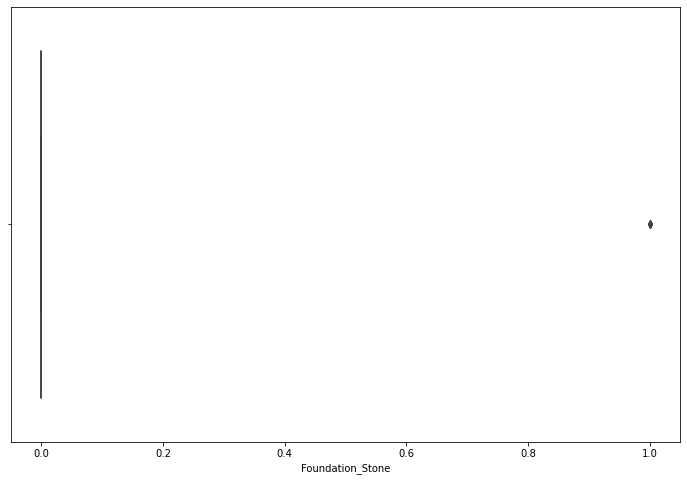

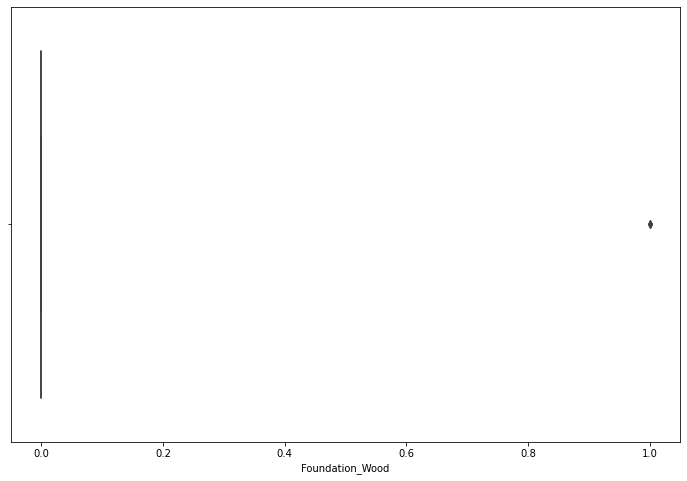

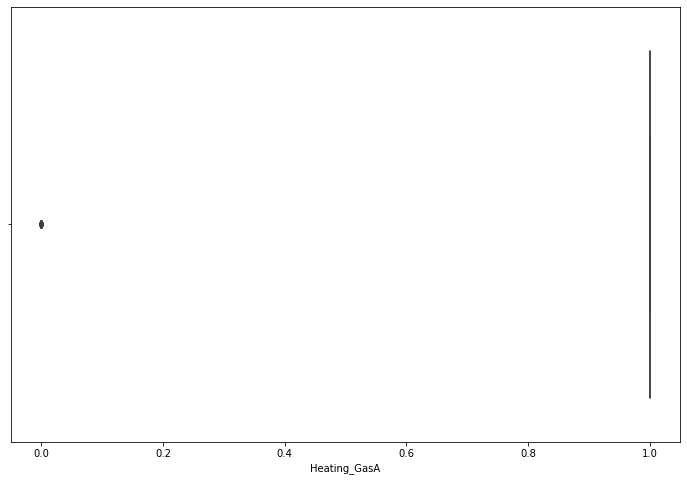

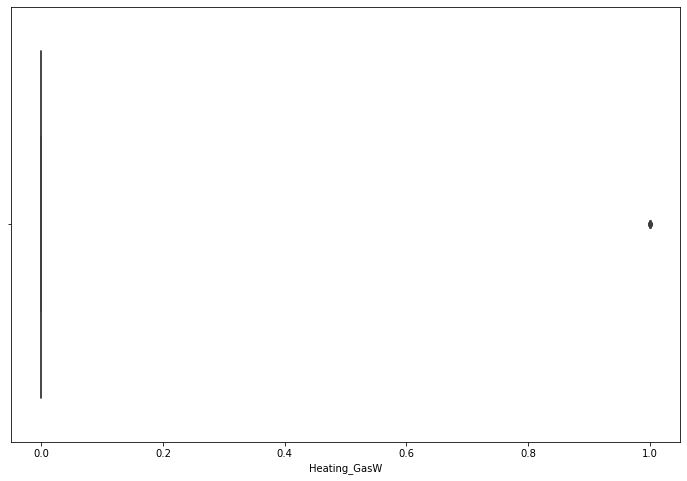

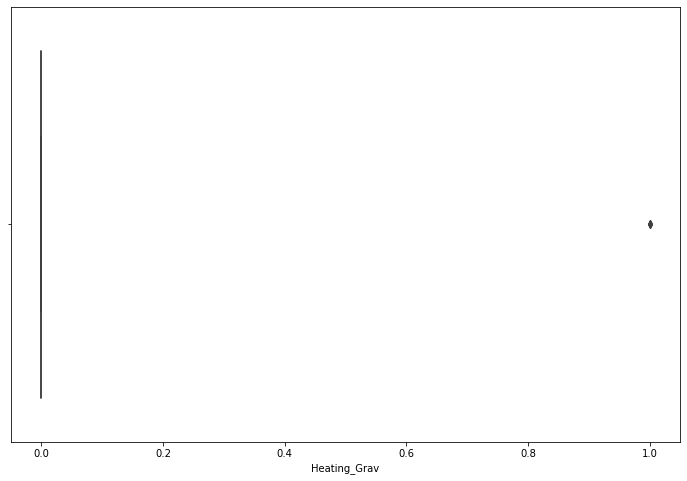

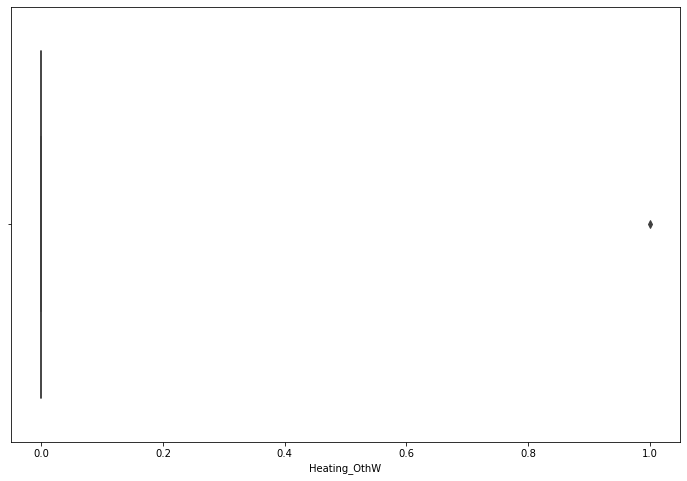

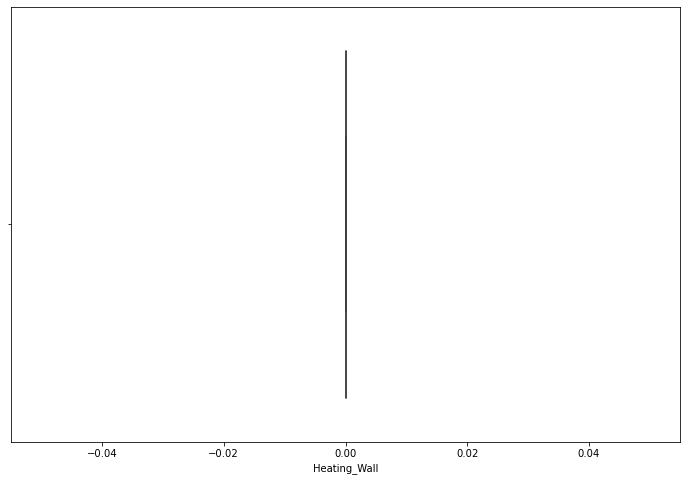

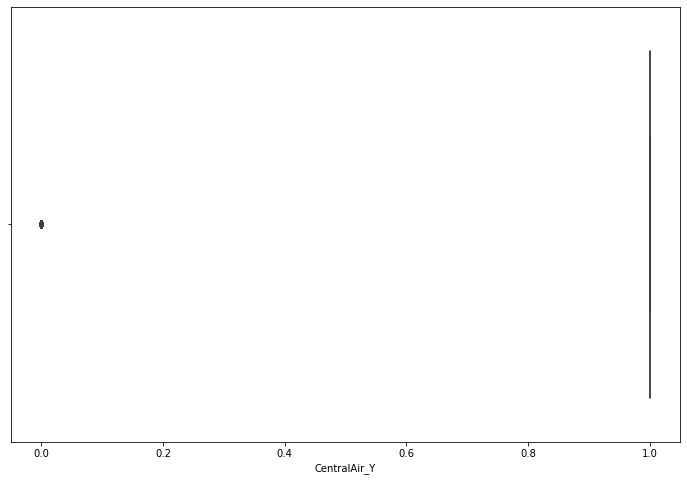

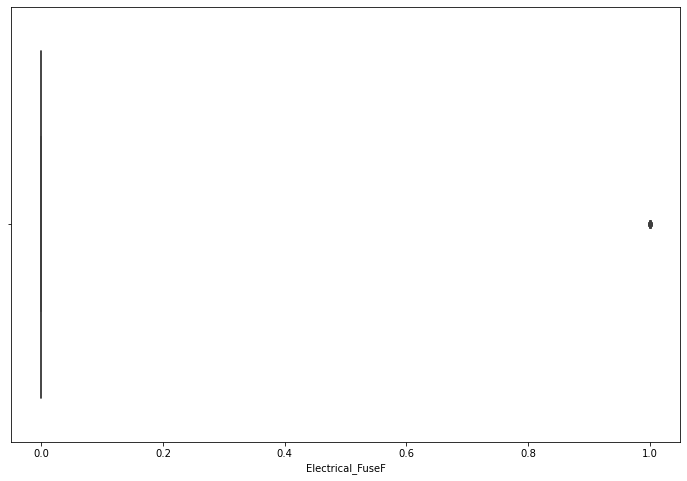

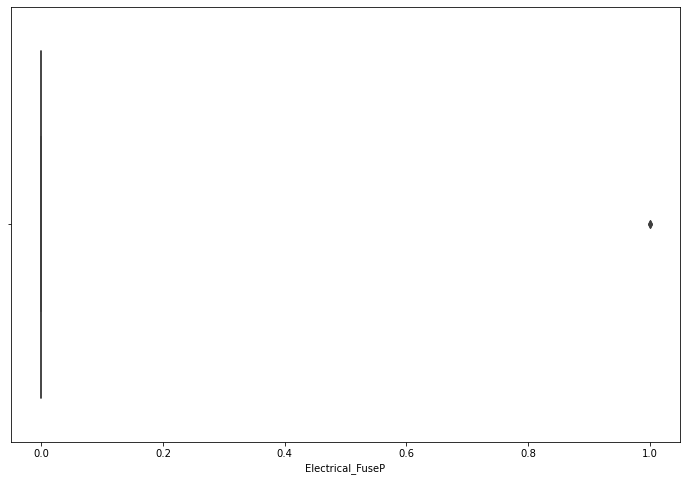

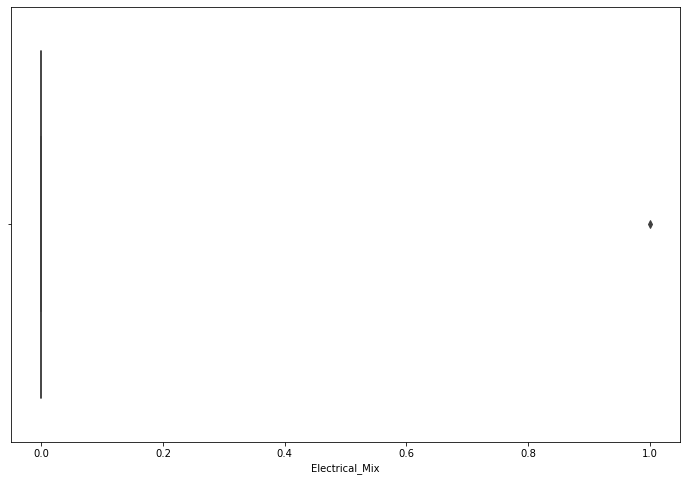

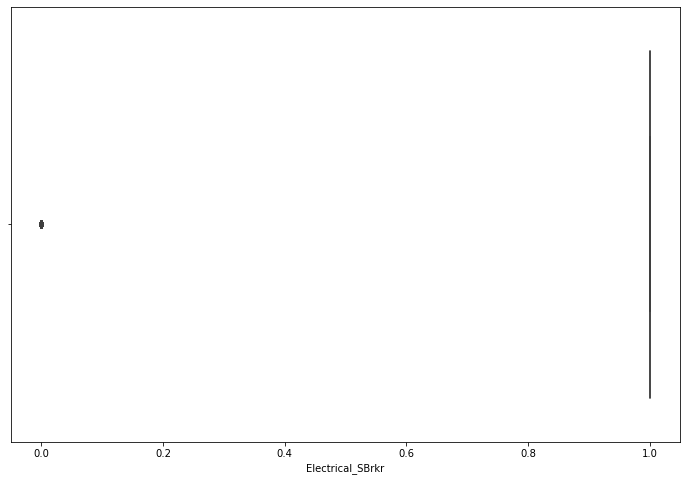

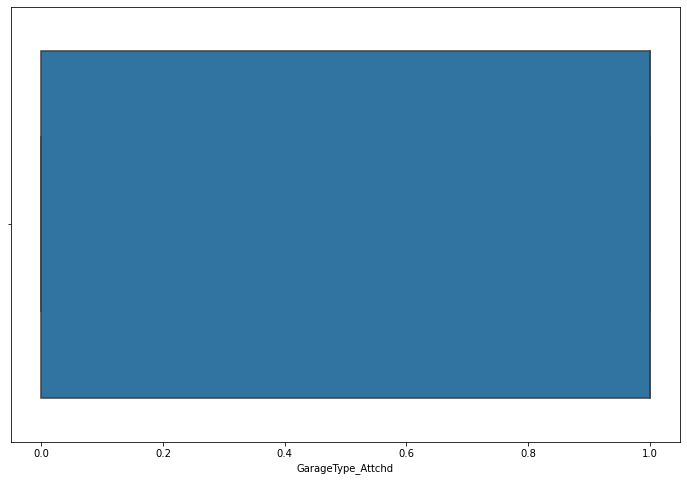

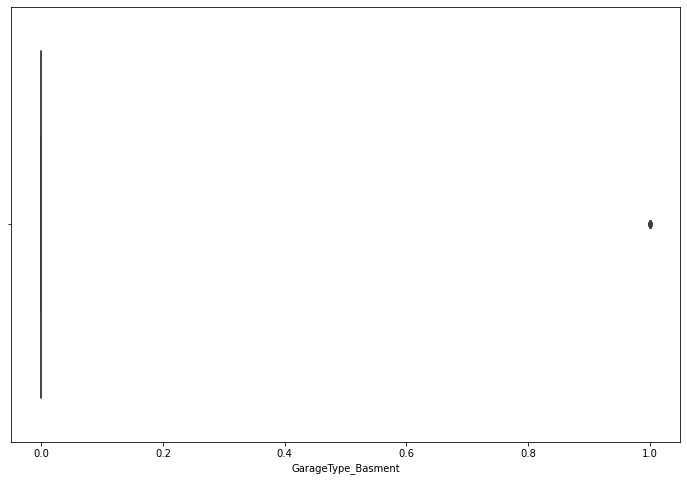

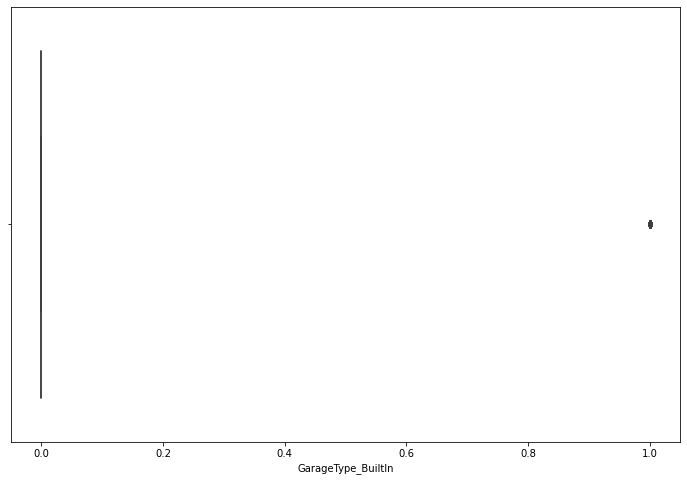

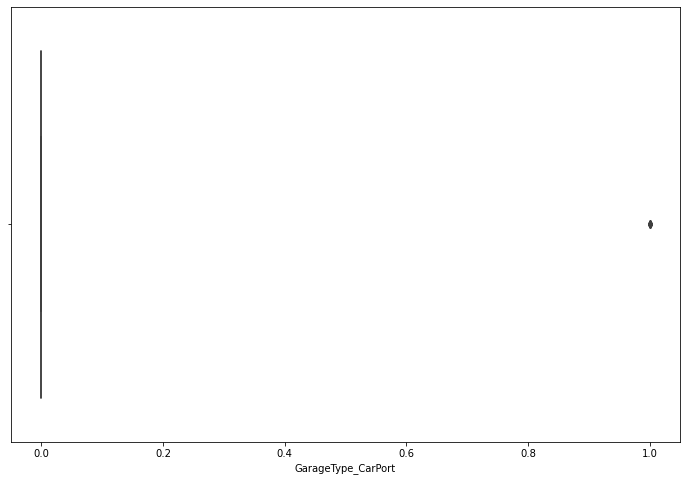

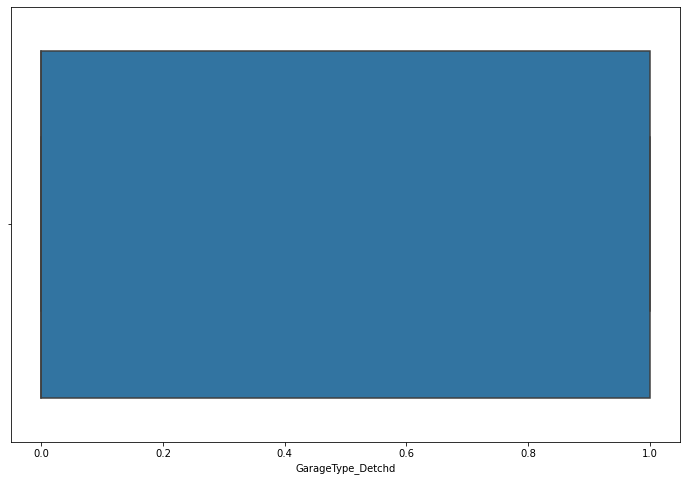

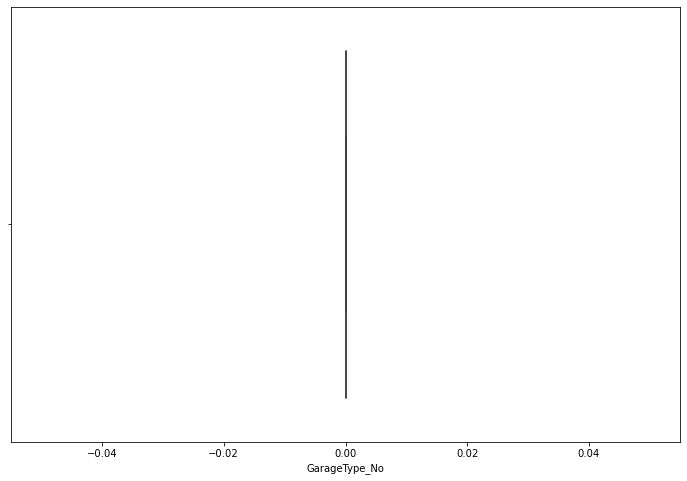

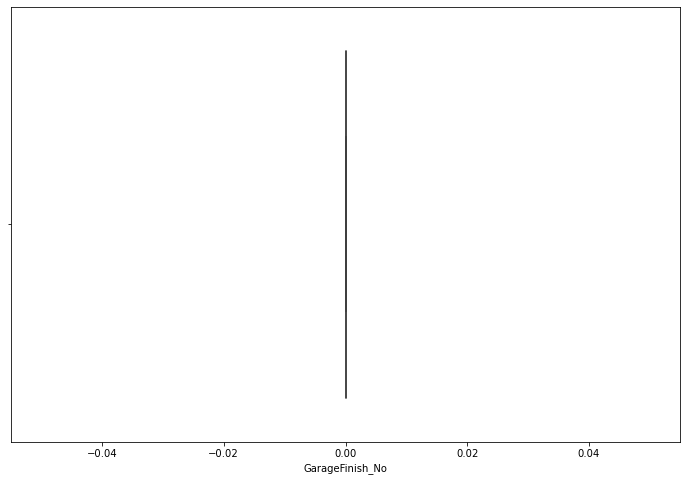

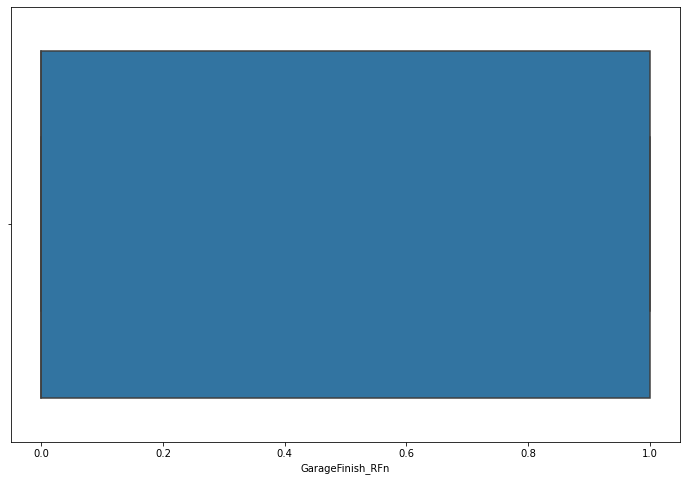

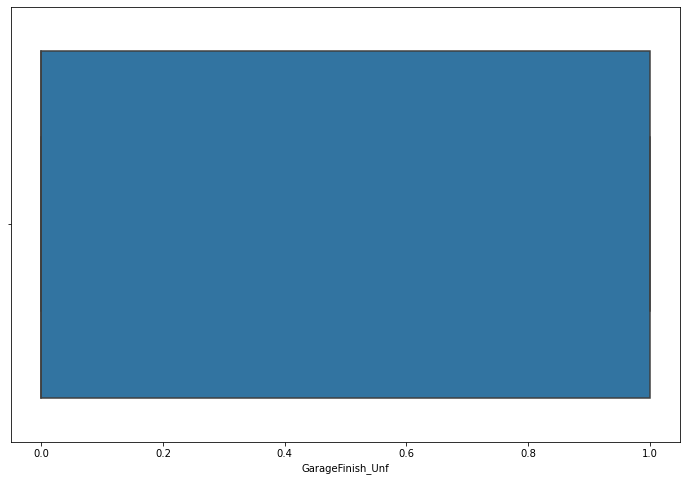

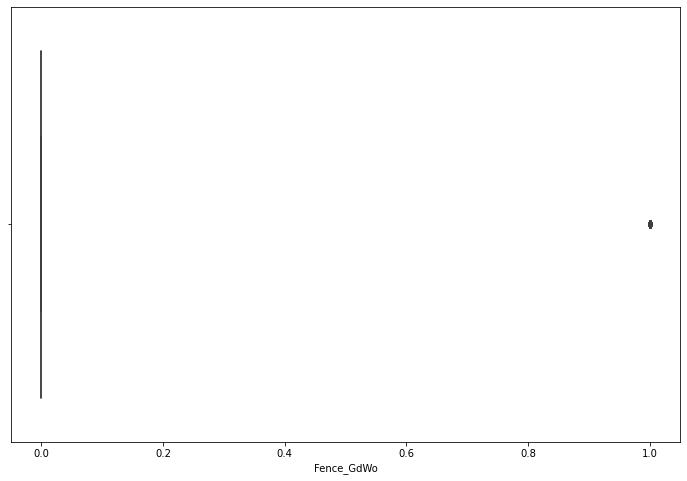

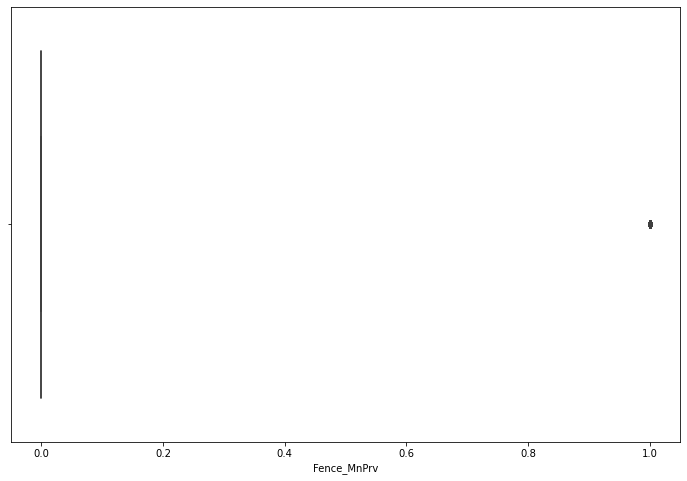

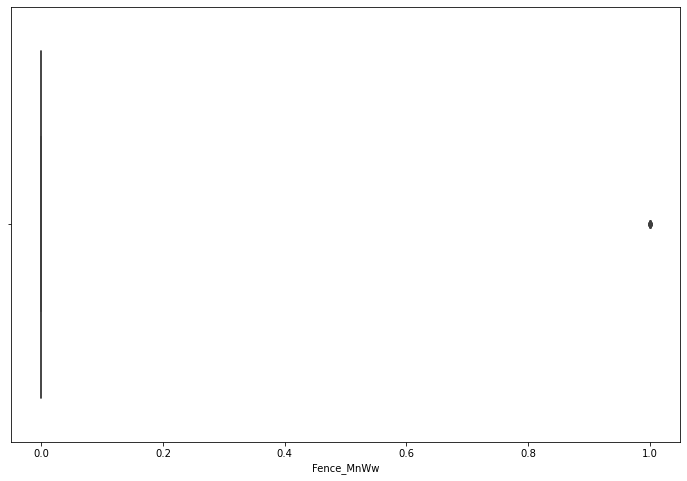

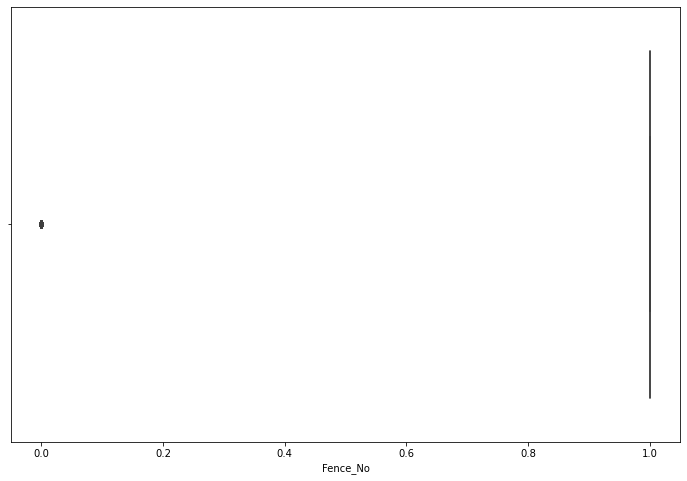

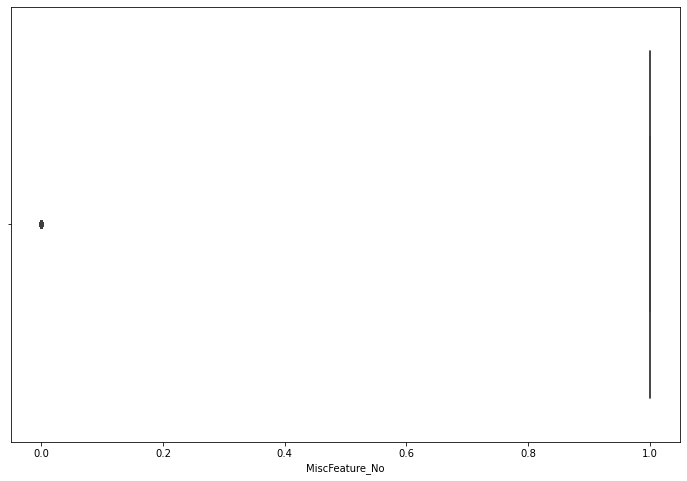

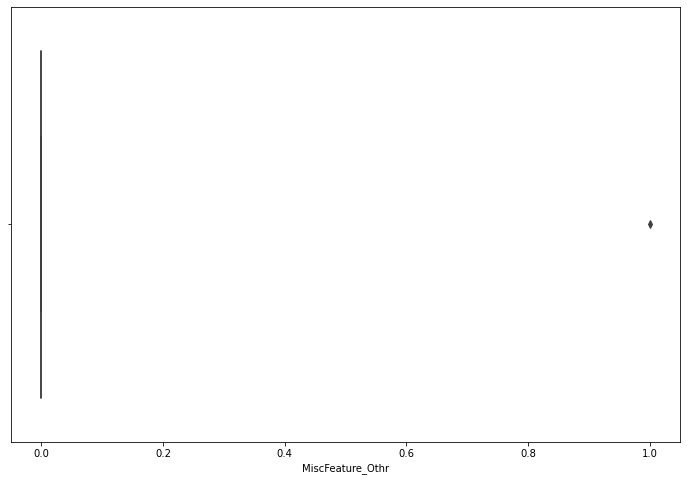

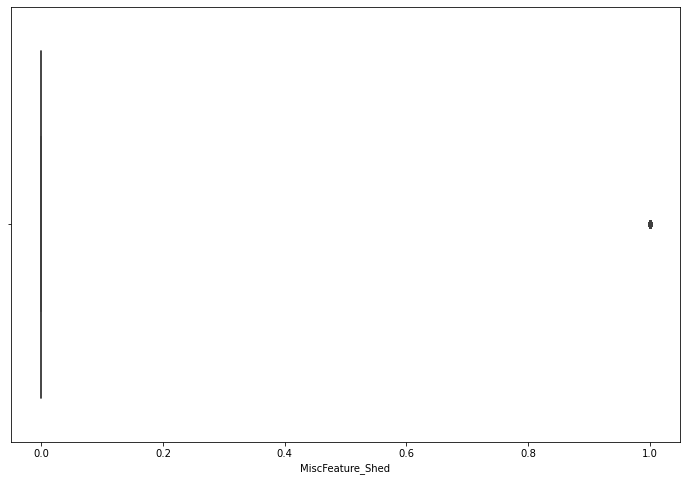

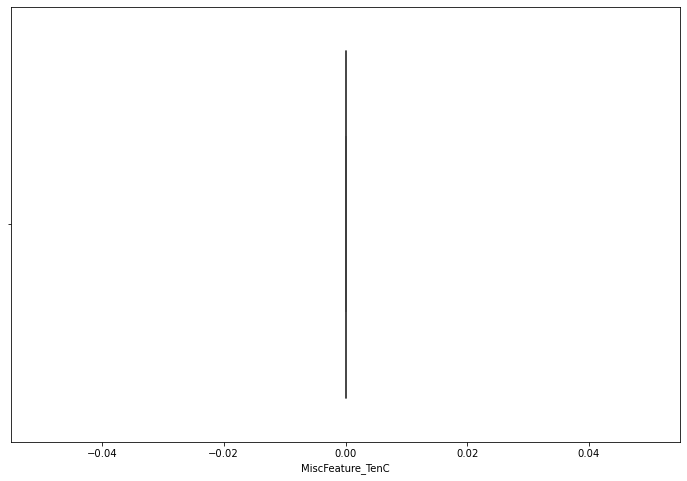

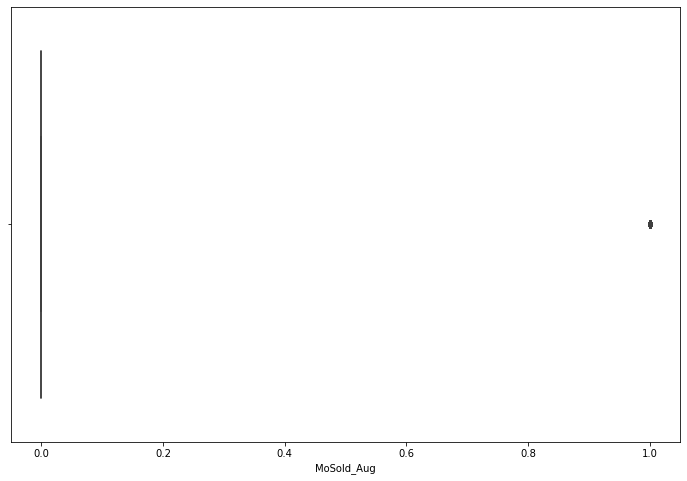

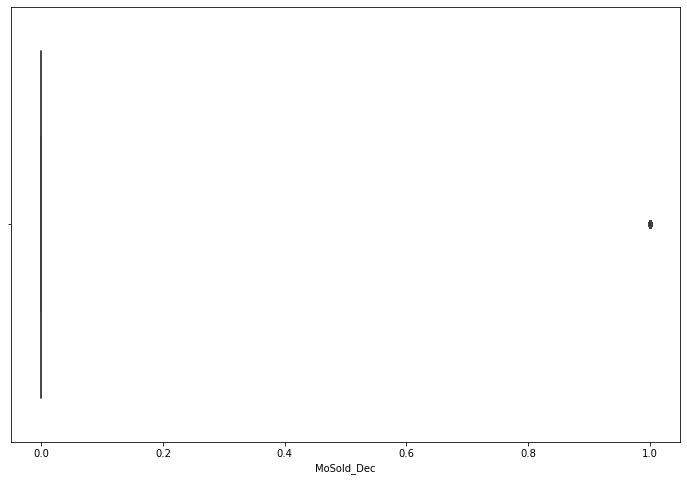

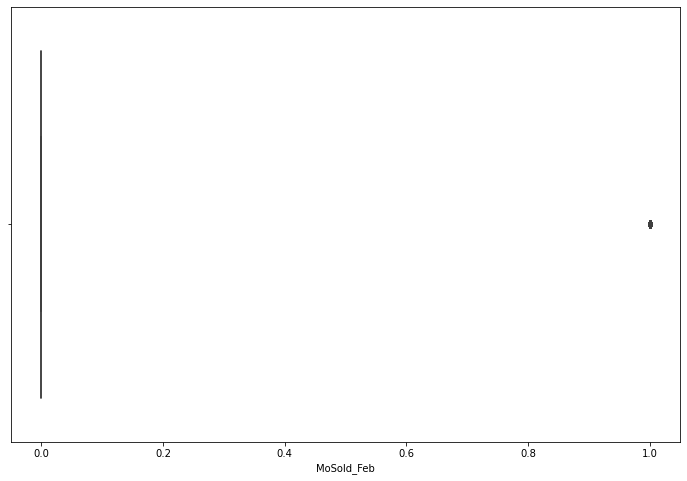

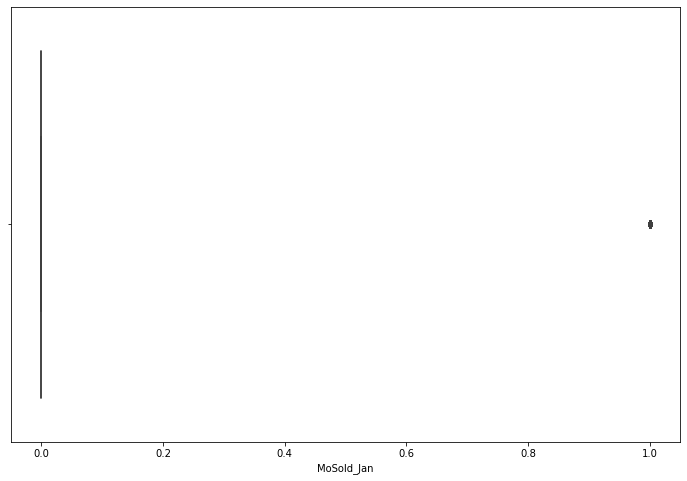

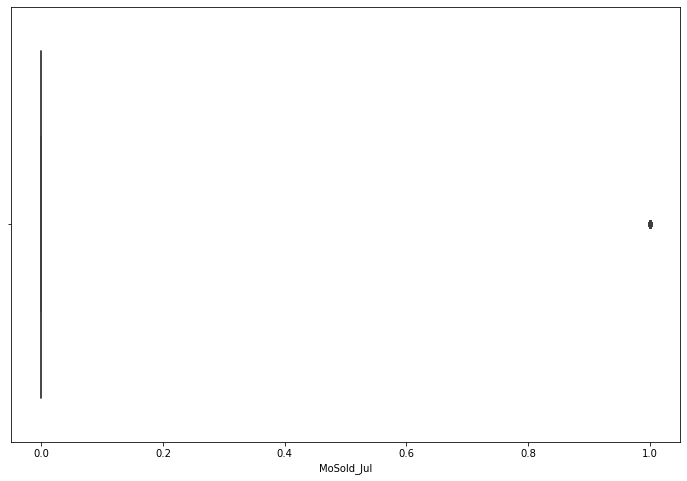

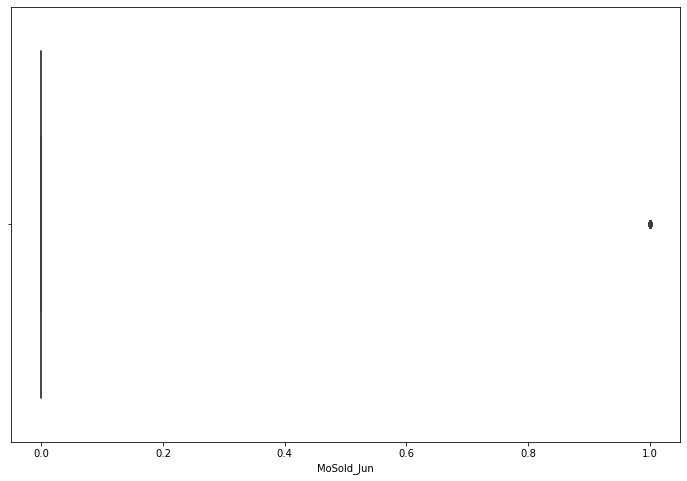

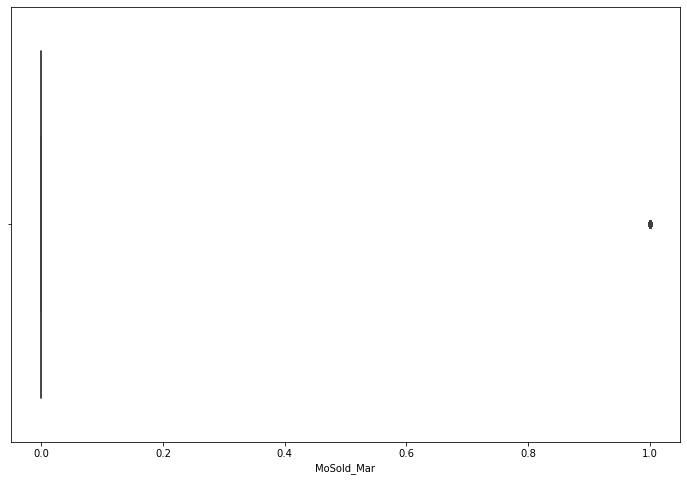

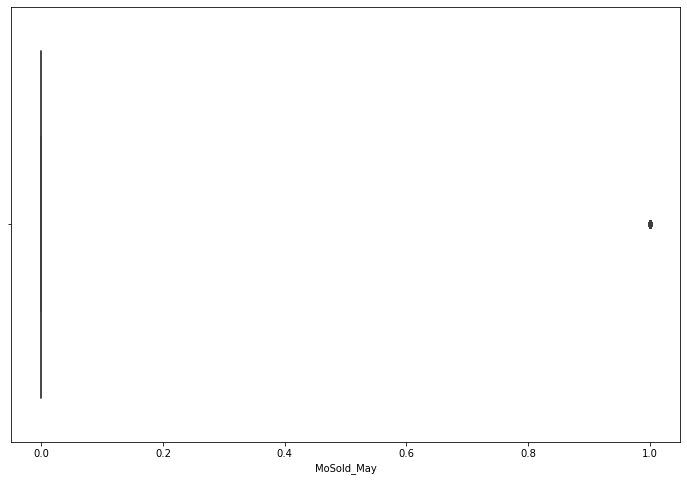

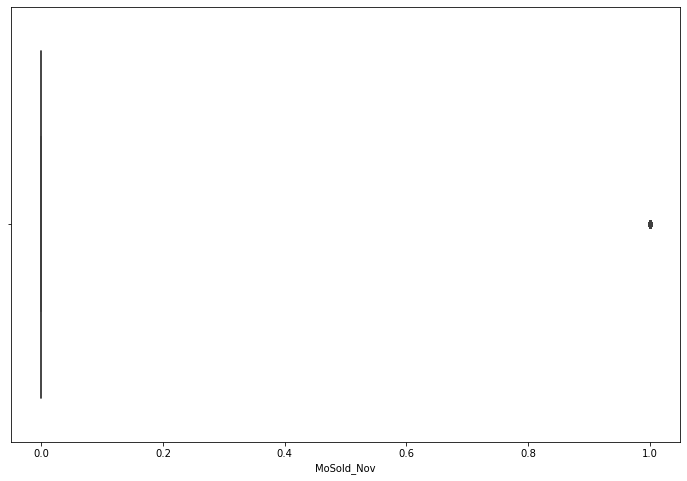

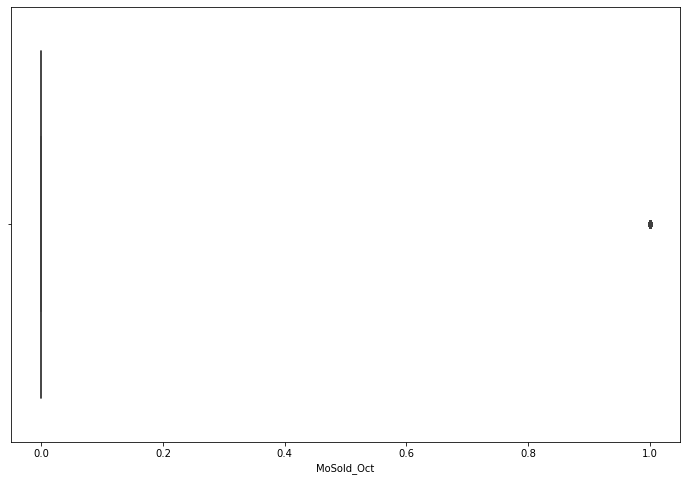

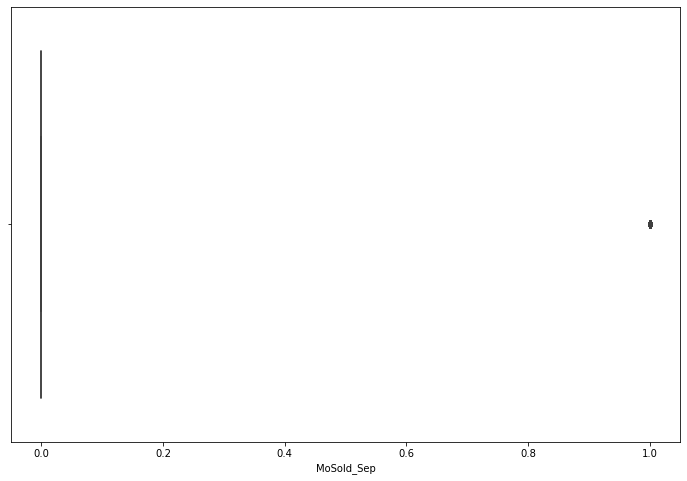

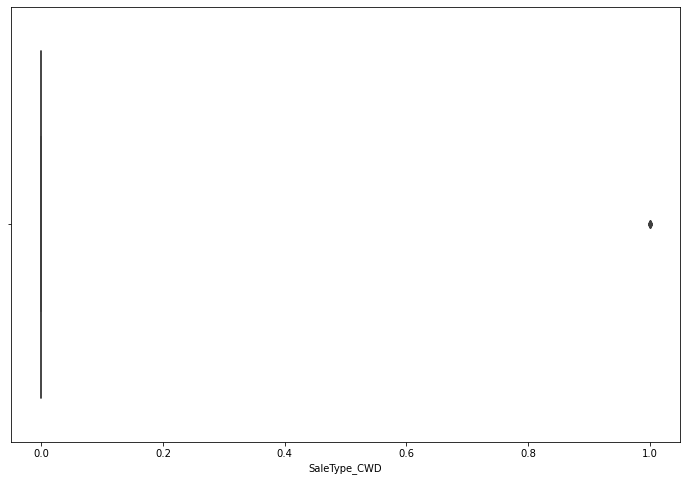

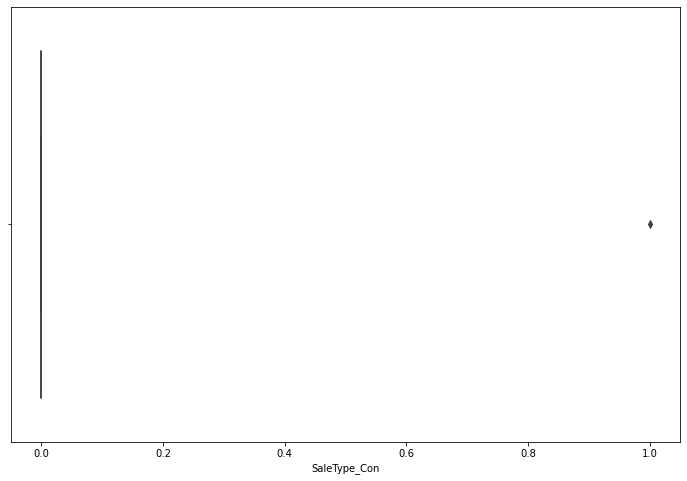

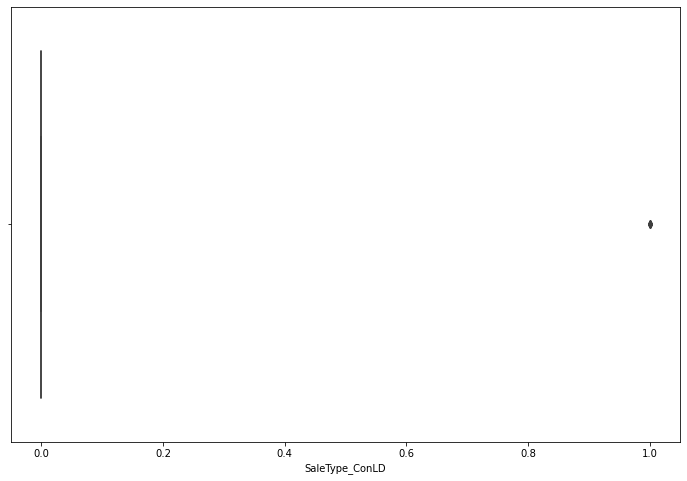

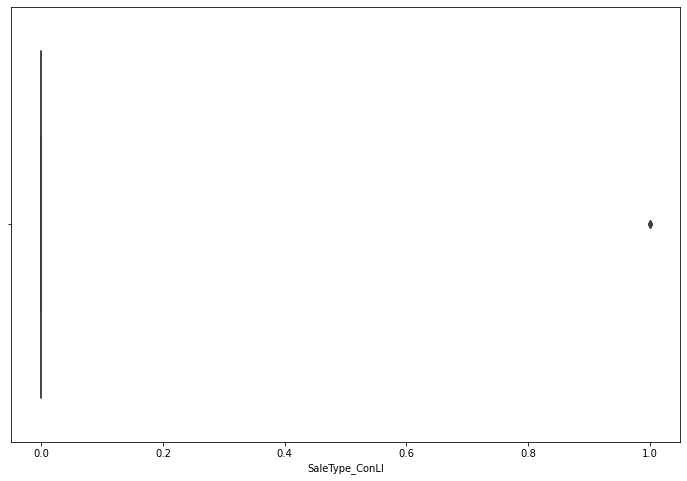

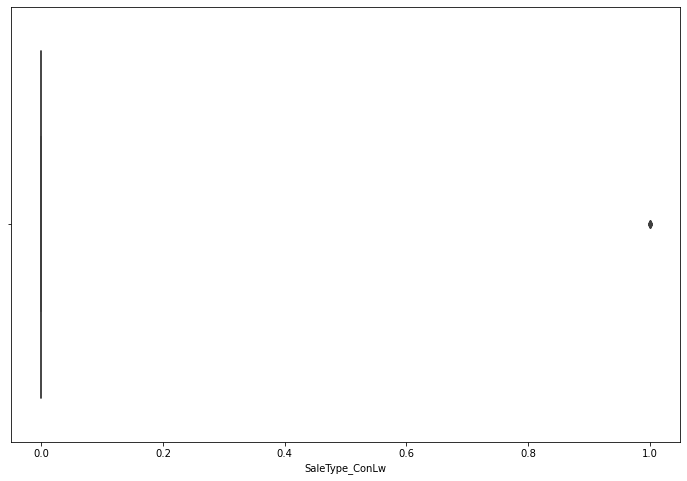

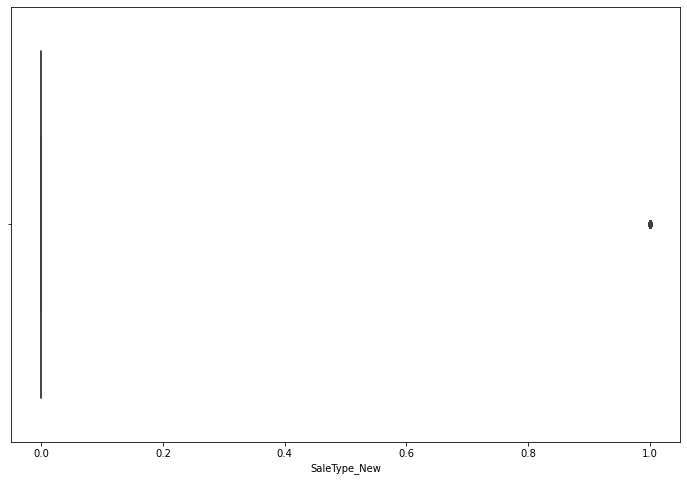

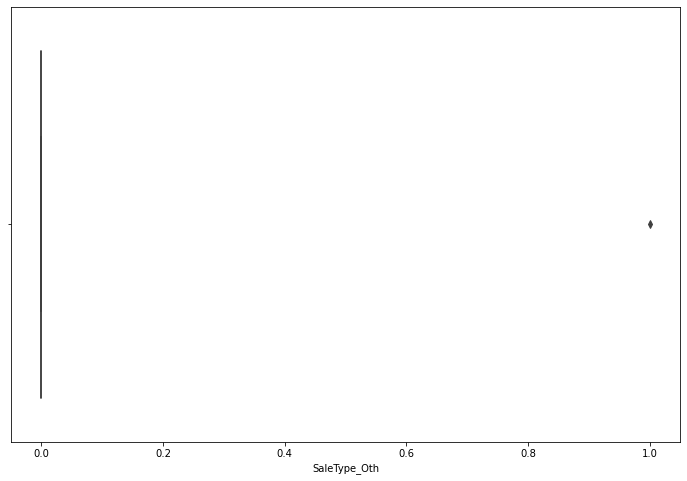

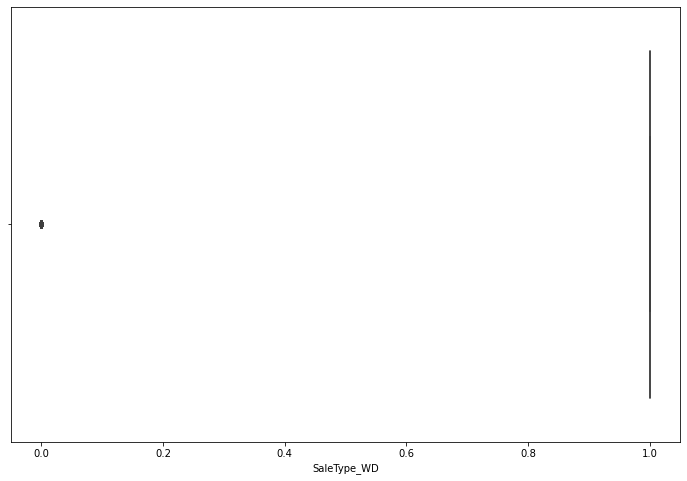

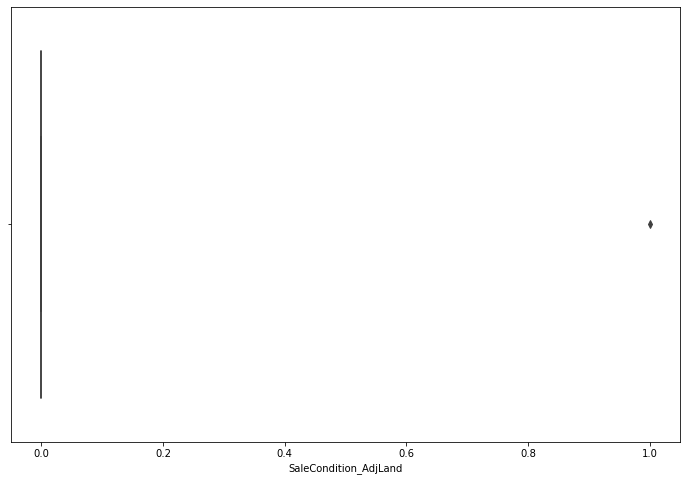

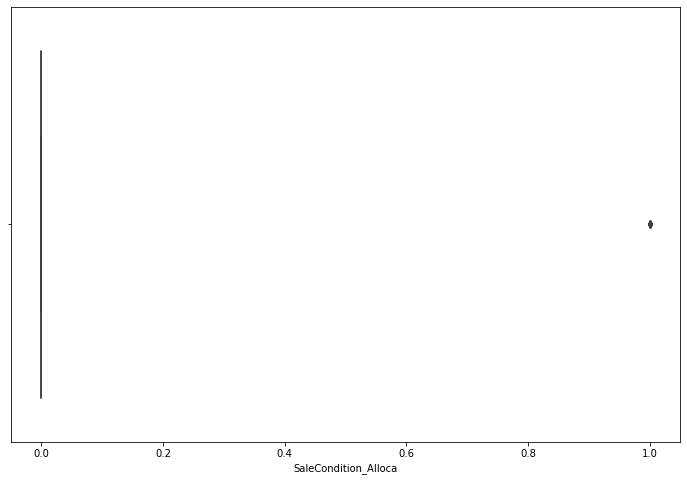

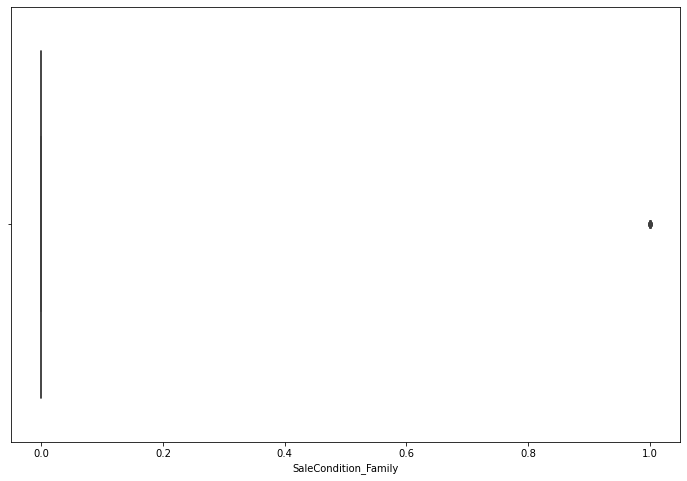

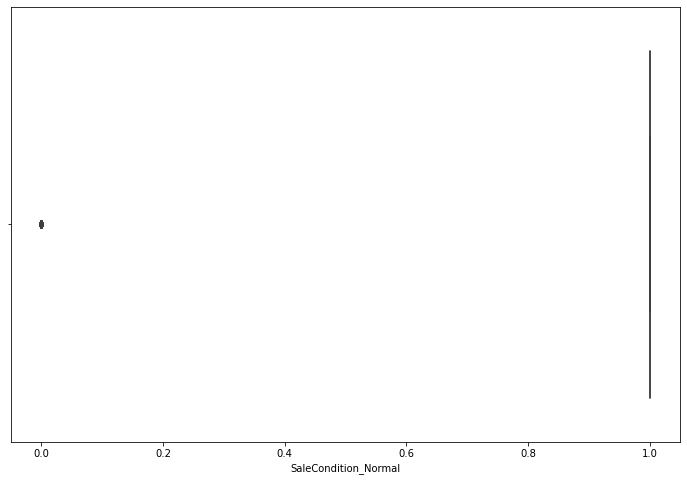

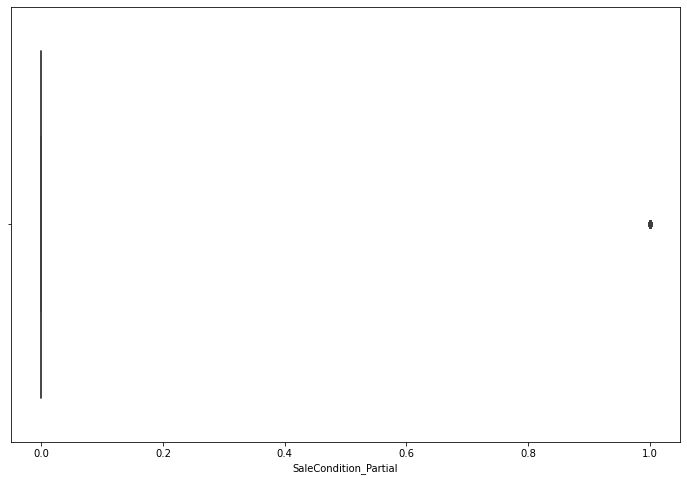

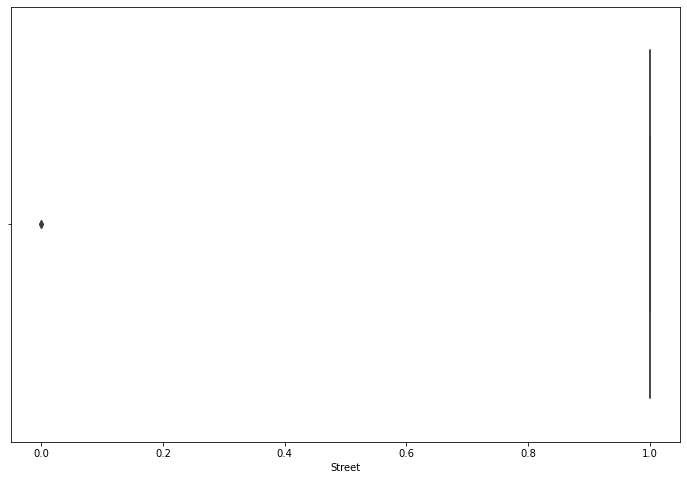

In [170]:
for col in train_full_no_outliers:
    sns.boxplot(x=train_full_no_outliers[col])
    plt.show()

In [182]:
# We can try log transformation for variables with heavily right skewed distributions

cols_log_trans = ['MasVnrArea', 'OpenPorchSF']

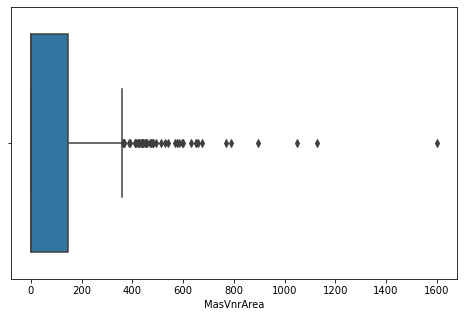

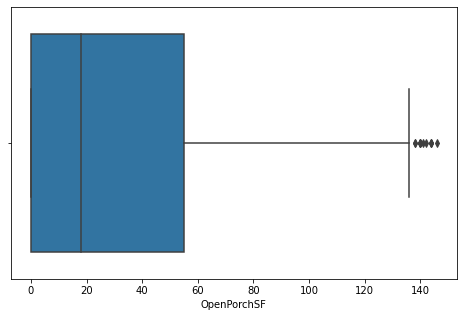

In [183]:
plt.rcParams['figure.figsize'] = [8, 5]
for col in train_full_no_outliers[cols_log_trans]:
    sns.boxplot(x=train_full_no_outliers[col])
    plt.show()

As all these variables are positive RVs containing a 0 value, we can increase them by 0.5 and then log transform them.

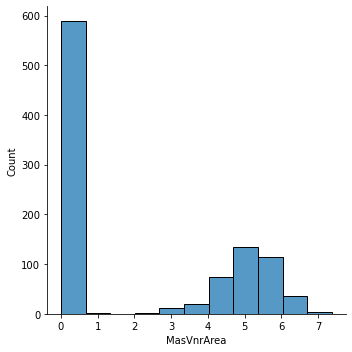

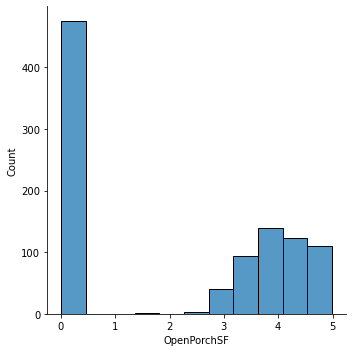

In [185]:
train_full_log_trans = train_full_no_outliers.copy()

for col in cols_log_trans:
    train_full_log_trans[col] = np.log(np.array(train_full_no_outliers[col]) + 1)
    sns.displot(x=train_full_log_trans[col])
    plt.show()

Both the variables' distributions have been transformed now.

In [224]:
# linear model with original data

kf = KFold(n_splits=100)

train_scores_no_log = []
train_scores_log = []
test_scores_no_log = []
test_scores_log = []

for train_index, test_index in kf.split(train_full_no_outliers):
    X_train, X_test = train_full_no_outliers.iloc[train_index], train_full_no_outliers.iloc[test_index]
    X_train_log, X_test_log = train_full_log_trans.iloc[train_index], train_full_log_trans.iloc[test_index]
    
    y_train, y_test = y_no_outliers.iloc[train_index], y_no_outliers.iloc[test_index]
    
    # fit Linear model using the non-log train data
    lr_outliers = LinearRegression()
    lr_outliers.fit(X_train, y_train)
    
    # fit Linear model using the log transformed train data
    lr_log = LinearRegression()
    lr_log.fit(X_train_log, y_train)
    
    # calc train and test preds and rmse
    y_train_preds = lr_outliers.predict(X_train)
    y_train_mse = mean_squared_error(y_train, y_train_preds)

    y_test_preds = lr_outliers.predict(X_test)
    y_test_mse = mean_squared_error(y_test, y_test_preds)
    
    y_test_preds_log = lr_log.predict(X_test_log)
    y_test_mse_log = mean_squared_error(y_test, y_test_preds_log)
        
    train_scores.append(np.sqrt(y_train_mse))
    test_scores_no_log.append(np.sqrt(y_test_mse))
    test_scores_log.append(np.sqrt(y_test_mse_log)) 

In [225]:
print('Mean RMSE for test data without log transformation: ', np.mean(test_scores_no_log))
print('Standard deviation for test data without log transformation: ', np.std(test_scores_no_log, ddof=1))

print('Mean RMSE for test data with log transformation: ', np.mean(test_scores_log))
print('Standard deviation for test data with log transformation: ', np.std(test_scores_log, ddof=1))

Mean RMSE for test data without log transformation:  18927.278731206712
Standard deviation for test data without log transformation:  7409.197332496044
Mean RMSE for test data with log transformation:  19086.48679406348
Standard deviation for test data with log transformation:  7594.456628164458


We see that the log transformed data has a slightly higher mean error and variance error. 

We will be using the non transformed data for our final model.

## Base Model - Full model, No transformations

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from scipy.stats import jarque_bera

In [227]:
X_train, X_test, y_train, y_test = train_test_split(train_full_no_outliers, y_no_outliers, random_state=42, test_size=0.3)

print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (689, 229)
X_test : (296, 229)
y_train : (689,)
y_test : (296,)


In [229]:
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [230]:
y_hat_train = base_model.predict(X_train)

In [247]:
model_performance = pd.DataFrame(columns=['algo_name', 'adj_r2_train', 'adj_r2_test', 'Num. Features', 
                                          'rmse_train', 'rmse_test', 'variance_error', 'jb_resid'])

def calc_var_bias_errors(model, X, y):
    kf = KFold(n_splits=5)
    
    scores = cross_val_score(estimator=model, X=X, y=y, cv=kf, scoring='neg_root_mean_squared_error')
    
    bias_error = np.mean(abs(scores))
    variance_error = np.std(abs(scores), ddof=1)
    
    return bias_error, variance_error
    
def calc_r2(model, X, y):
    y_hat = model.predict(X)
    y_bar = y.mean()

    SSR = ((y_hat - y_bar)**2).sum()
    SST = ((y - y_bar)**2).sum()
    r2 = SSR/SST 
    
    return r2

def calc_adj_r2(r2, n, k):
    adj_r2 = 1 - ((1-r2)*(n-1)/(n-k-1))
    
    return adj_r2

def add_model_row(algo_name, adj_r2_train, adj_r2_test, k, rmse_train, rmse_test, variance_error, jb_resid):
    global model_performance
    
    model_scores = pd.Series(data=[algo_name, adj_r2_train, adj_r2_test, k, rmse_train, 
                                   rmse_test, variance_error, jb_resid], 
                             index=['algo_name', 'adj_r2_train', 'adj_r2_test', 
                                    'Num. Features', 'rmse_train', 'rmse_test', 'variance_error', 'jb_resid'])
    
    model_performance = model_performance.append(model_scores, ignore_index=True)

def append_model_performance(algo_name, model, X_train, X_test, y_train, y_test):
    r2_train = calc_r2(model, X_train, y_train)
    r2_test = calc_r2(model, X_test, y_test)
    
    n1 = X_train.shape[0]
    n2 = X_test.shape[0]
    k = X_test.shape[1]
    
    adj_r2_train = calc_adj_r2(r2_train, n1, k)
    adj_r2_test = calc_adj_r2(r2_test, n2, k)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    rmse_test = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    
    bias_error, variance_error = calc_var_bias_errors(model, X_train, y_train)
    
    resid = model.predict(X_test) - y_test
    
    t_stat, jb_resid_p_val = jarque_bera(resid)
    
    add_model_row(algo_name, adj_r2_train, adj_r2_test, k, rmse_train, rmse_test, variance_error, jb_resid_p_val)

In [248]:
append_model_performance('Base Model - All Features', base_model, X_train, 
                         X_test, y_train, y_test)
model_performance

,algo_name,adj_r2_train,adj_r2_test,Num. Features,rmse_train,rmse_test,variance_error,jb_resid
0,Base Model - All Features,0.909427,0.536717,229,13958.509212,21187.999215,2796.1422,0.0


From the RMSE train and test, we see that the model is slightly overfitting the fitting. 
we need to reduce the bias in the model - maybe by regularization

## Removing variables with high VIF manually

In [255]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = []
v_max = 100

while(True):
    if v_max <= 5:
        break

In [252]:

vif = [variance_inflation_factor(X_train.values, ind) for ind in range(X_train.shape[1])]
vif

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


[2.039571854013923,
 3.1144551477852263,
 2.1708584242967324,
 2.714651252496909,
 2.7013849160678594,
 5.520755397546703,
 3.15235226540903,
 28.04343780838299,
 4.888521660000992,
 3.0225046156840394,
 4.459587674330836,
 1.8446626553966479,
 5.000239697539796,
 1.6646239452964,
 2.3392030985623036,
 3.122517159436524,
 inf,
 4.169138804768202,
 inf,
 inf,
 inf,
 2.6794714786289586,
 inf,
 inf,
 inf,
 inf,
 2.9274994736990436,
 1.6430840852053499,
 5.328531692299999,
 4.488653364641295,
 4.243853773049327,
 10.477516036907012,
 3.787247879124356,
 6.511626101102589,
 2.248401416074003,
 8.011859759387129,
 8.261100583096729,
 9.225344717609481,
 5.6189227852979755,
 6.394888185207739,
 3.4894797805949347,
 3.2943568308240825,
 2.141710748464956,
 1.6630063610622492,
 2.047095867030358,
 2.042998900776413,
 1.35559654362214,
 1.696110709281235,
 inf,
 inf,
 46.48393626667194,
 1.4870718622731522,
 4.028320256793806,
 1.955359335236726,
 29.4941687886522,
 155.47073715388635,
 34.25587

## Regularized Regression - Lasso

In [270]:
X_train, X_test, y_train, y_test = train_test_split(train_full_no_outliers, y_no_outliers, random_state=42, test_size=0.3)

print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (689, 229)
X_test : (296, 229)
y_train : (689,)
y_test : (296,)


In [272]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

lr_lasso = Lasso()
lr_lasso.fit(X_train, y_train)

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62226679256.82921, tolerance: 222164513.9996209
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [273]:
append_model_performance('Lasso Model - default', lr_lasso, X_train, 
                         X_test, y_train, y_test)
model_performance

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43048675946.07274, tolerance: 178306387.1396483
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51835900237.3653, tolerance: 177724196.91048858
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50876002093.84182, tolerance: 180891081.81322217
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/sit

,algo_name,adj_r2_train,adj_r2_test,Num. Features,rmse_train,rmse_test,variance_error,jb_resid
0,Base Model - All Features,0.909427,0.536717,229,13958.509212,21187.999215,2796.14220,0.0
1,Lasso Model - default,0.907833,0.542381,229,13975.477754,21001.147411,2280.97365,0.0


We see that the Lasso Model has decreased the variance error considerably. Additionally, the gap between train and test adjusted R2 has decreased.

## Regularized Regression - Ridge

In [276]:
lr_ridge = Ridge()

lr_ridge.fit(X_train, y_train)

Ridge()

In [279]:
append_model_performance('Ridge Model - default', lr_ridge, X_train, 
                         X_test, y_train, y_test)
model_performance

,algo_name,adj_r2_train,adj_r2_test,Num. Features,rmse_train,rmse_test,variance_error,jb_resid
0,Base Model - All Features,0.909427,0.536717,229,13958.509212,21187.999215,2796.142200,0.0
1,Lasso Model - default,0.907833,0.542381,229,13975.477754,21001.147411,2280.973650,0.0
2,Ridge Model - default,0.896687,0.536364,229,14217.241112,20527.942449,1568.342682,0.0


The Ridge regularized model has considerably decreased the variance error in the test data.

## Regularized Regression - Elastinet

In [280]:
lr_elastinet = ElasticNet()

lr_elastinet.fit(X_train, y_train)

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140687003300.13763, tolerance: 222164513.9996209
  model = cd_fast.enet_coordinate_descent(


ElasticNet()

In [281]:
append_model_performance('Elastinet Model - default', lr_elastinet, X_train, 
                         X_test, y_train, y_test)
model_performance

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106284650181.22125, tolerance: 178306387.1396483
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116094954325.6873, tolerance: 177724196.91048858
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111432377371.5469, tolerance: 180891081.81322217
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/s

,algo_name,adj_r2_train,adj_r2_test,Num. Features,rmse_train,rmse_test,variance_error,jb_resid
0,Base Model - All Features,0.909427,0.536717,229,13958.509212,21187.999215,2796.142200,0.0
1,Lasso Model - default,0.907833,0.542381,229,13975.477754,21001.147411,2280.973650,0.0
2,Ridge Model - default,0.896687,0.536364,229,14217.241112,20527.942449,1568.342682,0.0
3,Elastinet Model - default,0.768626,0.167140,229,18809.978287,22125.881593,1649.775728,0.0


The elastinet model has significantly decreased the R2 values for both train and test models.

## Regularized Regression - Lasso, with Grid Search

In [314]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0, 0.01, 0.02, 0.05, 0.08, 0.1, 0.2, 0.5, 0.8, 1, 2, 3, 4, 5, 8, 10, 12, 15, 20, 25, 30, 50, 75, 100, 125, 150, 175, 200, 250, 300, 400, 500]}
GS_lr_lasso = GridSearchCV(estimator=Lasso(),
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=5)

GS_lr_lasso.fit(X_train, y_train)

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44716873855.469986, tolerance: 178306387.1396483
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: UserWarning: With alpha=0, this algorithm d

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44764994184.95176, tolerance: 178306387.1396483
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51455408691.843605, tolerance: 177724196.91048858
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50030622736.28533, tolerance: 180891081.81322217
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/s

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50876002093.84182, tolerance: 180891081.81322217
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41044135247.26263, tolerance: 180174299.564204
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48847549393.578354, tolerance: 171417256.64645803
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/si

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0, 0.01, 0.02, 0.05, 0.08, 0.1, 0.2, 0.5,
                                   0.8, 1, 2, 3, 4, 5, 8, 10, 12, 15, 20, 25,
                                   30, 50, 75, 100, 125, 150, 175, 200, 250,
                                   300, ...]},
             scoring='neg_root_mean_squared_error')

In [315]:
GS_lr_lasso.best_params_

{'alpha': 150}

In [316]:
GS_lr_lasso_cv_results = pd.DataFrame(GS_lr_lasso.cv_results_)

In [317]:
# plotting the grid search results

GS_results = GS_lr_lasso_cv_results[['mean_test_score', 'std_test_score']]

upper_bound = GS_results['mean_test_score'] + GS_results['std_test_score']
lower_bound = GS_results['mean_test_score'] - GS_results['std_test_score']

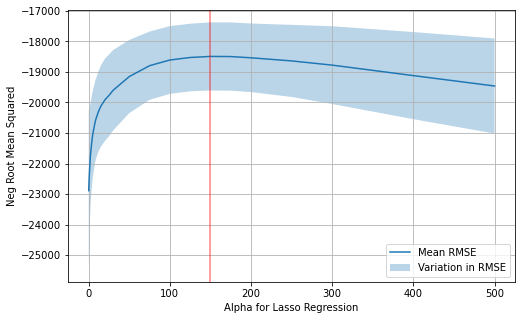

In [322]:
plt.plot(param_grid['alpha'], GS_results['mean_test_score'])
plt.fill_between(param_grid['alpha'], y1=upper_bound, y2=lower_bound, alpha=0.3)
plt.xlabel('Alpha for Lasso Regression')
plt.ylabel('Neg Root Mean Squared')
plt.legend(['Mean RMSE', 'Variation in RMSE'], loc='lower right')
plt.axvline(x=150, c='r', alpha=0.5)
plt.grid(True)
plt.show()

We find that the best parameter for Lasso Regularization seems to be alpha = 150
Mean scores increase till about 150 and then steadily decrease beyond that value. 

In [323]:
lr_lasso_best_alpha = Lasso(alpha=150)

lr_lasso_best_alpha.fit(X_train, y_train)

Lasso(alpha=150)

In [324]:
append_model_performance('Lasso Model - alpha=150', lr_lasso_best_alpha, X_train, 
                         X_test, y_train, y_test)
model_performance

,algo_name,adj_r2_train,adj_r2_test,Num. Features,rmse_train,rmse_test,variance_error,jb_resid
0,Base Model - All Features,0.909427,0.536717,229,13958.509212,21187.999215,2796.142200,0.0
1,Lasso Model - default,0.907833,0.542381,229,13975.477754,21001.147411,2280.973650,0.0
2,Ridge Model - default,0.896687,0.536364,229,14217.241112,20527.942449,1568.342682,0.0
3,Elastinet Model - default,0.768626,0.167140,229,18809.978287,22125.881593,1649.775728,0.0
4,Lasso Model - alpha=150,0.853814,0.433172,229,15926.380528,20090.208449,1248.496940,0.0


We see that the lasso with the best fit parameter is considerably improving the problem of model overfitting.

## Regularized Regression - Ridge, with Grid Search

In [336]:
param_grid = {'alpha': [0.5, 1, 2, 5, 10, 15, 18, 20, 22, 25, 30, 50, 75]}
GS_lr_ridge = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error')

GS_lr_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.5, 1, 2, 5, 10, 15, 18, 20, 22, 25, 30, 50,
                                   75]},
             scoring='neg_root_mean_squared_error')

In [337]:
GS_lr_ridge.best_params_

{'alpha': 25}

In [338]:
GS_lr_ridge_cv_results = pd.DataFrame(GS_lr_ridge.cv_results_)

In [339]:
# plotting the grid search results

GS_results = GS_lr_ridge_cv_results[['mean_test_score', 'std_test_score']]

upper_bound = GS_results['mean_test_score'] + GS_results['std_test_score']
lower_bound = GS_results['mean_test_score'] - GS_results['std_test_score']

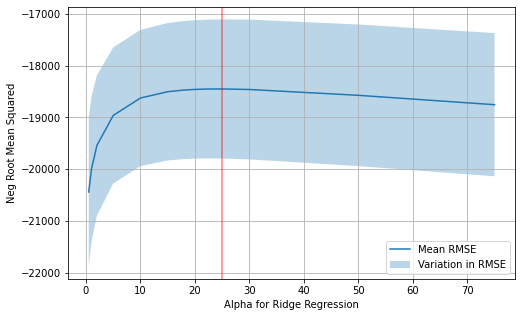

In [342]:
plt.plot(param_grid['alpha'], GS_results['mean_test_score'])
plt.fill_between(param_grid['alpha'], y1=upper_bound, y2=lower_bound, alpha=0.3)

plt.xlabel('Alpha for Ridge Regression')
plt.ylabel('Neg Root Mean Squared')
plt.legend(['Mean RMSE', 'Variation in RMSE'], loc='lower right')
plt.axvline(x=25, c='r', alpha=0.5)
plt.grid(True)

plt.show()

Similar to Lasso regularization, the mean (negative) RMSE increases sharply until alpha=25 and then steadily falls. 

In [344]:
lr_ridge_best_alpha = Ridge(alpha=25)

lr_ridge_best_alpha.fit(X_train, y_train)

Ridge(alpha=25)

In [345]:
append_model_performance('Ridge Model - alpha=25', lr_ridge_best_alpha, X_train, 
                         X_test, y_train, y_test)
model_performance

,algo_name,adj_r2_train,adj_r2_test,Num. Features,rmse_train,rmse_test,variance_error,jb_resid
0,Base Model - All Features,0.909427,0.536717,229,13958.509212,21187.999215,2796.142200,0.0
1,Lasso Model - default,0.907833,0.542381,229,13975.477754,21001.147411,2280.973650,0.0
2,Ridge Model - default,0.896687,0.536364,229,14217.241112,20527.942449,1568.342682,0.0
3,Elastinet Model - default,0.768626,0.167140,229,18809.978287,22125.881593,1649.775728,0.0
4,Lasso Model - alpha=150,0.853814,0.433172,229,15926.380528,20090.208449,1248.496940,0.0
5,Ridge Model - alpha=25,0.851899,0.420215,229,15609.629421,20173.448165,1505.000415,0.0


## Linear Regression with Feature Engineered Variables